## Projet 4 : Anticipez les besoins en consommation électrique de bâtiments  

## Analyse exploratoire

###  Import des librairies

In [258]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

###  Lecture et affichage du tableau de données pour l'année 2015

In [259]:
data_2015 = pd.read_csv('C:/Users/Brahim/Desktop/Mes projets/Projet P4/2015-building-energy-benchmarking.csv', sep=",")
data_2015

OSEBuildingID  DataYear          BuildingType    PrimaryPropertyType  \
0                 1      2015        NonResidential                  Hotel   
1                 2      2015        NonResidential                  Hotel   
2                 3      2015        NonResidential                  Hotel   
3                 5      2015        NonResidential                  Hotel   
4                 8      2015        NonResidential                  Hotel   
...             ...       ...                   ...                    ...   
3335          50049      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
3336          50055      2015  Multifamily MR (5-9)   Mid-Rise Multifamily   
3337          50057      2015  Multifamily HR (10+)  High-Rise Multifamily   
3338          50058      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
3339          50059      2015  Multifamily LR (1-4)   Low-Rise Multifamily   

                    PropertyName TaxParcelIdentificationNumber  \
0           MAYFLOWER PARK HOTEL                     659000030   
1                PARAMOUNT HOTEL                     659000220   
2                   WESTIN HOTEL                     659000475   
3                      HOTEL MAX                     659000640   
4          WARWICK SEATTLE HOTEL                     659000970   
...                          ...                           ...   
3335  PACIFIC CENTER CONDOMINIUM                    6599950000   
3336          IDENTITY APTS 4123                    1142001670   
3337                      CIRRUS                     660000575   
3338    WEDGEWOOD ESTATES BLDG A                    6392001040   
3339    WEDGEWOOD ESTATES BLDG B                    6392001040   

                                               Location  CouncilDistrictCode  \
0     {'latitude': '47.61219025', 'longitude': '-122...                    7   
1     {'latitude': '47.61310583', 'longitude': '-122...                    7   
2     {'latitude': '47.61334897', 'longitude': '-122...                    7   
3     {'latitude': '47.61421585', 'longitude': '-122...                    7   
4     {'latitude': '47.6137544', 'longitude': '-122....                    7   
...                                                 ...                  ...   
3335  {'latitude': '47.59950256', 'longitude': '-122...                    2   
3336  {'latitude': '47.65752471', 'longitude': '-122...                    4   
3337  {'latitude': '47.61649845', 'longitude': '-122...                    7   
3338  {'latitude': '47.68396954', 'longitude': '-122...                    4   
3339  {'latitude': '47.68396954', 'longitude': '-122...                    4   

     Neighborhood  YearBuilt  ...  GHGEmissionsIntensity(kgCO2e/ft2)  \
0        DOWNTOWN       1927  ...                               2.64   
1        DOWNTOWN       1996  ...                               2.38   
2        DOWNTOWN       1969  ...                               1.92   
3        DOWNTOWN       1926  ...                              31.38   
4        DOWNTOWN       1980  ...                               4.02   
...           ...        ...  ...                                ...   
3335     DOWNTOWN       2000  ...                               0.07   
3336    NORTHEAST       2014  ...                               0.61   
3337     DOWNTOWN       2015  ...                               1.89   
3338    NORTHEAST       1981  ...                               0.04   
3339    NORTHEAST       1981  ...                               0.05   

      DefaultData  Comment  ComplianceStatus       Outlier 2010 Census Tracts  \
0              No      NaN         Compliant           NaN                NaN   
1              No      NaN         Compliant           NaN                NaN   
2             Yes      NaN         Compliant           NaN                NaN   
3              No      NaN         Compliant  High Outlier                NaN   
4              No      NaN         Compliant 

In [260]:
data_2015["ENERGYSTARScore"]

0       65.0
1       51.0
2       18.0
3        1.0
4       67.0
        ... 
3335    71.0
3336    98.0
3337    79.0
3338    44.0
3339    24.0
Name: ENERGYSTARScore, Length: 3340, dtype: float64

### Lecture et affichage du tableau de données pour l'année 2016

In [261]:
data_2016 = pd.read_csv('C:/Users/Brahim/Desktop/Mes projets/Projet P4/2016-building-energy-benchmarking.csv', sep=",")
data_2016

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  ...  Electricity(kWh)  \
0     98101.0                    0659000030  ...      1.156514e+06   
1     98101.0                    0659000220  ...      9.504252e+05   
2     98101.0                    0659000475  ...      1.451544e+07   
3     98101.0                    0659000640  ...      8.115253e+05   
4     98121.0                    0659000970  ...      1.573449e+06   
...       ...                           ...  ...               ...   
3371      NaN                    1624049080  ...      1.536550e+05   
3372      NaN                    3558300000  ...      1.162210e+05   
3373      NaN                    1794501150  ...      5.252517e+05   
3374      NaN                    7883603155  ...      1.022480e+05   
3375      NaN                    7857002030  ...      1.267744e+05   

     Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0         3.946027e+06        12764.529300      1.276453e+06        False   
1         3.242851e+06        51450.816410      5.145082e+06        False   
2         4.952666e+07        14938.000000      1.493800e+06        False   
3         2.768924e+06        18112.130860      1.811213e+06        False   
4         5.368607e+06        88039.984380      8.803998e+06        False   
...                ...                 ...               ...          ...   
3371      5.242709e+05         3254.750244      3.254750e+05         True   
3372      3.965461e+05         5537.299805      5.537300e+05        False   
3373      1.792159e+06        39737.390630      3.973739e+06        False   
3374      3.488702e+05         3706.010010      3.706010e+05        False   
3375      4.325542e+05         7203.419922      7.203420e+05        False   

      Comments              ComplianceStatus  Outlier  TotalGHGEmissions  \
0          NaN                     Compliant      NaN             249.98   
1          NaN                     Compliant      NaN             295.86   
2          NaN                     Compliant      NaN            2089.28   
3          NaN                     Compliant      NaN             286.43   
4          NaN                     Compliant  

### Recherche des doublons sur l'identifiant des bâtiment ( OSEBuildingID )

In [262]:
data_2015["OSEBuildingID"].duplicated().sum()

0

In [263]:
data_2016["OSEBuildingID"].duplicated().sum()

0

#### Il n'y a pas de doublons des identifiants, nous n'avons que des bâtiments différents.
#### 3340 bâtiments sur le dataset de 2015 et 3376 sur celui de 2016

In [264]:
data_2015["OSEBuildingID"]

0           1
1           2
2           3
3           5
4           8
        ...  
3335    50049
3336    50055
3337    50057
3338    50058
3339    50059
Name: OSEBuildingID, Length: 3340, dtype: int64

In [265]:
data_2016["OSEBuildingID"]

0           1
1           2
2           3
3           5
4           8
        ...  
3371    50222
3372    50223
3373    50224
3374    50225
3375    50226
Name: OSEBuildingID, Length: 3376, dtype: int64

### On vérifie si c'est les mêmes batiments sur les 2 années

In [266]:
# 56 bâtiments qui existent dans dans le relevé 2015 mais pas dans le relevé 2016
len([elt for elt in data_2015["OSEBuildingID"].values if elt not in data_2016["OSEBuildingID"].values])

56

In [267]:
# Liste des bâtiments du relevé de 2015 non relevé en 2016
ident_specifque_a_2015 = [elt for elt in data_2015["OSEBuildingID"].values if elt not in data_2016["OSEBuildingID"].values]
ident_specifque_a_2015

[61,
 266,
 325,
 400,
 442,
 499,
 559,
 560,
 675,
 714,
 790,
 838,
 19656,
 19658,
 19780,
 19882,
 19905,
 19947,
 20152,
 20658,
 21237,
 21471,
 21555,
 21688,
 21796,
 22138,
 22172,
 22441,
 22446,
 22808,
 23163,
 23308,
 23848,
 24068,
 24168,
 24194,
 24408,
 24739,
 24904,
 25042,
 25455,
 25617,
 25654,
 25701,
 25821,
 26938,
 27355,
 27639,
 27699,
 27706,
 27829,
 27985,
 28045,
 28064,
 49769,
 49859]

In [268]:
# 92 batiments qui existent dans dans le relevé 2016 mais pas dans le relevé 2015
len([elt for elt in data_2016["OSEBuildingID"].values if elt not in data_2015["OSEBuildingID"].values])

92

In [269]:
# Liste des bâtiments du relevé de 2016 non relevé en 2015
ident_specifque_a_2016 = [elt for elt in data_2016["OSEBuildingID"].values if elt not in data_2015["OSEBuildingID"].values]
ident_specifque_a_2016

[43,
 364,
 365,
 750,
 19456,
 20585,
 20978,
 21103,
 21860,
 23437,
 23964,
 24418,
 29390,
 49715,
 49716,
 49964,
 49967,
 49968,
 49970,
 49972,
 49979,
 49980,
 49983,
 49986,
 49987,
 49988,
 49990,
 50000,
 50003,
 50005,
 50006,
 50011,
 50014,
 50015,
 50017,
 50021,
 50022,
 50026,
 50029,
 50030,
 50031,
 50035,
 50037,
 50039,
 50044,
 50045,
 50046,
 50047,
 50050,
 50054,
 50056,
 50083,
 50061,
 50062,
 50068,
 50069,
 50070,
 50071,
 50072,
 50074,
 50075,
 50076,
 50078,
 50081,
 50082,
 50084,
 50086,
 50088,
 50089,
 50090,
 50092,
 50093,
 50094,
 50095,
 50098,
 50101,
 50196,
 50198,
 50201,
 50204,
 50207,
 50208,
 50210,
 50212,
 50219,
 50220,
 50221,
 50222,
 50223,
 50224,
 50225,
 50226]

### Différences entre les 2 datasets au niveau des colonnes

#### On va renommer les colonnes qui correspondent à la même variable écrite différemment dans les 2 datasets

In [270]:
# Colonnes du dataset de  2015 qui ne sont pas en 2016
[col for col in data_2015 if col not in data_2016]

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [271]:
# Colonnes du dataset de  2016 qui ne sont pas en 2015
[col for col in data_2016 if col not in data_2015]

['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [272]:
#Colonnes communes
[col for col in data_2016 if col in data_2015]

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'Outlier']

In [273]:
data_2015['GHGEmissions(MetricTonsCO2e)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [274]:
data_2016["TotalGHGEmissions"].describe()

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [275]:
# Les ordres de grandeur des 2 variables; GHGEmissions(MetricTonsCO2e) et TotalGHGEmissions sont similaires.
# On renomme la colonne de 2015 pour que le nom de la variable soit le même que pour 2016 pour les émissions de CO2
data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions'},
                 inplace=True)

In [276]:
data_2015["GHGEmissionsIntensity(kgCO2e/ft2)"].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [277]:
data_2016["GHGEmissionsIntensity"].describe()

count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

In [278]:
# Les ordres de grandeur des 2 variables; GHGEmissionsIntensity(kgCO2e/ft2) et GHGEmissionsIntensity sont similaires.
# On renomme la colonne de 2015 pour que le nom de la variable soit le même que pour 2016 pour les émissions l'énergie
data_2015.rename(columns={'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity'},
                 inplace=True)

In [279]:
data_2015["Comment"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3335    NaN
3336    NaN
3337    NaN
3338    NaN
3339    NaN
Name: Comment, Length: 3340, dtype: object

In [280]:
data_2016["Comments"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3371   NaN
3372   NaN
3373   NaN
3374   NaN
3375   NaN
Name: Comments, Length: 3376, dtype: float64

In [281]:
# On renomme la colonne  'Comment' du dataset data_2015  par 'Comments' comme dans le dataset data_2016.
data_2015.rename(columns={'Comment': 'Comments'}, inplace=True)

### Les variables ; Longitude, Latitude, adress et  zip sont regroupées dans la variable Location dans le relevé 2015.
#### Nous allons donc les extraire pour les avoir comme noms de colonnes comme dans le dataset 2016

In [282]:
data_2015["Location"]

0       {'latitude': '47.61219025', 'longitude': '-122...
1       {'latitude': '47.61310583', 'longitude': '-122...
2       {'latitude': '47.61334897', 'longitude': '-122...
3       {'latitude': '47.61421585', 'longitude': '-122...
4       {'latitude': '47.6137544', 'longitude': '-122....
                              ...                        
3335    {'latitude': '47.59950256', 'longitude': '-122...
3336    {'latitude': '47.65752471', 'longitude': '-122...
3337    {'latitude': '47.61649845', 'longitude': '-122...
3338    {'latitude': '47.68396954', 'longitude': '-122...
3339    {'latitude': '47.68396954', 'longitude': '-122...
Name: Location, Length: 3340, dtype: object

### Création de la colonne Latitude dans le dataset de 2015

In [283]:
# 1ère ligne de la colonne ; Location.
data_2015["Location"][0]
# Une fois qu'on aura extrait la valeur de la latitude, on répétera la même opération pour toute les lignes

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [284]:
data_2015["Location"][0].split(":") #liste des éléments séparés entre eux par le signe :
#la valeur de la latitude correspond aux deuxieme terme qu'il faut transformer en variable float

["{'latitude'",
 " '47.61219025', 'longitude'",
 " '-122.33799744', 'human_address'",
 ' \'{"address"',
 ' "405 OLIVE WAY", "city"',
 ' "SEATTLE", "state"',
 ' "WA", "zip"',
 ' "98101"}\'}']

In [285]:
data_2015["Location"][0].split(":")[1]
#la valeur de la longitude data_2015["Location"][0].split(":")[1]correspond au deuxième des termes séparés par le (')

" '47.61219025', 'longitude'"

In [286]:
data_2015["Location"][0].split(":")[1].split("'")[1]

'47.61219025'

In [287]:
float(data_2015["Location"][0].split(":")[1].split("'")[1])

47.61219025

In [288]:
# Réalisation de la même opération que précedemment sur toute les lignes de la colonne Location:
Latitude = []
for i in range(len(data_2015["Location"])):
    Latitude.append(float(data_2015["Location"][i].split(":")[1].split("'")[1]))
Latitude   

[47.61219025,
 47.61310583,
 47.61334897,
 47.61421585,
 47.6137544,
 47.6164389,
 47.6141141,
 47.61290234,
 47.60258934,
 47.60278416,
 47.60712147,
 47.60718204,
 47.60709939,
 47.60809326,
 47.60761642,
 47.60667501,
 47.60544586,
 47.60656003,
 47.60552597,
 47.60397899,
 47.60264587,
 47.60355377,
 47.54570136,
 47.65953281,
 47.61839333,
 47.61490582,
 47.61300278,
 47.61806905,
 47.62309371,
 47.61587049,
 47.71011498,
 47.63303191,
 47.66391557,
 47.66585193,
 47.66270326,
 47.5106034,
 47.65726207,
 47.68245037,
 47.66580963,
 47.58002948,
 47.68894837,
 47.61311034,
 47.60950466,
 47.61103976,
 47.61076355,
 47.610466,
 47.60883331,
 47.60973588,
 47.61229324,
 47.61101988,
 47.60989093,
 47.61155254,
 47.62037281,
 47.6203118,
 47.62021696,
 47.62050588,
 47.63445532,
 47.62498256,
 47.60841187,
 47.55837362,
 47.72389349,
 47.61990903,
 47.50935392,
 47.61249662,
 47.60895788,
 47.60831445,
 47.622375,
 47.62428336,
 47.6263594,
 47.62124083,
 47.62124083,
 47.62189039,
 4

In [289]:
data_2015["Latitude"] = Latitude
data_2015["Latitude"]

0       47.612190
1       47.613106
2       47.613349
3       47.614216
4       47.613754
          ...    
3335    47.599503
3336    47.657525
3337    47.616498
3338    47.683970
3339    47.683970
Name: Latitude, Length: 3340, dtype: float64

### Création de la colonne Longitude 

#### raisonnement identique que celui suivi pour la création de la colonne Longitude

In [290]:
float(data_2015["Location"][0].split(":")[2].split("'")[1])

-122.33799744

In [291]:
Longitude = []
for i in range(len(data_2015["Location"])):
    Longitude.append(float(data_2015["Location"][i].split(":")[2].split("'")[1]))
Longitude

[-122.33799744,
 -122.33335756,
 -122.33769944,
 -122.33660889,
 -122.3409238,
 -122.33676431,
 -122.33274086,
 -122.33130949,
 -122.33255325,
 -122.33214887,
 -122.33431932,
 -122.33347215,
 -122.33310536,
 -122.33211517,
 -122.3323288,
 -122.33226425,
 -122.33280182,
 -122.33063632,
 -122.33163032,
 -122.3320576,
 -122.33052826,
 -122.32830048,
 -122.2685843,
 -122.3173925,
 -122.3369292,
 -122.33040102,
 -122.32923126,
 -122.33005445,
 -122.3053887,
 -122.34197968,
 -122.29379175,
 -122.35245717,
 -122.33172174,
 -122.29889419,
 -122.29612323,
 -122.29027588,
 -122.39065097,
 -122.2939354,
 -122.3860321,
 -122.31181286,
 -122.33616192,
 -122.35096928,
 -122.3334029,
 -122.3363484,
 -122.337677,
 -122.33795929,
 -122.3374176,
 -122.3403842,
 -122.33441925,
 -122.3335344,
 -122.3414255,
 -122.3408486,
 -122.3441465,
 -122.3428044,
 -122.3432115,
 -122.3596901,
 -122.3080163,
 -122.3445605,
 -122.3095441,
 -122.378518,
 -122.3562998,
 -122.3320457,
 -122.3782222,
 -122.3213373,
 -122.3

In [292]:
data_2015["Longitude"] = Longitude
data_2015["Longitude"]

0      -122.337997
1      -122.333358
2      -122.337699
3      -122.336609
4      -122.340924
           ...    
3335   -122.320343
3336   -122.316016
3337   -122.337708
3338   -122.287409
3339   -122.287409
Name: Longitude, Length: 3340, dtype: float64

### Création de la colonne : Address

In [293]:
data_2015["Location"][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [294]:
data_2015["Location"][0].split(":")[4]

' "405 OLIVE WAY", "city"'

In [295]:
(data_2015["Location"][0].split(":")[4].split(",")[0])

' "405 OLIVE WAY"'

In [296]:
data_2015["Location"][0].split(":")[4].split(",")[0].replace('"','')

' 405 OLIVE WAY'

In [297]:
Address = []
for i in range(len(data_2015["Location"])):
    Address.append(data_2015["Location"][i].split(":")[4].split(",")[0].replace('"',''))
Address

[' 405 OLIVE WAY',
 ' 724 PINE ST',
 ' 1900 5TH AVE',
 ' 620 STEWART ST',
 ' 401 LENORA ST',
 ' 810 VIRGINIA ST',
 ' 1619 9TH AVE',
 ' 901 PINE ST',
 ' 612 2ND AVE',
 ' 607 3RD AVE',
 ' 1101 4TH AVE',
 ' 1112 4TH AVE',
 ' 400 SPRING ST',
 ' 1113 6TH AVE',
 ' 1100 5TH AVE',
 ' 1000 4TH AVE',
 ' 909 4TH AVE',
 ' 515 MADISON ST',
 ' 810 4TH AVE',
 ' 700 3RD AVE',
 ' 516 3RD AVE',
 ' 500 5TH AVE',
 ' 5101 S GRAHAM ST',
 ' 4242 ROOSEVELT WAY NE',
 ' 1000 LENORA ST',
 ' 1017 OLIVE WAY',
 ' 1011 PIKE ST',
 ' 1800 YALE AVE',
 ' 300 20TH AVE E',
 ' 2200 5TH AVE',
 ' 11031 34TH AVE NE',
 ' 201 GARFIELD ST',
 ' 4649 SUNNYSIDE AVE N',
 ' 5036 25TH AVE NE',
 ' 2746 NE 45TH ST',
 ' 3301 S NORFOLK ST',
 ' 4017 26TH AVE W',
 ' 3003 NE 75TH ST',
 ' 5305 SHILSHOLE AVE NW',
 ' 2524 16TH AVE S',
 ' 8200 WALLINGFORD AVE N',
 ' 11 VINE ST',
 ' 1301 6TH AVE',
 ' 1513 5TH AVE',
 ' 1525 4TH AVE',
 ' 1518 3RD AVE',
 ' 1401 3RD AVE',
 ' 107 PINE ST',
 ' 1531 7TH AVE',
 ' 1400 6TH AVE',
 ' 86 PINE ST',
 ' 1926 2N

In [298]:
data_2015["Address"] = Address
data_2015["Address"]

0           405 OLIVE WAY
1             724 PINE ST
2            1900 5TH AVE
3          620 STEWART ST
4           401 LENORA ST
              ...        
3335       321 10TH AVE S
3336     4123 12TH AVE NE
3337         2030 8TH AVE
3338      3801 NE 77TH ST
3339     7540 37TH AVE NE
Name: Address, Length: 3340, dtype: object

In [299]:
data_2016["Address"]

0          405 Olive way
1        724 Pine street
2        1900 5th Avenue
3         620 STEWART ST
4          401 LENORA ST
              ...       
3371    1600 S Dakota St
3372       719 8th Ave S
3373      1920 1st Ave W
3374      8319 8th Ave S
3375    2820 S Myrtle St
Name: Address, Length: 3376, dtype: object

### Création de la colonne : ZipCode

In [300]:
data_2015["Zip Codes"]

0       18081
1       18081
2       18081
3       18081
4       19576
        ...  
3335    18379
3336    18383
3337    19576
3338    18792
3339    18792
Name: Zip Codes, Length: 3340, dtype: int64

In [301]:
data_2016["ZipCode"]

0       98101.0
1       98101.0
2       98101.0
3       98101.0
4       98121.0
         ...   
3371        NaN
3372        NaN
3373        NaN
3374        NaN
3375        NaN
Name: ZipCode, Length: 3376, dtype: float64

In [302]:
data_2015["Location"][0].split(":")

["{'latitude'",
 " '47.61219025', 'longitude'",
 " '-122.33799744', 'human_address'",
 ' \'{"address"',
 ' "405 OLIVE WAY", "city"',
 ' "SEATTLE", "state"',
 ' "WA", "zip"',
 ' "98101"}\'}']

In [303]:
data_2015["Location"][2]

'{\'latitude\': \'47.61334897\', \'longitude\': \'-122.33769944\', \'human_address\': \'{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [304]:
data_2015["Location"][2].split(":")[4]

' "1900 5TH AVE", "city"'

In [305]:
(data_2015["Location"][2].split(":")[4].split(",")[0]).replace('"','')

' 1900 5TH AVE'

In [306]:
data_2015["Location"][0].split(":")[7].split("}")[0].replace('"','')

' 98101'

In [307]:
ZipCode = []
for i in range(len(data_2015["Location"])):
    ZipCode.append(data_2015["Location"][0].split(":")[7].split("}")[0].replace('"',''))
ZipCode

[' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',

In [308]:
data_2015["ZipCode"] = ZipCode
data_2015["ZipCode"]

0        98101
1        98101
2        98101
3        98101
4        98101
         ...  
3335     98101
3336     98101
3337     98101
3338     98101
3339     98101
Name: ZipCode, Length: 3340, dtype: object

In [309]:
data_2016["ZipCode"]

0       98101.0
1       98101.0
2       98101.0
3       98101.0
4       98121.0
         ...   
3371        NaN
3372        NaN
3373        NaN
3374        NaN
3375        NaN
Name: ZipCode, Length: 3376, dtype: float64

### Création de la colonne : City

In [310]:
data_2015["Location"][2]

'{\'latitude\': \'47.61334897\', \'longitude\': \'-122.33769944\', \'human_address\': \'{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [311]:
data_2015["Location"][0].split(":")[5].split(",")[0].replace('"','')

' SEATTLE'

In [312]:
City = []
for i in range(len(data_2015["Location"])):
    City.append(data_2015["Location"][i].split(":")[5].split(",")[0].replace('"',''))
City

[' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',

In [313]:
data_2015["City"] = City
data_2015["City"]

0        SEATTLE
1        SEATTLE
2        SEATTLE
3        SEATTLE
4        SEATTLE
          ...   
3335     SEATTLE
3336     SEATTLE
3337     SEATTLE
3338     SEATTLE
3339     SEATTLE
Name: City, Length: 3340, dtype: object

### Création de la colonne : State

In [314]:
data_2015["Location"][0].split(":")[6].split(",")[0].replace('"','')

' WA'

In [315]:
State = []
for i in range(len(data_2015["Location"])):
    State.append(data_2015["Location"][i].split(":")[6].split(",")[0].replace('"',''))
State

[' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',


In [316]:
data_2015["State"] = State
data_2015["State"]

0        WA
1        WA
2        WA
3        WA
4        WA
       ... 
3335     WA
3336     WA
3337     WA
3338     WA
3339     WA
Name: State, Length: 3340, dtype: object

In [317]:
data_2015["Location"]

0       {'latitude': '47.61219025', 'longitude': '-122...
1       {'latitude': '47.61310583', 'longitude': '-122...
2       {'latitude': '47.61334897', 'longitude': '-122...
3       {'latitude': '47.61421585', 'longitude': '-122...
4       {'latitude': '47.6137544', 'longitude': '-122....
                              ...                        
3335    {'latitude': '47.59950256', 'longitude': '-122...
3336    {'latitude': '47.65752471', 'longitude': '-122...
3337    {'latitude': '47.61649845', 'longitude': '-122...
3338    {'latitude': '47.68396954', 'longitude': '-122...
3339    {'latitude': '47.68396954', 'longitude': '-122...
Name: Location, Length: 3340, dtype: object

### Suppression de la colonne Location

#### Une fois que les colonnes Longitude, Latitude, adress et zip extraites de la colonne Location, on va supprimer cette dernière du data_2015

In [318]:
data_2015.drop(columns=["Location"],inplace=True)

In [319]:
[col for col in data_2015 if col not in data_2016]

['OtherFuelUse(kBtu)',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [320]:
data_2015["SPD Beats"]

0       31.0
1       31.0
2       31.0
3       31.0
4       31.0
        ... 
3335    16.0
3336    38.0
3337     7.0
3338    48.0
3339    48.0
Name: SPD Beats, Length: 3340, dtype: float64

### Suppression des colonnes qui ne vont pas nous intéresser dans notre étude.
#### Ce sont des données qui concerne la police, des zones géographiques définies dans un but de recencement etc.

In [321]:
data_2015.drop(columns=['OtherFuelUse(kBtu)','2010 Census Tracts','Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts','SPD Beats','Zip Codes'], inplace=True)

In [322]:
[col for col in data_2015 if col not in data_2016]

[]

In [323]:
[col for col in data_2016 if col not in data_2015]

[]

#### On a à présent 2 datasets avec les mêmes colonnes

In [324]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3340 non-null   int64  
 1   DataYear                         3340 non-null   int64  
 2   BuildingType                     3340 non-null   object 
 3   PrimaryPropertyType              3340 non-null   object 
 4   PropertyName                     3340 non-null   object 
 5   TaxParcelIdentificationNumber    3338 non-null   object 
 6   CouncilDistrictCode              3340 non-null   int64  
 7   Neighborhood                     3340 non-null   object 
 8   YearBuilt                        3340 non-null   int64  
 9   NumberofBuildings                3340 non-null   int64  
 10  NumberofFloors                   3332 non-null   float64
 11  PropertyGFATotal                 3340 non-null   int64  
 12  PropertyGFAParking  

In [325]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [326]:
data_2015.shape

(3340, 46)

In [327]:
data_2016.shape

(3376, 46)

In [328]:
data_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'DefaultData', 'Comments',
       'ComplianceStatus', 'Outlier', 'Latitude', 'Longitude

## Traitement des valeurs aberrantes:
#### On a des valeurs de surface et d'énergies négatives 

In [329]:
variables_surfaces = ["OSEBuildingID", "NumberofBuildings", "NumberofFloors", "PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA"]

variables_énergies = ['OSEBuildingID','SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','SteamUse(kBtu)',
        'Electricity(kWh)','Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)']

# Liste des variables indiquant les mesures des émissions des gaz à effet de serre (GES):

variables_émissions_ges = ['OSEBuildingID', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [330]:
# on a des valeurs négatives sur le dataset 2015 pour les variables : "PropertyGFAParking", "PropertyGFABuilding(s)",
data_2015.loc[:,variables_surfaces].describe()

OSEBuildingID  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count    3340.000000        3340.000000     3332.000000      3.340000e+03   
mean    20522.168263           1.035629        4.682173      9.077289e+04   
std     11511.515874           0.784463        5.458460      1.493058e+05   
min         1.000000           1.000000        0.000000      2.000000e+04   
25%     19921.750000           1.000000        2.000000      2.848700e+04   
50%     22977.000000           1.000000        4.000000      4.385500e+04   
75%     25748.000000           1.000000        5.000000      8.842800e+04   
max     50059.000000          39.000000       99.000000      2.200000e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         3340.000000            3.340000e+03               3.204000e+03   
mean         11054.032335            7.971886e+04               7.488154e+04   
std          35296.330507            1.292314e+05               1.236249e+05   
min             -3.000000           -5.055000e+04               5.872000e+03   
25%              0.000000            2.668300e+04               2.500000e+04   
50%              0.000000            4.132600e+04               3.900000e+04   
75%           4304.250000            7.872600e+04               7.206750e+04   
max         512608.000000            2.200000e+06               1.719643e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
count                      1559.000000                      560.000000  
mean                      27675.646568                    10755.708929  
std                       52480.843425                    22618.529737  
min                           0.000000                        0.000000  
25%                        4959.000000                     2385.250000  
50%                       10600.000000                     5019.500000  
75%                       26224.500000                    10275.000000  
max                      686750.000000                   303910.000000

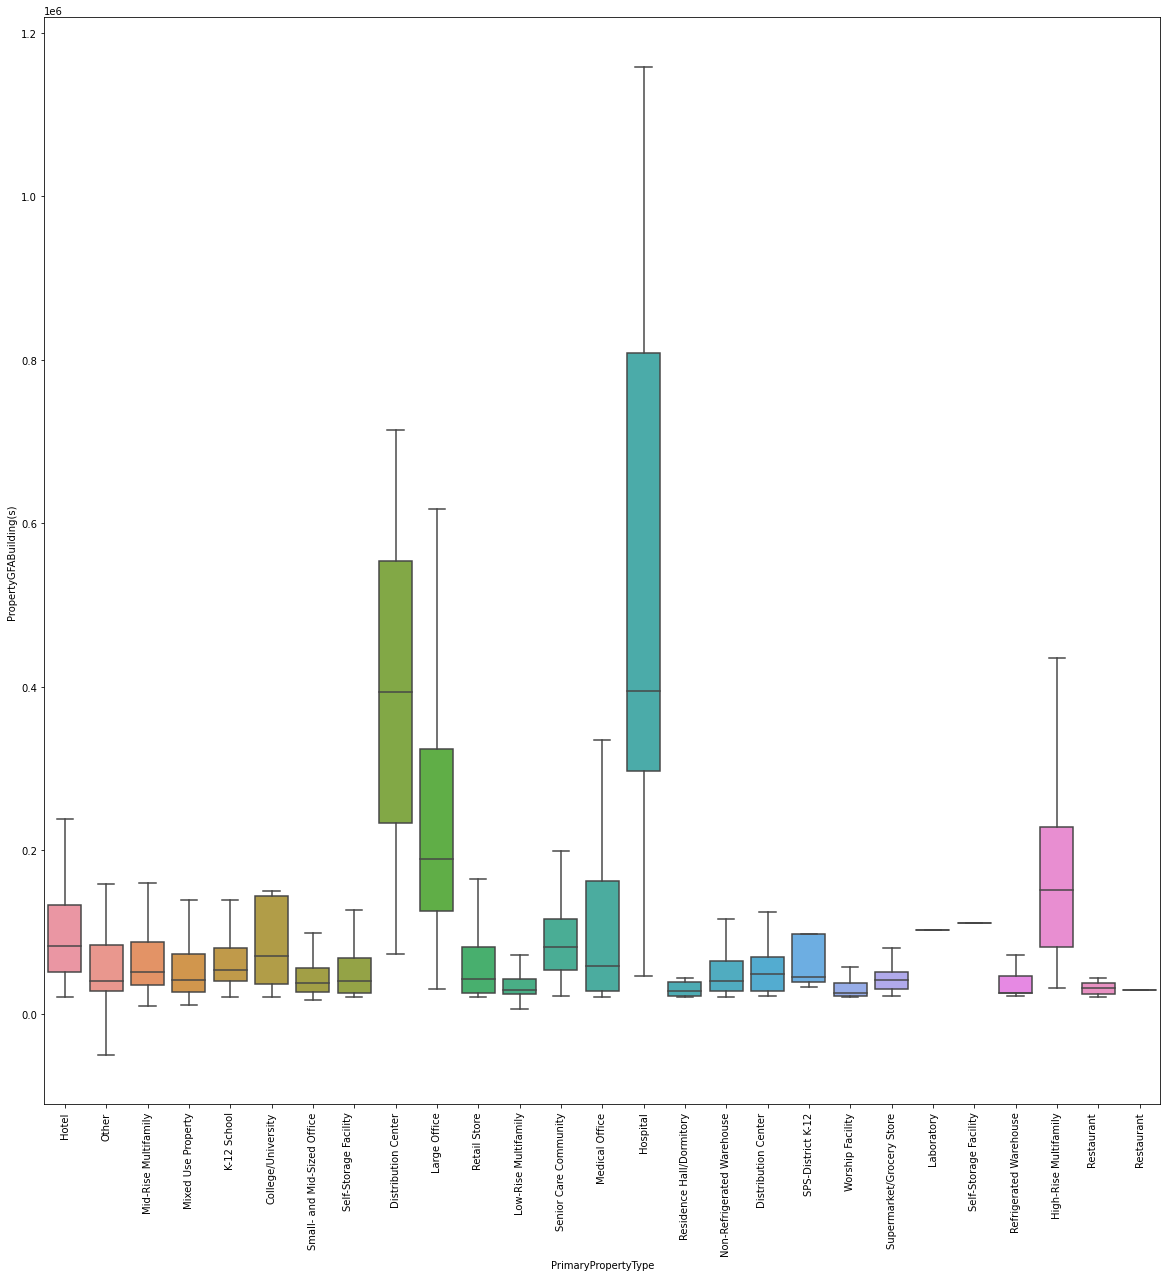

In [331]:
# Distribution de la variables "PropertyGFABuilding(s)"

fig = plt.figure(1, figsize=(20,20))
sns.boxplot(data=data_2015, x="PrimaryPropertyType" , y="PropertyGFABuilding(s)", showfliers=False)
plt.xticks(rotation=90)
plt.show()

#### Sur les boxplots précédents, on constate qu'on a des surfaces négatives, ce qui représente des valeurs abérrantes

In [332]:
data_2015.loc[:,variables_surfaces][data_2015["PropertyGFAParking"]<0]

OSEBuildingID  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
2428          25530                  1             5.0             20967   
3136          29551                  1            11.0             68452   

      PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
2428                  -3                   20970                    20967.0   
3136                  -2                   68454                    61665.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
2428                              NaN                             NaN  
3136                           6787.0                             NaN

#### On va remplacer cette valeur aberrante par celle du dataset de 2016 correspondant à ce bâtiment 

In [333]:
# Bâtiment N° 25530:
data_2015.loc[data_2015["OSEBuildingID"]==25530]["PropertyGFAParking"]

2428   -3
Name: PropertyGFAParking, dtype: int64

In [334]:
data_2016.loc[:,variables_surfaces][data_2016["OSEBuildingID"]==25530]

OSEBuildingID  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
2400          25530                1.0               5             20967   

      PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
2400                   0                   20967                    20967.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
2400                              NaN                             NaN

In [335]:
data_2016.loc[:,variables_surfaces][data_2016["OSEBuildingID"]==29551]

OSEBuildingID  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
3095          29551                1.0              11             68452   

      PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
3095                   0                   68452                    61665.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
3095                           6787.0                             NaN

In [336]:
for elt in variables_surfaces[1:]:
    data_2015.loc[data_2015["OSEBuildingID"]==25530, elt]= data_2016[data_2016["OSEBuildingID"]==25530][elt].values

In [337]:
# On fait la même opération pour le bâtiment N° 29551
for elt in variables_surfaces[1:]:
    data_2015.loc[data_2015["OSEBuildingID"]==29551, elt]= data_2016[data_2016["OSEBuildingID"]==29551][elt].values


In [338]:
data_2015.loc[:,variables_surfaces][data_2015["PropertyGFABuilding(s)"]<0]

OSEBuildingID  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
3139          29788                1.0             5.0             54015   
3322          50002                1.0             3.0             33648   

      PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
3139               97325                  -43310                    54015.0   
3322               84198                  -50550                    83600.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
3139                              NaN                             NaN  
3322                          39000.0                             NaN

In [339]:
data_2016.loc[:,variables_surfaces][data_2016["OSEBuildingID"]==29788]

OSEBuildingID  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
3098          29788                1.0               5             54015   

      PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
3098                   0                   54015                    54015.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
3098                              NaN                             NaN

In [340]:
for elt in variables_surfaces[1:]:
    data_2015.loc[data_2015["OSEBuildingID"]==29788, elt]= data_2016[data_2016["OSEBuildingID"]==29788][elt].values


In [341]:
data_2016.loc[:,variables_surfaces][data_2016["OSEBuildingID"]==50002]

OSEBuildingID  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
3294          50002                1.0               3             33648   

      PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
3294                   0                   33648                    83600.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
3294                          39000.0                             NaN

In [342]:
for elt in variables_surfaces[1:]:
    data_2015.loc[data_2015["OSEBuildingID"]==50002, elt]= data_2016[data_2016["OSEBuildingID"]==50002][elt].values

In [343]:
# on a des valeurs négatives sur le dataset 2015 pour les variables : "SourceEUI(kBtu/sf)", "SourceEUIWN(kBtu/sf)"
data_2015.loc[:,variables_énergies].describe()

OSEBuildingID  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count    3340.000000       3330.000000         3330.000000   
mean    20522.168263         53.626126           57.586547   
std     11511.515874         53.893311           55.604963   
min         1.000000          0.000000            0.000000   
25%     19921.750000         27.300000           29.700000   
50%     22977.000000         37.400000           40.900000   
75%     25748.000000         59.875000           65.575000   
max     50059.000000        800.600000          800.600000   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3330.000000           3330.000000         3.330000e+03   
mean           132.779730            138.936036         4.983106e+06   
std            131.943223            131.359121         1.375330e+07   
min             -2.000000             -2.000000         0.000000e+00   
25%             73.500000             80.300000         9.139300e+05   
50%             95.000000            102.800000         1.776219e+06   
75%            143.900000            151.275000         4.044277e+06   
max           2511.100000           2511.000000         2.958126e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.330000e+03    3.330000e+03      3.330000e+03   
mean            5.203055e+06    2.502851e+05      1.017897e+06   
std             1.400757e+07    3.481900e+06      2.789931e+06   
min             0.000000e+00    0.000000e+00      0.000000e+00   
25%             9.883248e+05    0.000000e+00      1.864908e+05   
50%             1.953996e+06    0.000000e+00      3.400320e+05   
75%             4.368462e+06    0.000000e+00      8.061935e+05   
max             2.977410e+08    1.278697e+08      8.344505e+07   

       Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  
count       3.330000e+03        3.330000e+03      3.330000e+03  
mean        3.473209e+06        1.253304e+04      1.253304e+06  
std         9.519639e+06        4.415142e+04      4.415142e+06  
min         0.000000e+00        0.000000e+00      0.000000e+00  
25%         6.363322e+05        0.000000e+00      0.000000e+00  
50%         1.160236e+06        2.945500e+03      2.945770e+05  
75%         2.750847e+06        1.115325e+04      1.115366e+06  
max         2.847263e+08        1.364484e+06      1.364484e+08

In [344]:
data_2015.loc[:,variables_énergies][data_2015["SourceEUI(kBtu/sf)"]<0]

OSEBuildingID  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
3246          49784              11.7                11.7                -2.0   

      SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
3246                  -2.0             562479.0               562479.0   

      SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
3246             0.0          164853.0           562503.0                 0.0   

      NaturalGas(kBtu)  
3246               0.0

In [345]:
data_2016.loc[:,variables_énergies][data_2016["OSEBuildingID"]==49784]

OSEBuildingID  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
3206          49784               7.1                 5.0                 2.0   

      SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
3206                  -2.1          342726.0938            240132.0938   

      SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
3206             0.0      -33826.80078          -115417.0                 0.0   

      NaturalGas(kBtu)  
3206               0.0

In [346]:
data_2015.loc[data_2015["OSEBuildingID"]==49784, "SourceEUI(kBtu/sf)"]=0
data_2015.loc[data_2015["OSEBuildingID"]==49784, "SourceEUIWN(kBtu/sf)"]=0

In [347]:
#On a des valeurs abérrantes pour 2016 on remplace la ligne par celle de 2015
for elt in variables_énergies[1:]:
    data_2016.loc[data_2016["OSEBuildingID"]==49784, elt]= data_2015[data_2015["OSEBuildingID"]==49784][elt].values

In [348]:
data_2016.loc[:,variables_surfaces].describe()

OSEBuildingID  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count    3376.000000        3368.000000     3376.000000      3.376000e+03   
mean    21208.991114           1.106888        4.709123      9.483354e+04   
std     12223.757015           2.108402        5.494465      2.188376e+05   
min         1.000000           0.000000        0.000000      1.128500e+04   
25%     19990.750000           1.000000        2.000000      2.848700e+04   
50%     23112.000000           1.000000        4.000000      4.417500e+04   
75%     25994.250000           1.000000        5.000000      9.099200e+04   
max     50226.000000         111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         3376.000000            3.376000e+03               3.356000e+03   
mean          8001.526066            8.683201e+04               7.917764e+04   
std          32326.723928            2.079398e+05               2.017034e+05   
min              0.000000            3.636000e+03               5.656000e+03   
25%              0.000000            2.775600e+04               2.509475e+04   
50%              0.000000            4.321600e+04               3.989400e+04   
75%              0.000000            8.427625e+04               7.620025e+04   
max         512608.000000            9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
count                      1679.000000                      596.000000  
mean                      28444.075817                    11738.675166  
std                       54392.917928                    29331.199286  
min                           0.000000                        0.000000  
25%                        5000.000000                     2239.000000  
50%                       10664.000000                     5043.000000  
75%                       26640.000000                    10138.750000  
max                      686750.000000                   459748.000000

In [349]:
data_2016.loc[:,variables_énergies].describe()

OSEBuildingID  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count    3376.000000       3369.000000         3370.000000   
mean    21208.991114         54.733482           57.035786   
std     12223.757015         56.272024           57.161636   
min         1.000000          0.000000            0.000000   
25%     19990.750000         27.900000           29.400000   
50%     23112.000000         38.599998           40.900002   
75%     25994.250000         60.400002           64.275002   
max     50226.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3367.000000           3367.000000         3.371000e+03   
mean           134.232254            137.784556         5.403732e+06   
std            139.288122            139.109184         2.161061e+07   
min              0.000000              0.000000         0.000000e+00   
25%             74.699997             78.400002         9.251286e+05   
50%             96.199997            101.099998         1.803753e+06   
75%            143.899994            148.349998         4.222455e+06   
max           2620.000000           2620.000000         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.370000e+03    3.367000e+03      3.367000e+03   
mean            5.276821e+06    2.745959e+05      1.086698e+06   
std             1.593876e+07    3.912173e+06      4.352465e+06   
min             0.000000e+00    0.000000e+00      0.000000e+00   
25%             9.701822e+05    0.000000e+00      1.874229e+05   
50%             1.904452e+06    0.000000e+00      3.451299e+05   
75%             4.381429e+06    0.000000e+00      8.293178e+05   
max             4.716139e+08    1.349435e+08      1.925775e+08   

       Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  
count       3.367000e+03        3.367000e+03      3.367000e+03  
mean        3.707814e+06        1.368505e+04      1.368505e+06  
std         1.485061e+07        6.709781e+04      6.709781e+06  
min         0.000000e+00        0.000000e+00      0.000000e+00  
25%         6.394870e+05        0.000000e+00      0.000000e+00  
50%         1.177583e+06        3.237538e+03      3.237540e+05  
75%         2.829632e+06        1.189033e+04      1.189034e+06  
max         6.570744e+08        2.979090e+06      2.979090e+08

In [350]:
data_2015.loc[:,variables_énergies][data_2015["OSEBuildingID"]==49784]

OSEBuildingID  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
3246          49784              11.7                11.7                 0.0   

      SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
3246                   0.0             562479.0               562479.0   

      SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
3246             0.0          164853.0           562503.0                 0.0   

      NaturalGas(kBtu)  
3246               0.0

## Jointure externe des 2 datasets

In [351]:
#Jointure externe compléte des 2 datasets pour consever toutes les informations des 2 datasets.
data = pd.merge(data_2015, data_2016, on='OSEBuildingID', how='outer') 

In [352]:
data

OSEBuildingID  DataYear_x  BuildingType_x PrimaryPropertyType_x  \
0                 1      2015.0  NonResidential                 Hotel   
1                 2      2015.0  NonResidential                 Hotel   
2                 3      2015.0  NonResidential                 Hotel   
3                 5      2015.0  NonResidential                 Hotel   
4                 8      2015.0  NonResidential                 Hotel   
...             ...         ...             ...                   ...   
3427          50222         NaN             NaN                   NaN   
3428          50223         NaN             NaN                   NaN   
3429          50224         NaN             NaN                   NaN   
3430          50225         NaN             NaN                   NaN   
3431          50226         NaN             NaN                   NaN   

             PropertyName_x TaxParcelIdentificationNumber_x  \
0      MAYFLOWER PARK HOTEL                       659000030   
1           PARAMOUNT HOTEL                       659000220   
2              WESTIN HOTEL                       659000475   
3                 HOTEL MAX                       659000640   
4     WARWICK SEATTLE HOTEL                       659000970   
...                     ...                             ...   
3427                    NaN                             NaN   
3428                    NaN                             NaN   
3429                    NaN                             NaN   
3430                    NaN                             NaN   
3431                    NaN                             NaN   

      CouncilDistrictCode_x Neighborhood_x  YearBuilt_x  NumberofBuildings_x  \
0                       7.0       DOWNTOWN       1927.0                  1.0   
1                       7.0       DOWNTOWN       1996.0                  1.0   
2                       7.0       DOWNTOWN       1969.0                  1.0   
3                       7.0       DOWNTOWN       1926.0                  1.0   
4                       7.0       DOWNTOWN       1980.0                  1.0   
...                     ...            ...          ...                  ...   
3427                    NaN            NaN          NaN                  NaN   
3428                    NaN            NaN          NaN                  NaN   
3429                    NaN            NaN          NaN                  NaN   
3430                    NaN            NaN          NaN                  NaN   
3431                    NaN            NaN          NaN                  NaN   

      ...  Electricity(kWh)_y  Electricity(kBtu)_y  NaturalGas(therms)_y  \
0     ...        1.156514e+06         3.946027e+06          12764.529300   
1     ...        9.504252e+05         3.242851e+06          51450.816410   
2     ...        1.451544e+07         4.952666e+07          14938.000000   
3     ...        8.115253e+05         2.768924e+06          18112.130860   
4     ...        1.573449e+06         5.368607e+06          88039.984380   
...   ...                 ...                  ...                   ...   
3427  ...        1.536550e+05         5.242709e+05           3254.750244   
3428  ...        1.162210e+05         3.965461e+05           5537.299805   
3429  ...        5.252517e+05         1.792159e+06          39737.390630   
3430  ...        1.022480e+05         3.488702e+05           3706.010010   
3431  ...        1.267744e+05         4.325542e+05           7203.419922   

      NaturalGas(kBtu)_y DefaultData_y Comments_y  \
0           1.276453e+06         False        NaN   
1           5.145082e+06         False        NaN   
2           1.493800e+06         False        NaN   
3           1.811213e+06         False        NaN   
4           8.803998e+06         False        NaN   
...                  ...           ...        ...   
3427        3.254750e+05          True        NaN   
3428        5.537300e+05         False        NaN   
3429        3.973739e

In [353]:
data.columns

Index(['OSEBuildingID', 'DataYear_x', 'BuildingType_x',
       'PrimaryPropertyType_x', 'PropertyName_x',
       'TaxParcelIdentificationNumber_x', 'CouncilDistrictCode_x',
       'Neighborhood_x', 'YearBuilt_x', 'NumberofBuildings_x',
       'NumberofFloors_x', 'PropertyGFATotal_x', 'PropertyGFAParking_x',
       'PropertyGFABuilding(s)_x', 'ListOfAllPropertyUseTypes_x',
       'LargestPropertyUseType_x', 'LargestPropertyUseTypeGFA_x',
       'SecondLargestPropertyUseType_x', 'SecondLargestPropertyUseTypeGFA_x',
       'ThirdLargestPropertyUseType_x', 'ThirdLargestPropertyUseTypeGFA_x',
       'YearsENERGYSTARCertified_x', 'ENERGYSTARScore_x', 'SiteEUI(kBtu/sf)_x',
       'SiteEUIWN(kBtu/sf)_x', 'SourceEUI(kBtu/sf)_x',
       'SourceEUIWN(kBtu/sf)_x', 'SiteEnergyUse(kBtu)_x',
       'SiteEnergyUseWN(kBtu)_x', 'SteamUse(kBtu)_x', 'Electricity(kWh)_x',
       'Electricity(kBtu)_x', 'NaturalGas(therms)_x', 'NaturalGas(kBtu)_x',
       'TotalGHGEmissions_x', 'GHGEmissionsIntensity_x', 'De

### On renomme les colonnes avec l'indexe de l'année : x = 2015  et   y = 2016

In [354]:
for i in range(1,46):
    data.rename(columns={data.columns[i]: data.columns[i][:-1]+'2015'+data.columns[i][:0]}, inplace=True)

In [355]:
for i in range(46,len(data.columns)):
      data.rename(columns={data.columns[i]: data.columns[i][:-1]+'2016'+data.columns[i][:0]}, inplace=True)
    

In [356]:
data.columns

Index(['OSEBuildingID', 'DataYear_2015', 'BuildingType_2015',
       'PrimaryPropertyType_2015', 'PropertyName_2015',
       'TaxParcelIdentificationNumber_2015', 'CouncilDistrictCode_2015',
       'Neighborhood_2015', 'YearBuilt_2015', 'NumberofBuildings_2015',
       'NumberofFloors_2015', 'PropertyGFATotal_2015',
       'PropertyGFAParking_2015', 'PropertyGFABuilding(s)_2015',
       'ListOfAllPropertyUseTypes_2015', 'LargestPropertyUseType_2015',
       'LargestPropertyUseTypeGFA_2015', 'SecondLargestPropertyUseType_2015',
       'SecondLargestPropertyUseTypeGFA_2015',
       'ThirdLargestPropertyUseType_2015',
       'ThirdLargestPropertyUseTypeGFA_2015', 'YearsENERGYSTARCertified_2015',
       'ENERGYSTARScore_2015', 'SiteEUI(kBtu/sf)_2015',
       'SiteEUIWN(kBtu/sf)_2015', 'SourceEUI(kBtu/sf)_2015',
       'SourceEUIWN(kBtu/sf)_2015', 'SiteEnergyUse(kBtu)_2015',
       'SiteEnergyUseWN(kBtu)_2015', 'SteamUse(kBtu)_2015',
       'Electricity(kWh)_2015', 'Electricity(kBtu)_2015',

In [357]:
# Pour faciliter notre étude, on définit les identifiants des bâtiments comme index du dataset.
data.set_index('OSEBuildingID', inplace = True)

In [358]:
data.min()

C:\Users\Brahim\AppData\Local\Temp/ipykernel_16524/927168777.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.min()


DataYear_2015                               2015.0
CouncilDistrictCode_2015                       1.0
YearBuilt_2015                              1900.0
NumberofBuildings_2015                         1.0
NumberofFloors_2015                            0.0
PropertyGFATotal_2015                      20000.0
PropertyGFAParking_2015                        0.0
PropertyGFABuilding(s)_2015                 5236.0
LargestPropertyUseTypeGFA_2015              5872.0
SecondLargestPropertyUseTypeGFA_2015           0.0
ThirdLargestPropertyUseTypeGFA_2015            0.0
ENERGYSTARScore_2015                           1.0
SiteEUI(kBtu/sf)_2015                          0.0
SiteEUIWN(kBtu/sf)_2015                        0.0
SourceEUI(kBtu/sf)_2015                        0.0
SourceEUIWN(kBtu/sf)_2015                      0.0
SiteEnergyUse(kBtu)_2015                       0.0
SiteEnergyUseWN(kBtu)_2015                     0.0
SteamUse(kBtu)_2015                            0.0
Electricity(kWh)_2015          

<AxesSubplot:>

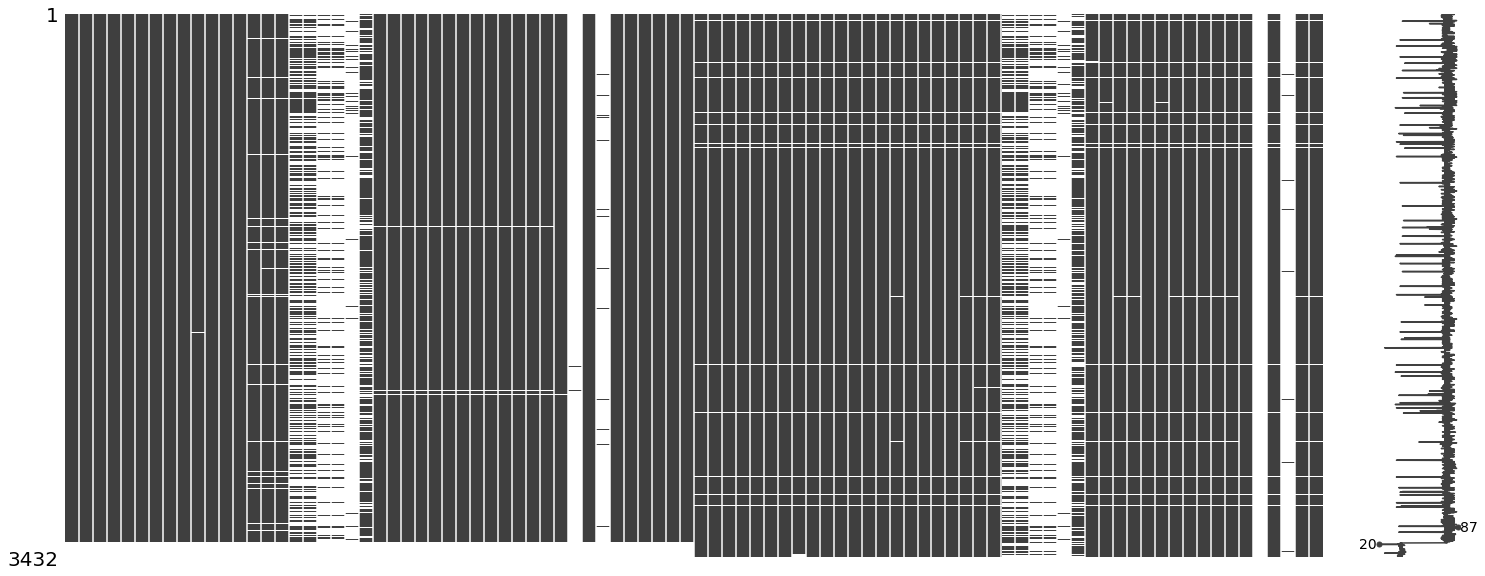

In [359]:
# Import des librairies
import missingno as msno
%matplotlib inline
msno.matrix(data)

<AxesSubplot:>

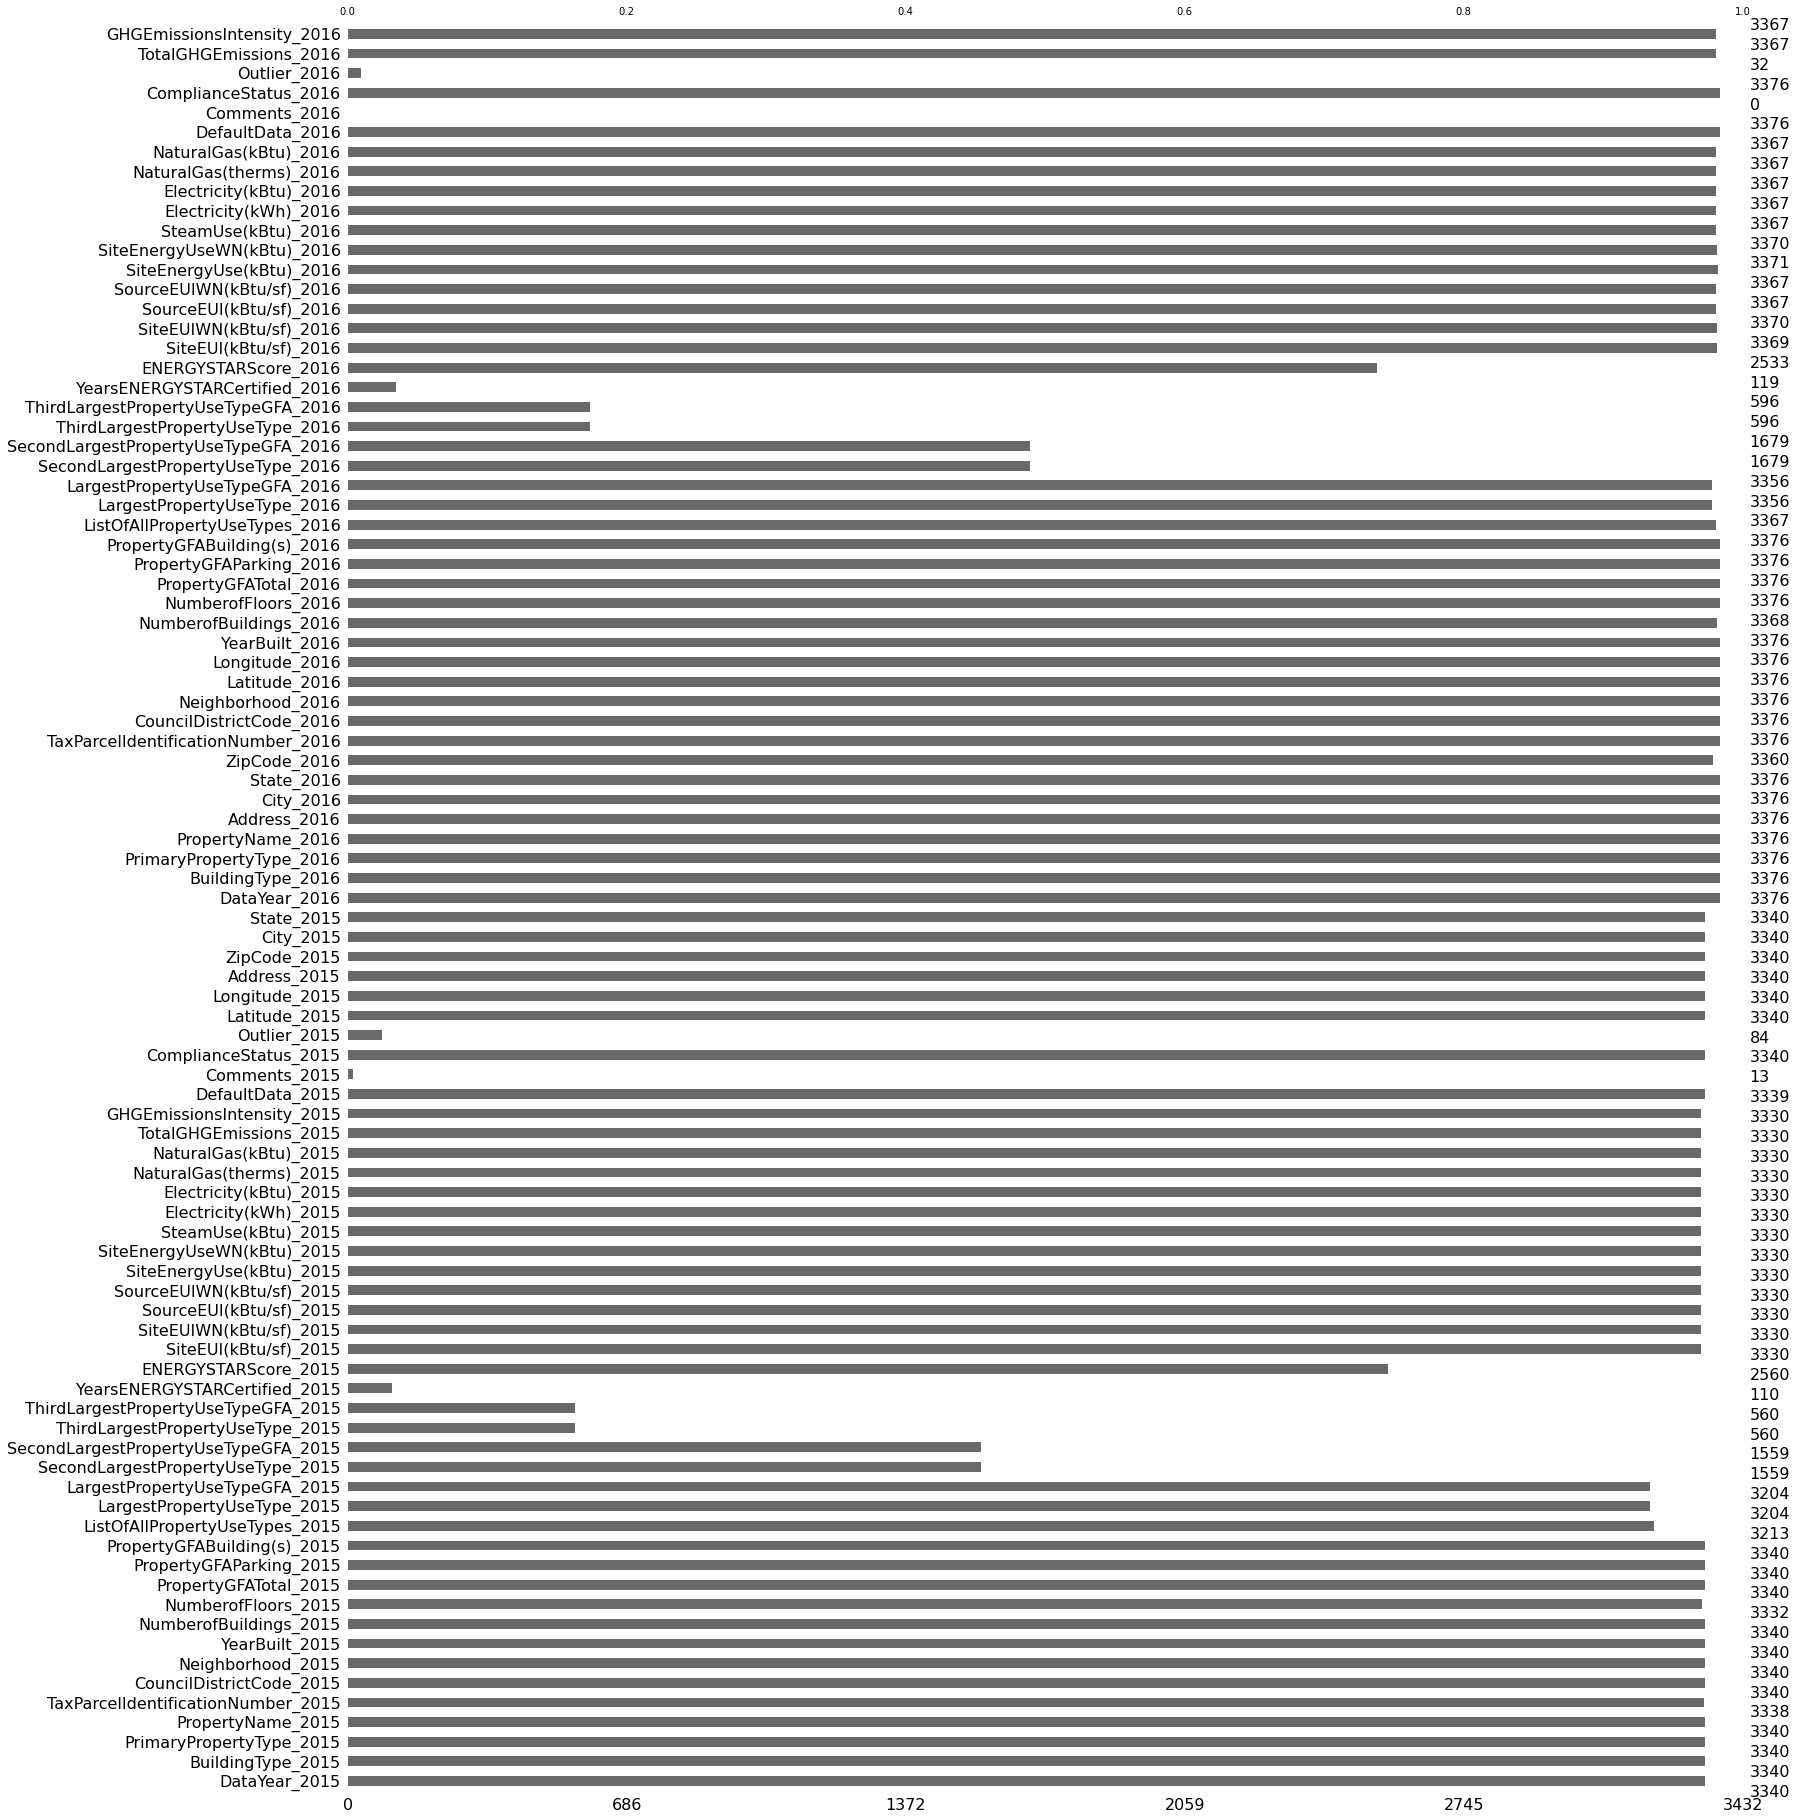

In [360]:
msno.bar(data)

In [361]:
data.loc[:, ["ENERGYSTARScore_2015", "ENERGYSTARScore_2016"]]

ENERGYSTARScore_2015  ENERGYSTARScore_2016
OSEBuildingID                                            
1                              65.0                  60.0
2                              51.0                  61.0
3                              18.0                  43.0
5                               1.0                  56.0
8                              67.0                  75.0
...                             ...                   ...
50222                           NaN                  46.0
50223                           NaN                   NaN
50224                           NaN                   NaN
50225                           NaN                   NaN
50226                           NaN                   NaN

[3432 rows x 2 columns]

### Suppression d'autres colonnes:

#### Ce sont des colonnes avec beaucoup de valeurs manquantes et des colonnes non utiles à notre étude

In [362]:
data.loc[:,["Comments_2015", "Comments_2016"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3432 entries, 1 to 50226
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Comments_2015  13 non-null     object 
 1   Comments_2016  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 80.4+ KB


In [363]:
data.drop(columns=["Comments_2015", "Comments_2016"], inplace=True)

In [364]:
data.loc[:,["Outlier_2015", "Outlier_2016"]]

Outlier_2015 Outlier_2016
OSEBuildingID                           
1                       NaN          NaN
2                       NaN          NaN
3                       NaN          NaN
5              High Outlier          NaN
8                       NaN          NaN
...                     ...          ...
50222                   NaN          NaN
50223                   NaN          NaN
50224                   NaN          NaN
50225                   NaN          NaN
50226                   NaN          NaN

[3432 rows x 2 columns]

In [365]:
data.drop(columns=["Outlier_2015", "Outlier_2016"], inplace=True)

In [366]:
data.loc[:,["YearsENERGYSTARCertified_2015", "YearsENERGYSTARCertified_2016"]]

YearsENERGYSTARCertified_2015 YearsENERGYSTARCertified_2016
OSEBuildingID                                                            
1                                       NaN                           NaN
2                                       NaN                           NaN
3                                       NaN                           NaN
5                                       NaN                           NaN
8                                       NaN                           NaN
...                                     ...                           ...
50222                                   NaN                           NaN
50223                                   NaN                           NaN
50224                                   NaN                           NaN
50225                                   NaN                           NaN
50226                                   NaN                           NaN

[3432 rows x 2 columns]

In [367]:
data.drop(columns=["YearsENERGYSTARCertified_2015", "YearsENERGYSTARCertified_2016"], inplace=True)

In [368]:
data.loc[:,["ComplianceStatus_2015", "ComplianceStatus_2016"]]

ComplianceStatus_2015         ComplianceStatus_2016
OSEBuildingID                                                    
1                         Compliant                     Compliant
2                         Compliant                     Compliant
3                         Compliant                     Compliant
5                         Compliant                     Compliant
8                         Compliant                     Compliant
...                             ...                           ...
50222                           NaN  Error - Correct Default Data
50223                           NaN                     Compliant
50224                           NaN                     Compliant
50225                           NaN                     Compliant
50226                           NaN                     Compliant

[3432 rows x 2 columns]

In [369]:
data.drop(columns=["ComplianceStatus_2015", "ComplianceStatus_2016"], inplace=True)

In [370]:
data.drop(columns=["TaxParcelIdentificationNumber_2015", "TaxParcelIdentificationNumber_2016", "CouncilDistrictCode_2015", "CouncilDistrictCode_2016"], inplace=True)

#### Suppression des colonnes avec une information unique ("State", "City", "DataYear")

In [371]:
data = data.drop(["State_2015", "State_2016","City_2015", "City_2016", "DataYear_2015", "DataYear_2016", 'DefaultData_2015', 'DefaultData_2016'], axis=1)

Dans le dataset data qui rassemble les données des 2 années, nous allons définr des colonnes qui synthétisent les données des 2 années. Ces colonnes n'auront plus d'index années.
Cela se fera au cas par cas.

In [372]:
data.columns.tolist()

['BuildingType_2015',
 'PrimaryPropertyType_2015',
 'PropertyName_2015',
 'Neighborhood_2015',
 'YearBuilt_2015',
 'NumberofBuildings_2015',
 'NumberofFloors_2015',
 'PropertyGFATotal_2015',
 'PropertyGFAParking_2015',
 'PropertyGFABuilding(s)_2015',
 'ListOfAllPropertyUseTypes_2015',
 'LargestPropertyUseType_2015',
 'LargestPropertyUseTypeGFA_2015',
 'SecondLargestPropertyUseType_2015',
 'SecondLargestPropertyUseTypeGFA_2015',
 'ThirdLargestPropertyUseType_2015',
 'ThirdLargestPropertyUseTypeGFA_2015',
 'ENERGYSTARScore_2015',
 'SiteEUI(kBtu/sf)_2015',
 'SiteEUIWN(kBtu/sf)_2015',
 'SourceEUI(kBtu/sf)_2015',
 'SourceEUIWN(kBtu/sf)_2015',
 'SiteEnergyUse(kBtu)_2015',
 'SiteEnergyUseWN(kBtu)_2015',
 'SteamUse(kBtu)_2015',
 'Electricity(kWh)_2015',
 'Electricity(kBtu)_2015',
 'NaturalGas(therms)_2015',
 'NaturalGas(kBtu)_2015',
 'TotalGHGEmissions_2015',
 'GHGEmissionsIntensity_2015',
 'Latitude_2015',
 'Longitude_2015',
 'Address_2015',
 'ZipCode_2015',
 'BuildingType_2016',
 'PrimaryPro

In [373]:
variables_des_2années = ['BuildingType_2015','PrimaryPropertyType_2015','PropertyName_2015','Neighborhood_2015','YearBuilt_2015',
 'NumberofBuildings_2015','NumberofFloors_2015','PropertyGFATotal_2015','PropertyGFAParking_2015','PropertyGFABuilding(s)_2015',
 'ListOfAllPropertyUseTypes_2015','LargestPropertyUseType_2015','LargestPropertyUseTypeGFA_2015','SecondLargestPropertyUseType_2015',
 'SecondLargestPropertyUseTypeGFA_2015','ThirdLargestPropertyUseType_2015','ThirdLargestPropertyUseTypeGFA_2015','ENERGYSTARScore_2015',
 'SiteEUI(kBtu/sf)_2015','SiteEUIWN(kBtu/sf)_2015','SourceEUI(kBtu/sf)_2015','SourceEUIWN(kBtu/sf)_2015','SiteEnergyUse(kBtu)_2015',
 'SiteEnergyUseWN(kBtu)_2015','SteamUse(kBtu)_2015','Electricity(kWh)_2015','Electricity(kBtu)_2015','NaturalGas(therms)_2015',
 'NaturalGas(kBtu)_2015','TotalGHGEmissions_2015','GHGEmissionsIntensity_2015','Latitude_2015','Longitude_2015',
 'Address_2015','ZipCode_2015',
 
 'BuildingType_2016','PrimaryPropertyType_2016','PropertyName_2016','Neighborhood_2016','YearBuilt_2016',
 'NumberofBuildings_2016','NumberofFloors_2016','PropertyGFATotal_2016','PropertyGFAParking_2016','PropertyGFABuilding(s)_2016',
 'ListOfAllPropertyUseTypes_2016','LargestPropertyUseType_2016','LargestPropertyUseTypeGFA_2016','SecondLargestPropertyUseType_2016',
 'SecondLargestPropertyUseTypeGFA_2016','ThirdLargestPropertyUseType_2016','ThirdLargestPropertyUseTypeGFA_2016','ENERGYSTARScore_2016',
 'SiteEUI(kBtu/sf)_2016','SiteEUIWN(kBtu/sf)_2016','SourceEUI(kBtu/sf)_2016','SourceEUIWN(kBtu/sf)_2016','SiteEnergyUse(kBtu)_2016',
 'SiteEnergyUseWN(kBtu)_2016','SteamUse(kBtu)_2016','Electricity(kWh)_2016','Electricity(kBtu)_2016','NaturalGas(therms)_2016',
 'NaturalGas(kBtu)_2016','TotalGHGEmissions_2016','GHGEmissionsIntensity_2016','Latitude_2016','Longitude_2016',
 'Address_2016','ZipCode_2016']


In [374]:
len(variables_des_2années)

70

In [375]:
for i in range(len(variables_des_2années[:35])):
    print((variables_des_2années[:35][i],variables_des_2années[35:][i]))

('BuildingType_2015', 'BuildingType_2016')
('PrimaryPropertyType_2015', 'PrimaryPropertyType_2016')
('PropertyName_2015', 'PropertyName_2016')
('Neighborhood_2015', 'Neighborhood_2016')
('YearBuilt_2015', 'YearBuilt_2016')
('NumberofBuildings_2015', 'NumberofBuildings_2016')
('NumberofFloors_2015', 'NumberofFloors_2016')
('PropertyGFATotal_2015', 'PropertyGFATotal_2016')
('PropertyGFAParking_2015', 'PropertyGFAParking_2016')
('PropertyGFABuilding(s)_2015', 'PropertyGFABuilding(s)_2016')
('ListOfAllPropertyUseTypes_2015', 'ListOfAllPropertyUseTypes_2016')
('LargestPropertyUseType_2015', 'LargestPropertyUseType_2016')
('LargestPropertyUseTypeGFA_2015', 'LargestPropertyUseTypeGFA_2016')
('SecondLargestPropertyUseType_2015', 'SecondLargestPropertyUseType_2016')
('SecondLargestPropertyUseTypeGFA_2015', 'SecondLargestPropertyUseTypeGFA_2016')
('ThirdLargestPropertyUseType_2015', 'ThirdLargestPropertyUseType_2016')
('ThirdLargestPropertyUseTypeGFA_2015', 'ThirdLargestPropertyUseTypeGFA_2016')

In [376]:
# Variables pour l'année 2015
variables_des_2années[:35]

['BuildingType_2015',
 'PrimaryPropertyType_2015',
 'PropertyName_2015',
 'Neighborhood_2015',
 'YearBuilt_2015',
 'NumberofBuildings_2015',
 'NumberofFloors_2015',
 'PropertyGFATotal_2015',
 'PropertyGFAParking_2015',
 'PropertyGFABuilding(s)_2015',
 'ListOfAllPropertyUseTypes_2015',
 'LargestPropertyUseType_2015',
 'LargestPropertyUseTypeGFA_2015',
 'SecondLargestPropertyUseType_2015',
 'SecondLargestPropertyUseTypeGFA_2015',
 'ThirdLargestPropertyUseType_2015',
 'ThirdLargestPropertyUseTypeGFA_2015',
 'ENERGYSTARScore_2015',
 'SiteEUI(kBtu/sf)_2015',
 'SiteEUIWN(kBtu/sf)_2015',
 'SourceEUI(kBtu/sf)_2015',
 'SourceEUIWN(kBtu/sf)_2015',
 'SiteEnergyUse(kBtu)_2015',
 'SiteEnergyUseWN(kBtu)_2015',
 'SteamUse(kBtu)_2015',
 'Electricity(kWh)_2015',
 'Electricity(kBtu)_2015',
 'NaturalGas(therms)_2015',
 'NaturalGas(kBtu)_2015',
 'TotalGHGEmissions_2015',
 'GHGEmissionsIntensity_2015',
 'Latitude_2015',
 'Longitude_2015',
 'Address_2015',
 'ZipCode_2015']

In [377]:
# Variables pour l'année 2016
variables_des_2années[35:]

['BuildingType_2016',
 'PrimaryPropertyType_2016',
 'PropertyName_2016',
 'Neighborhood_2016',
 'YearBuilt_2016',
 'NumberofBuildings_2016',
 'NumberofFloors_2016',
 'PropertyGFATotal_2016',
 'PropertyGFAParking_2016',
 'PropertyGFABuilding(s)_2016',
 'ListOfAllPropertyUseTypes_2016',
 'LargestPropertyUseType_2016',
 'LargestPropertyUseTypeGFA_2016',
 'SecondLargestPropertyUseType_2016',
 'SecondLargestPropertyUseTypeGFA_2016',
 'ThirdLargestPropertyUseType_2016',
 'ThirdLargestPropertyUseTypeGFA_2016',
 'ENERGYSTARScore_2016',
 'SiteEUI(kBtu/sf)_2016',
 'SiteEUIWN(kBtu/sf)_2016',
 'SourceEUI(kBtu/sf)_2016',
 'SourceEUIWN(kBtu/sf)_2016',
 'SiteEnergyUse(kBtu)_2016',
 'SiteEnergyUseWN(kBtu)_2016',
 'SteamUse(kBtu)_2016',
 'Electricity(kWh)_2016',
 'Electricity(kBtu)_2016',
 'NaturalGas(therms)_2016',
 'NaturalGas(kBtu)_2016',
 'TotalGHGEmissions_2016',
 'GHGEmissionsIntensity_2016',
 'Latitude_2016',
 'Longitude_2016',
 'Address_2016',
 'ZipCode_2016']

In [378]:
variables_finales=['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'Address',
 'ZipCode']

In [379]:
for i in range(len(variables_des_2années[:35])):
    print((variables_des_2années[:35][i], variables_des_2années[35:][i]), variables_finales[i])

('BuildingType_2015', 'BuildingType_2016') BuildingType
('PrimaryPropertyType_2015', 'PrimaryPropertyType_2016') PrimaryPropertyType
('PropertyName_2015', 'PropertyName_2016') PropertyName
('Neighborhood_2015', 'Neighborhood_2016') Neighborhood
('YearBuilt_2015', 'YearBuilt_2016') YearBuilt
('NumberofBuildings_2015', 'NumberofBuildings_2016') NumberofBuildings
('NumberofFloors_2015', 'NumberofFloors_2016') NumberofFloors
('PropertyGFATotal_2015', 'PropertyGFATotal_2016') PropertyGFATotal
('PropertyGFAParking_2015', 'PropertyGFAParking_2016') PropertyGFAParking
('PropertyGFABuilding(s)_2015', 'PropertyGFABuilding(s)_2016') PropertyGFABuilding(s)
('ListOfAllPropertyUseTypes_2015', 'ListOfAllPropertyUseTypes_2016') ListOfAllPropertyUseTypes
('LargestPropertyUseType_2015', 'LargestPropertyUseType_2016') LargestPropertyUseType
('LargestPropertyUseTypeGFA_2015', 'LargestPropertyUseTypeGFA_2016') LargestPropertyUseTypeGFA
('SecondLargestPropertyUseType_2015', 'SecondLargestPropertyUseType_201

### Remplacement de certaines valeurs manquantes

Remplacement de quelques valeurs manquantes.
Les colonnes 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType' et 'ThirdLargestPropertyUseTypeGFA' contiennent beaucoup de valeurs manquantes. On considère que les bâtiments dont les valeurs sont manquantes pour ces variables ne possèdent pas de deuxième et troisième utilisation donc on ajoute une catégorie aux types d'utilisation et on remplace les valeurs de surface par 0.

In [380]:
# Les valeurs manquantes sont remplacés par une catégorie supplémentaire
data["SecondLargestPropertyUseType_2015"].fillna("Nothing", inplace=True)
data["SecondLargestPropertyUseType_2016"].fillna("Nothing", inplace=True)

# Les valeurs manquantes sont remplacés par 0
data["SecondLargestPropertyUseTypeGFA_2015"].fillna(0, inplace=True)
data["SecondLargestPropertyUseTypeGFA_2016"].fillna(0, inplace=True)

In [381]:
# Les valeurs manquantes sont remplacés par une catégorie supplémentaire
data["ThirdLargestPropertyUseType_2015"].fillna("Nothing", inplace=True)
data["ThirdLargestPropertyUseType_2016"].fillna("Nothing", inplace=True)

# Les valeurs manquantes sont remplacés par 0
data["ThirdLargestPropertyUseTypeGFA_2015"].fillna(0, inplace=True)
data["ThirdLargestPropertyUseTypeGFA_2016"].fillna(0, inplace=True)


#### Nous avons un certain nombre de bâtiments présents uniquement dans le relevé de 2015 et d'autres uniquement dans le relevé de 2016.
#### Pour ces bâtiments, toutes leur données vont être conservées telles quelles dans ces nouvelles colonnes( variables_finales ).

In [382]:
# Liste des bâtiments du relevé de 2015 non relevé en 2016:
ident_specifque_a_2015 = [elt for elt in data_2015["OSEBuildingID"].values if elt not in data_2016["OSEBuildingID"].values]

# Liste des bâtiments du relevé de 2016 non relevé en 2015:
ident_specifque_a_2016 = [elt for elt in data_2016["OSEBuildingID"].values if elt not in data_2015["OSEBuildingID"].values]

In [383]:
# Conservation des donneés des bâtiments uniquement présents dans le data_2015:
for i in ident_specifque_a_2015:
    for j in range(len(variables_finales)):
         data.loc[i,variables_finales[j]] = data.loc[i,variables_des_2années[:35][j]]

In [384]:
# Conservation des donneés des bâtiments uniquement présents dans le data_2016:
for i in ident_specifque_a_2016:
    for j in range(len(variables_finales)):
         data.loc[i,variables_finales[j]] = data.loc[i,variables_des_2années[35:][j]]

In [385]:
(data["NaturalGas(kBtu)_2015"] - data["NaturalGas(kBtu)_2016"])*100/data["NaturalGas(kBtu)_2015"]

OSEBuildingID
1        -0.319478
2       -15.646198
3        59.734764
5         9.525030
8        -0.466650
           ...    
50222          NaN
50223          NaN
50224          NaN
50225          NaN
50226          NaN
Length: 3432, dtype: float64

In [386]:
data.columns

Index(['BuildingType_2015', 'PrimaryPropertyType_2015', 'PropertyName_2015',
       'Neighborhood_2015', 'YearBuilt_2015', 'NumberofBuildings_2015',
       'NumberofFloors_2015', 'PropertyGFATotal_2015',
       'PropertyGFAParking_2015', 'PropertyGFABuilding(s)_2015',
       ...
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Latitude', 'Longitude', 'Address', 'ZipCode'],
      dtype='object', length=105)

In [387]:
# Liste des variables indiquant les différentes mesures de consommations en énérgies(en éléctricité, en gaz, en vapeurs, consommation totale etc.)

variables_énergies_2015_2016 = ['SiteEUI(kBtu/sf)_2015','SiteEUI(kBtu/sf)_2016',
       'SiteEUIWN(kBtu/sf)_2015','SiteEUIWN(kBtu/sf)_2016',
        'SourceEUI(kBtu/sf)_2015','SourceEUI(kBtu/sf)_2016',
       'SourceEUIWN(kBtu/sf)_2015','SourceEUIWN(kBtu/sf)_2016',
        'SiteEnergyUse(kBtu)_2015','SiteEnergyUse(kBtu)_2016',
       'SiteEnergyUseWN(kBtu)_2015','SiteEnergyUseWN(kBtu)_2016',
        'SteamUse(kBtu)_2015','SteamUse(kBtu)_2016',
       'Electricity(kWh)_2015', 'Electricity(kWh)_2016',
        'Electricity(kBtu)_2015','Electricity(kBtu)_2016',
       'NaturalGas(therms)_2015', 'NaturalGas(therms)_2016',
        'NaturalGas(kBtu)_2015','NaturalGas(kBtu)_2016']

# Liste des variables indiquant les mesures des émissions des gaz à effet de serre (GES):

variables_émissions_ges_2015_2016 = ['TotalGHGEmissions_2015', 'TotalGHGEmissions_2016',
        'GHGEmissionsIntensity_2015', 'GHGEmissionsIntensity_2016']

In [388]:
len(variables_énergies_2015_2016)

22

In [389]:
len(variables_émissions_ges_2015_2016)

4

## Ditrsibution des variables des consommations des énérgies et celles des émissions à effet de serre pour les années 2015 et 2016

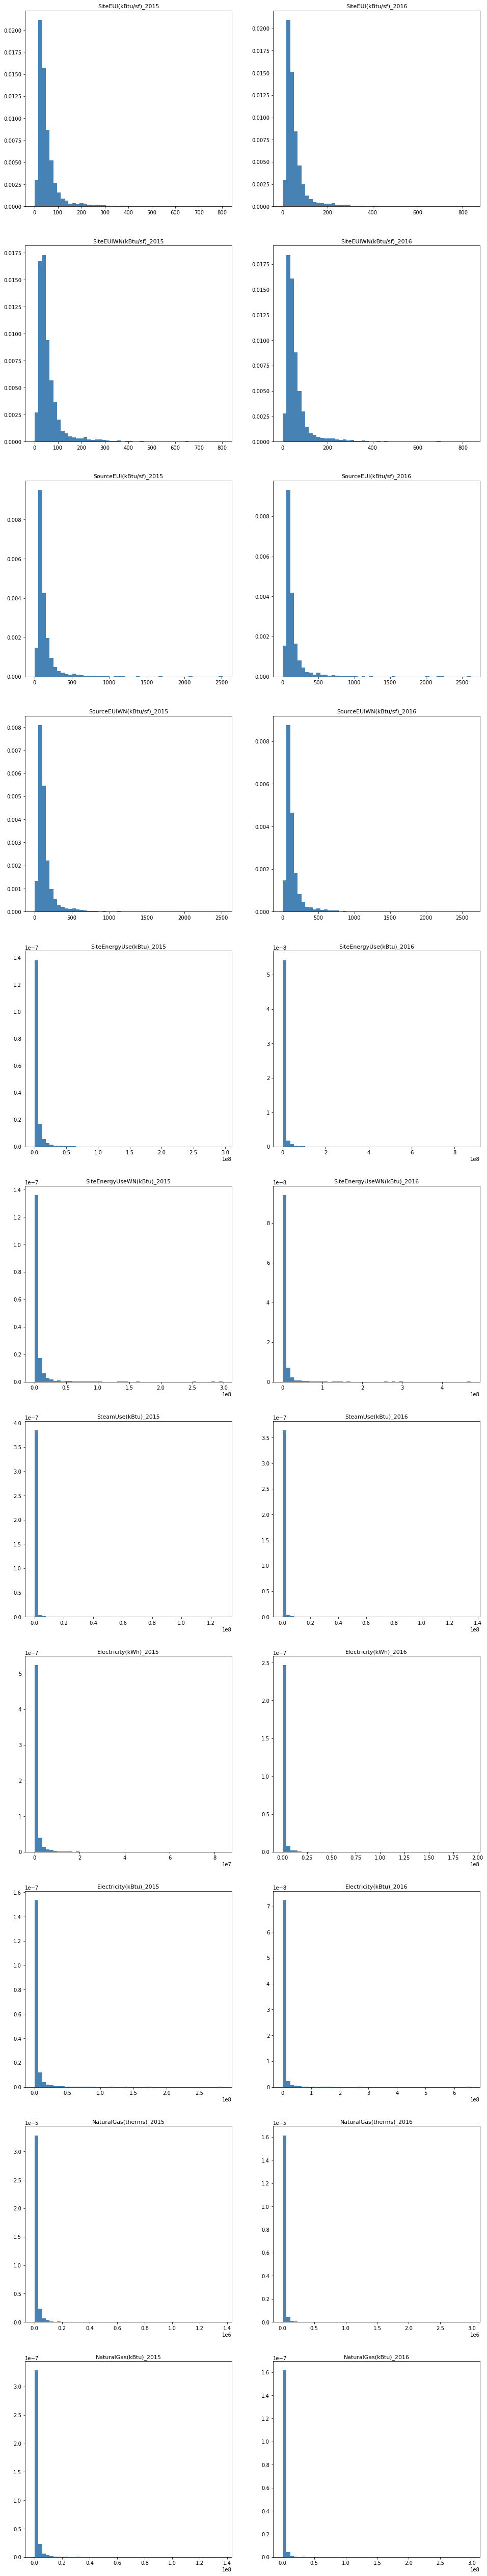

In [390]:
# Ditrsibution des variables des consommations des énérgies
fig = plt.figure(figsize=(16, 92))
for i in range(22):
    ax = fig.add_subplot(11,2, (i+1))
    h = ax.hist(data.loc[:,variables_énergies_2015_2016[i]], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(variables_énergies_2015_2016[i], fontsize=11)


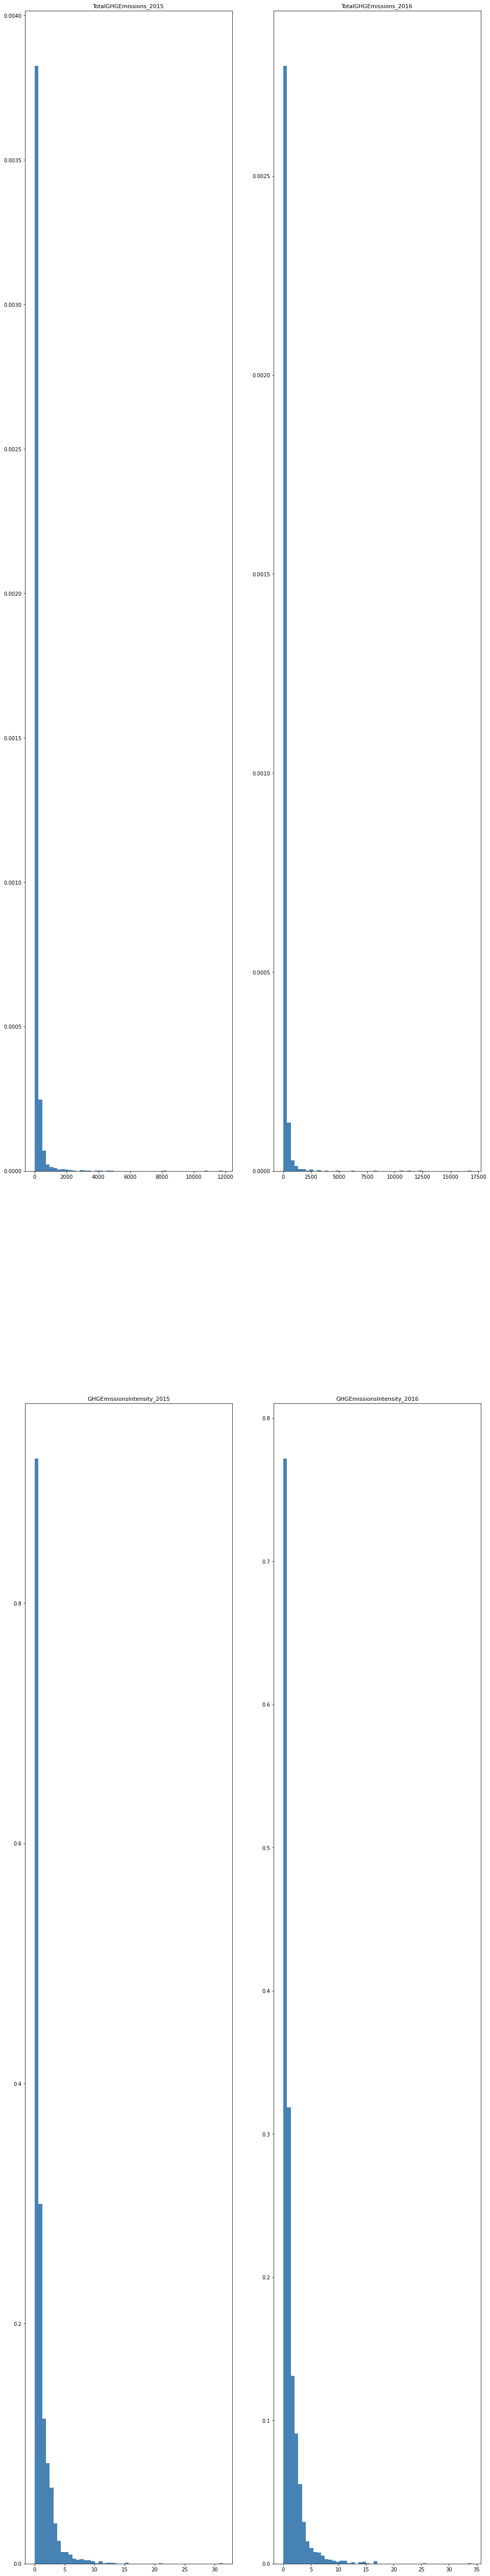

In [391]:
# Ditrsibution des variables des émissions à effet de serre
fig = plt.figure(figsize=(16, 92))
for i in range(4):
    ax = fig.add_subplot(2,2, (i+1))
    h = ax.hist(data.loc[:,variables_émissions_ges_2015_2016[i]], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(variables_émissions_ges_2015_2016[i], fontsize=11)

C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


<Figure size 1872x6624 with 0 Axes>

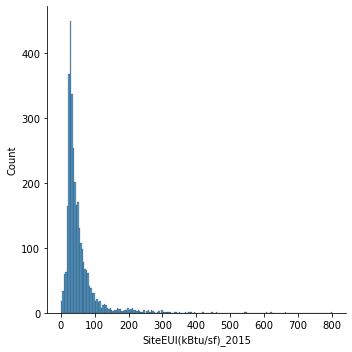

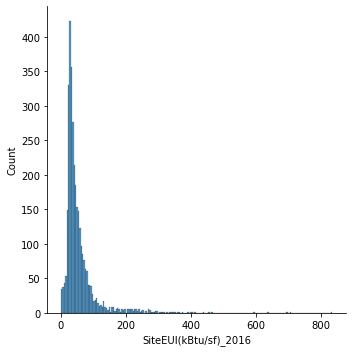

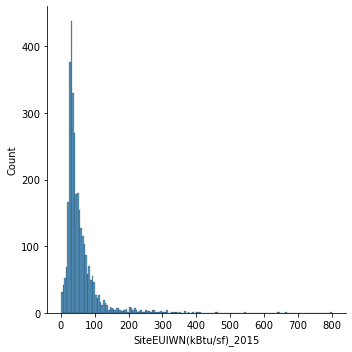

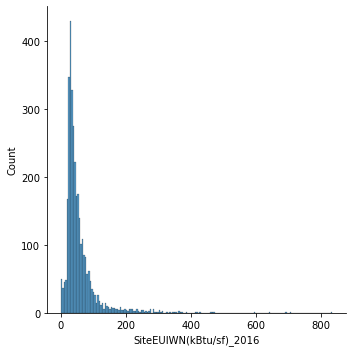

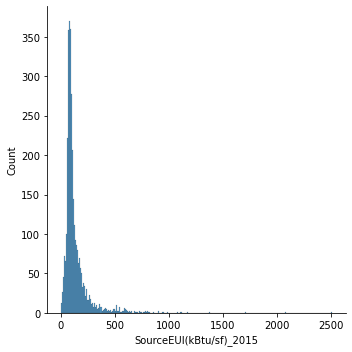

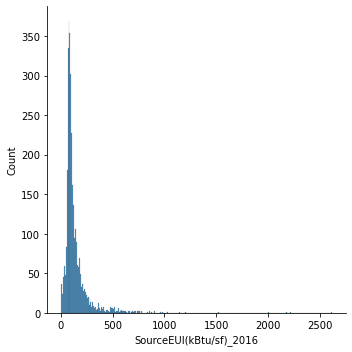

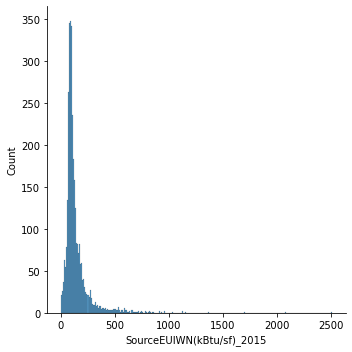

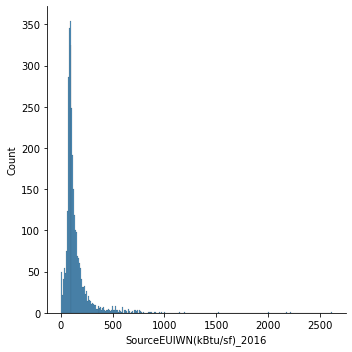

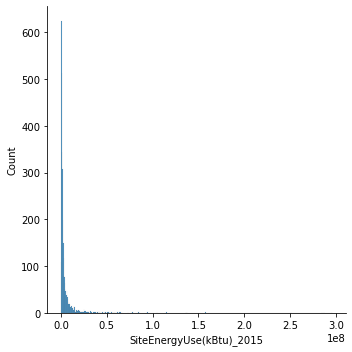

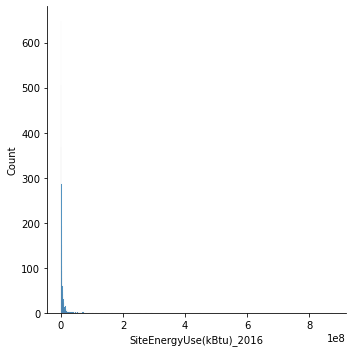

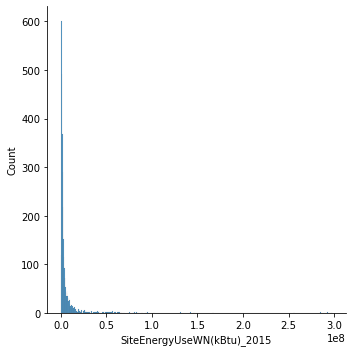

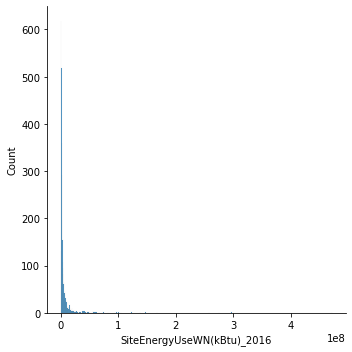

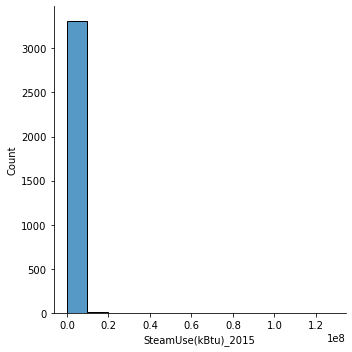

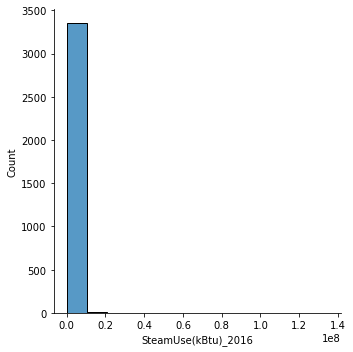

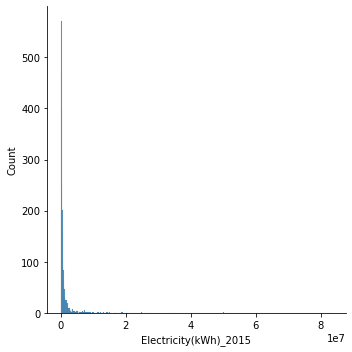

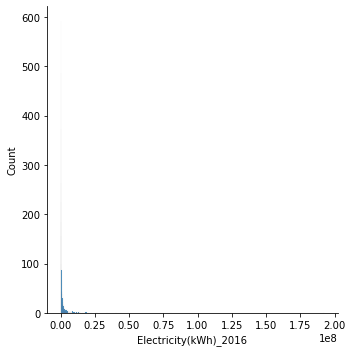

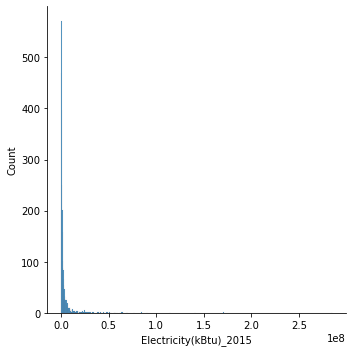

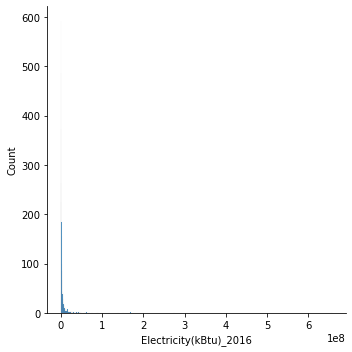

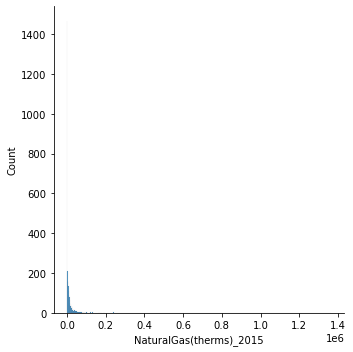

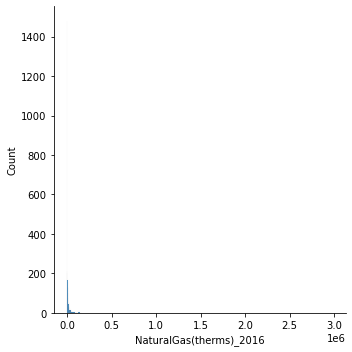

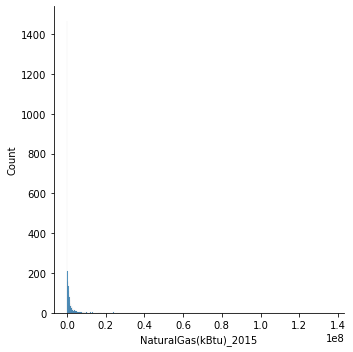

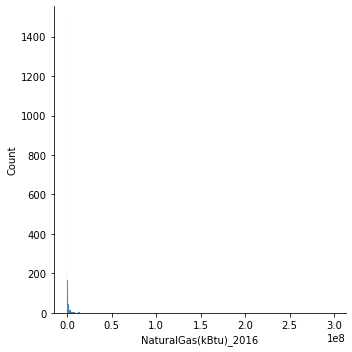

In [392]:
# Ditrsibution des variables des consommations des énérgies
fig = plt.figure(figsize=(26, 92))
for i in range(len(variables_énergies_2015_2016)):
    h = sns.displot(data[variables_énergies_2015_2016[i]])
    ax.set_title(variables_énergies_2015_2016[i], fontsize=11)

<Figure size 1872x6624 with 0 Axes>

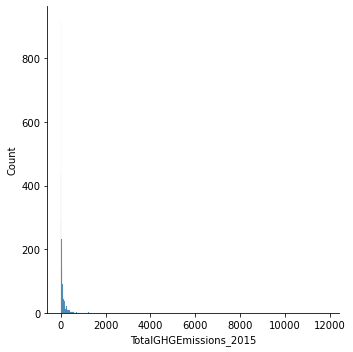

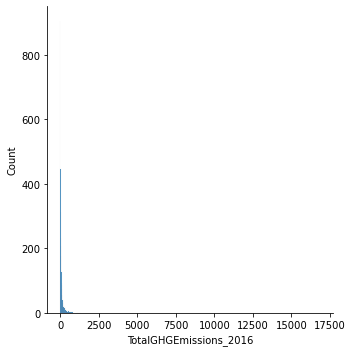

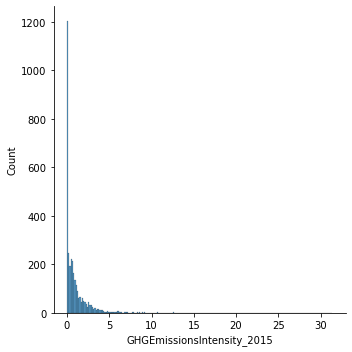

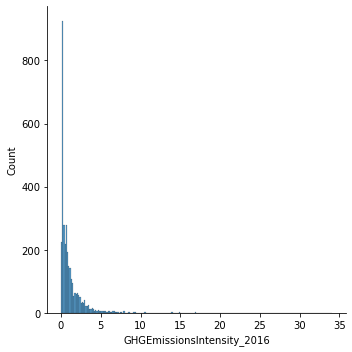

In [393]:
# Ditrsibution des variables des émissions à effet de serre
fig = plt.figure(figsize=(26, 92))
for i in range(len(variables_émissions_ges_2015_2016)):
    h = sns.displot(data[variables_émissions_ges_2015_2016[i]])
    ax.set_title(variables_émissions_ges_2015_2016[i], fontsize=11)

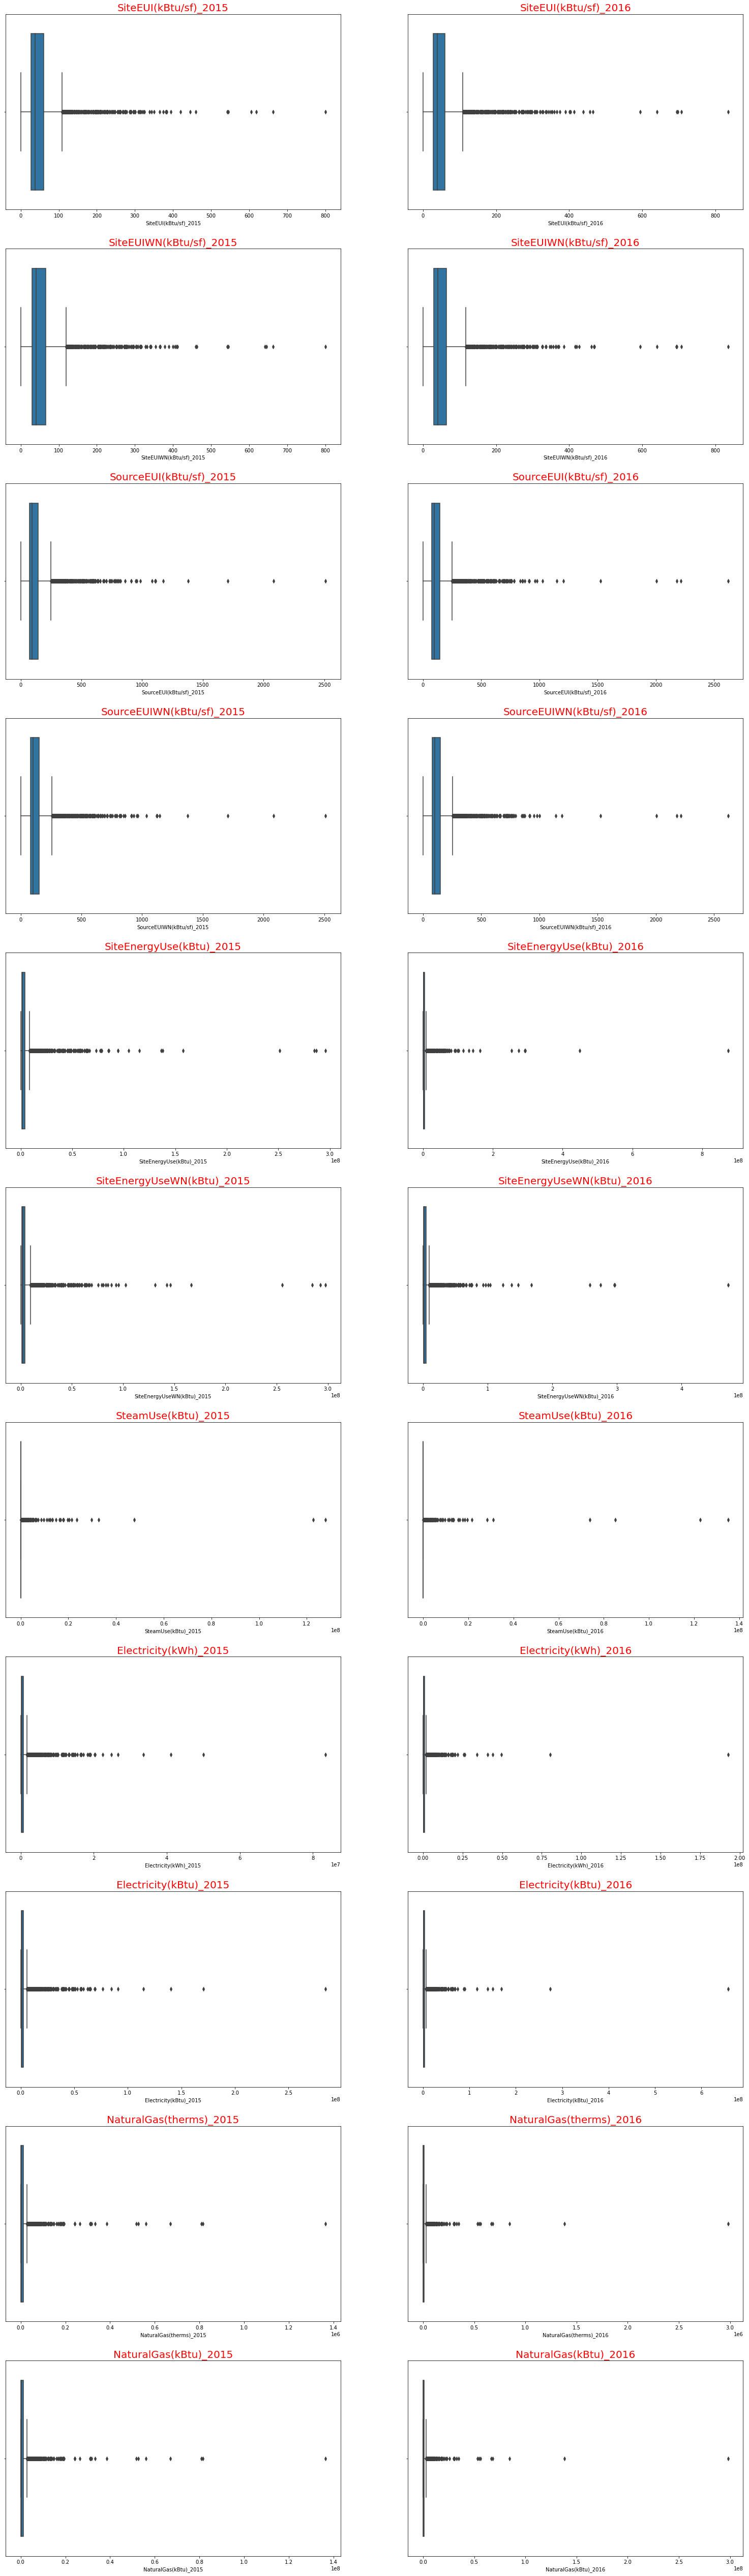

In [394]:
fig = plt.figure(figsize=(26, 92))
for i in range(len(variables_énergies_2015_2016)):
    ax = fig.add_subplot(11,2, (i+1))
    h = sns.boxplot(x=variables_énergies_2015_2016[i], data=data, ax=ax)
    ax.set_title(variables_énergies_2015_2016[i], fontsize=20, c="r")

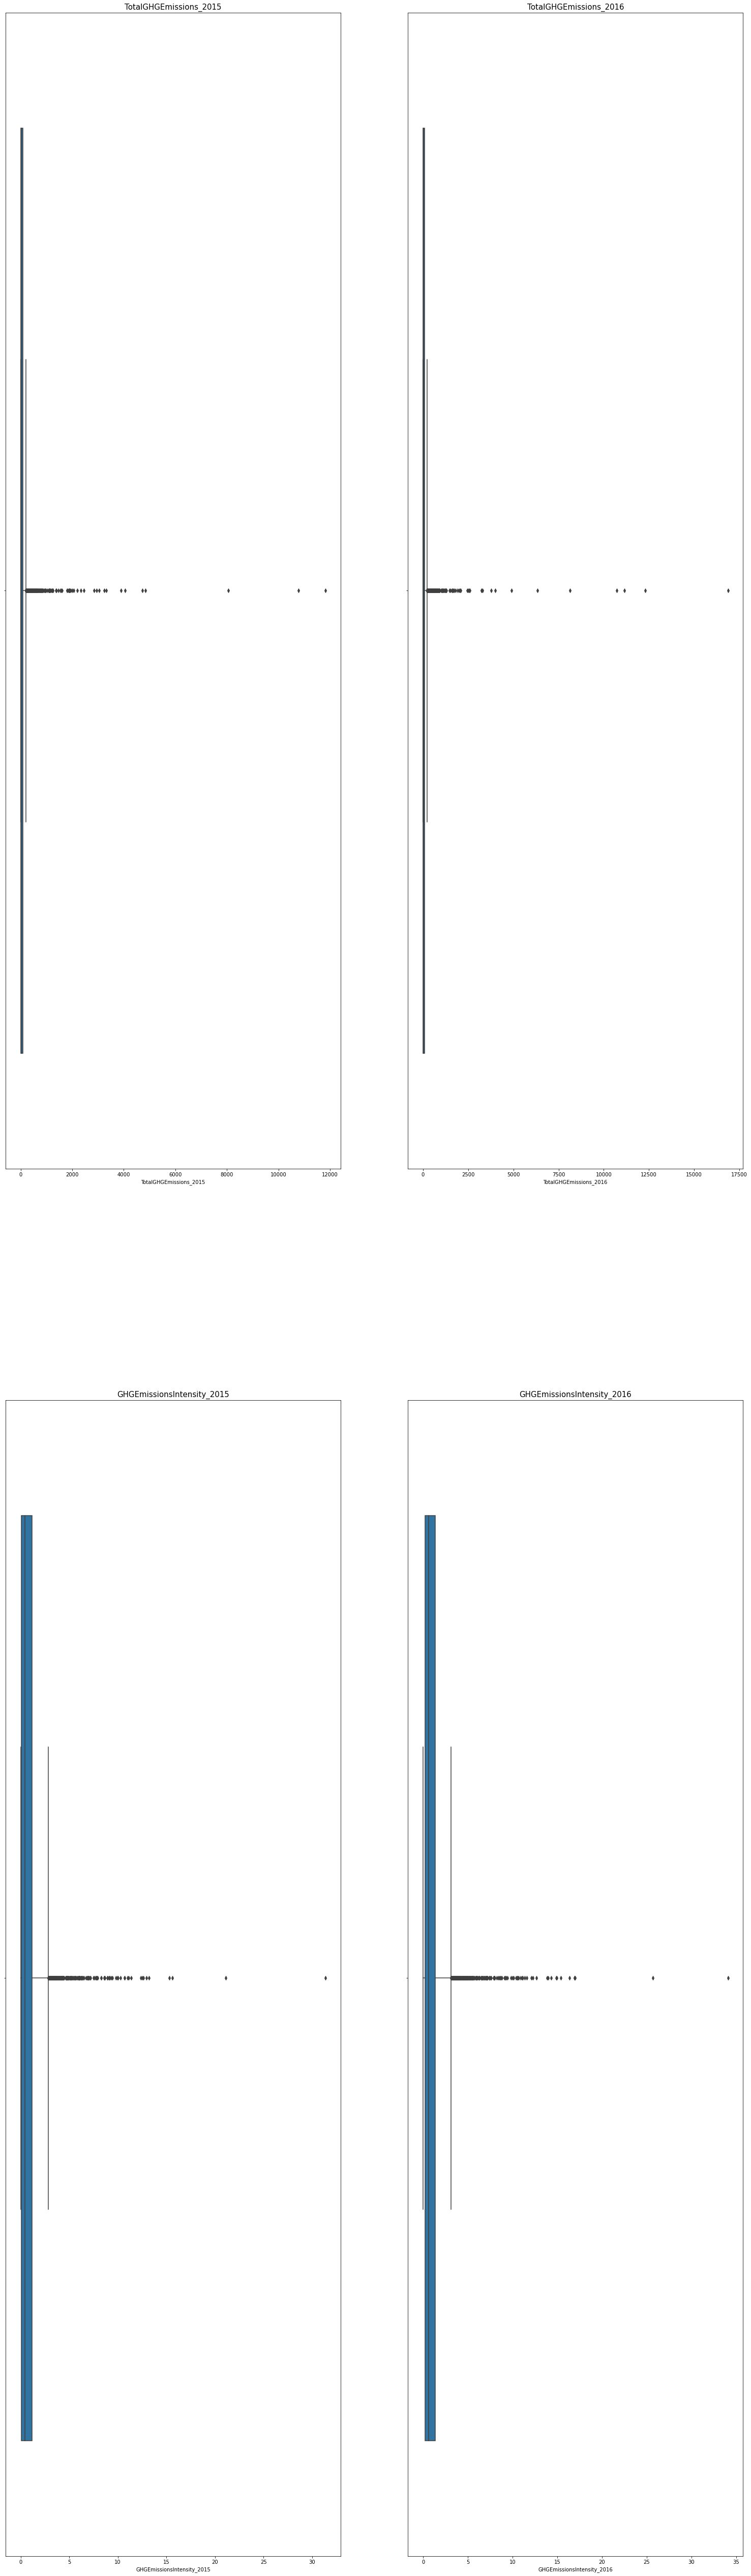

In [395]:
fig = plt.figure(figsize=(26, 92))
for i in range(len(variables_émissions_ges_2015_2016)):
    ax = fig.add_subplot(2,2, (i+1))
    h = sns.boxplot(x=variables_émissions_ges_2015_2016[i], data=data, ax=ax)
    ax.set_title(variables_émissions_ges_2015_2016[i], fontsize=15)

In [396]:
data.loc[:,variables_énergies_2015_2016].describe()

SiteEUI(kBtu/sf)_2015  SiteEUI(kBtu/sf)_2016  SiteEUIWN(kBtu/sf)_2015  \
count            3330.000000            3369.000000              3330.000000   
mean               53.626126              54.733482                57.586547   
std                53.893311              56.272024                55.604963   
min                 0.000000               0.000000                 0.000000   
25%                27.300000              27.900000                29.700000   
50%                37.400000              38.599998                40.900000   
75%                59.875000              60.400002                65.575000   
max               800.600000             834.400024               800.600000   

       SiteEUIWN(kBtu/sf)_2016  SourceEUI(kBtu/sf)_2015  \
count              3370.000000              3330.000000   
mean                 57.035786               132.780330   
std                  57.161636               131.942614   
min                   0.000000                 0.000000   
25%                  29.400000                73.500000   
50%                  40.900002                95.000000   
75%                  64.275002               143.900000   
max                 834.400024              2511.100000   

       SourceEUI(kBtu/sf)_2016  SourceEUIWN(kBtu/sf)_2015  \
count              3367.000000                3330.000000   
mean                134.232254                 138.936637   
std                 139.288122                 131.358481   
min                   0.000000                   0.000000   
25%                  74.699997                  80.300000   
50%                  96.199997                 102.800000   
75%                 143.899994                 151.275000   
max                2620.000000                2511.000000   

       SourceEUIWN(kBtu/sf)_2016  SiteEnergyUse(kBtu)_2015  \
count                3367.000000              3.330000e+03   
mean                  137.784556              4.983106e+06   
std                   139.109184              1.375330e+07   
min                     0.000000              0.000000e+00   
25%                    78.400002              9.139300e+05   
50%                   101.099998              1.776219e+06   
75%                   148.349998              4.044277e+06   
max                  2620.000000              2.958126e+08   

       SiteEnergyUse(kBtu)_2016  ...  SteamUse(kBtu)_2015  \
count              3.371000e+03  ...         3.330000e+03   
mean               5.403732e+06  ...         2.502851e+05   
std                2.161061e+07  ...         3.481900e+06   
min                0.000000e+00  ...         0.000000e+00   
25%                9.251286e+05  ...         0.000000e+00   
50%                1.803753e+06  ...         0.000000e+00   
75%                4.222455e+06  ...         0.000000e+00   
max                8.739237e+08  ...         1.278697e+08   

       SteamUse(kBtu)_2016  Electricity(kWh)_2015  Electricity(kWh)_2016  \
count         3.367000e+03           3.330000e+03           3.367000e+03   
mean          2.745959e+05           1.017897e+06           1.086698e+06   
std           3.912173e+06           2.789931e+06           4.352465e+06   
min           0.000000e+00           0.000000e+00           0.000000e+00   
25%           0.000000e+00           1.864908e+05           1.874229e+05   
50%           0.000000e+00           3.400320e+05           3.451299e+05   
75%           0.000000e+00           8.061935e+05           8.293178e+05   
max           1.349435e+08           8.344505e+07           1.925775e+08   

       Electricity(kBtu)_2015  Electricity(kBtu)_2016  \
count            3.330000e+03            3.367000e+03   
mean             3.473209e+06            3.707814e+06   
std              9.519639e+06            1.485061e+07   
min              0.000000e+00            0.000000e+00   
25%              6.363322e+05            6.394870e+05   
50%              1.160236e+06            1.177583e+06   
75%        

In [397]:
data.loc[:,variables_émissions_ges_2015_2016].describe()

TotalGHGEmissions_2015  TotalGHGEmissions_2016  \
count             3330.000000             3367.000000   
mean               110.094102              119.723971   
std                409.450179              538.832227   
min                  0.000000               -0.800000   
25%                  9.265000                9.495000   
50%                 32.740000               33.920000   
75%                 88.642500               93.940000   
max              11824.890000            16870.980000   

       GHGEmissionsIntensity_2015  GHGEmissionsIntensity_2016  
count                 3330.000000                 3367.000000  
mean                     0.985339                    1.175916  
std                      1.637172                    1.821452  
min                      0.000000                   -0.020000  
25%                      0.080000                    0.210000  
50%                      0.460000                    0.610000  
75%                      1.180000                    1.370000  
max                     31.380000                   34.090000

C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `dis

<Figure size 2592x3744 with 0 Axes>

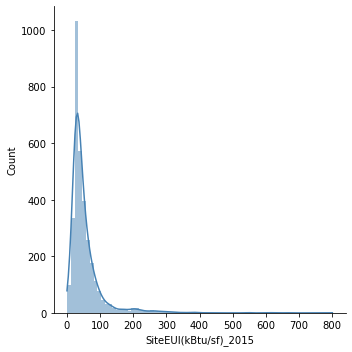

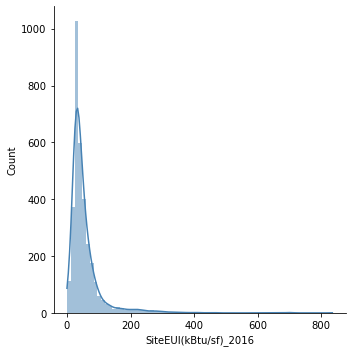

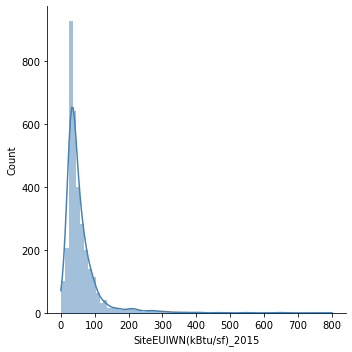

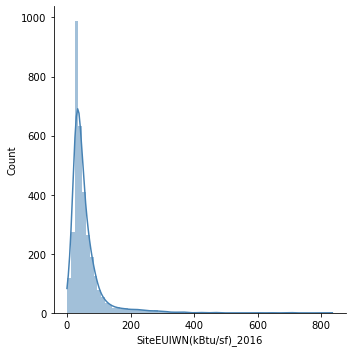

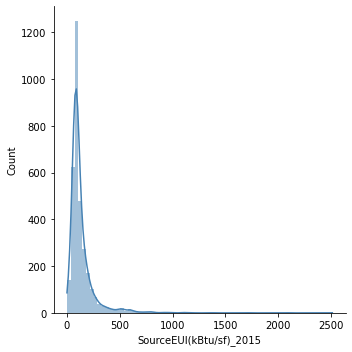

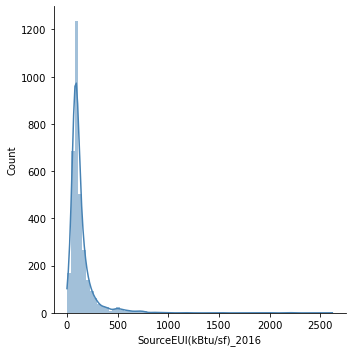

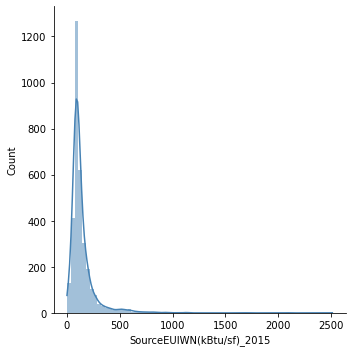

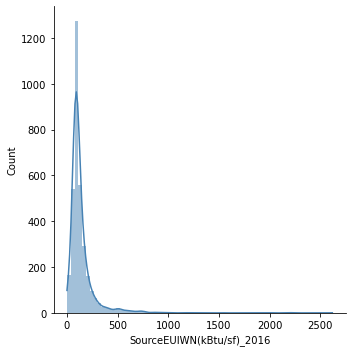

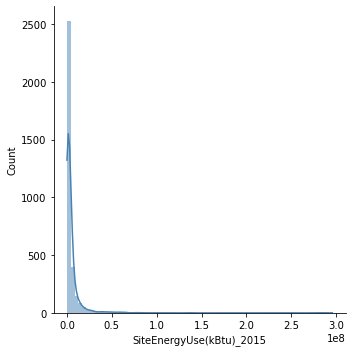

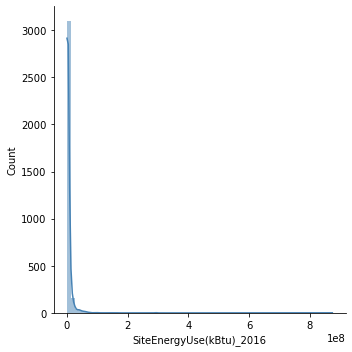

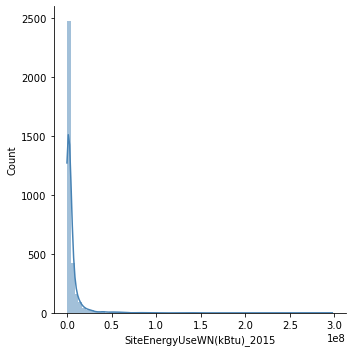

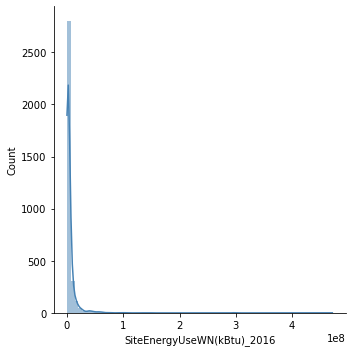

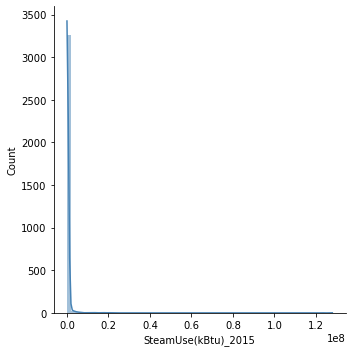

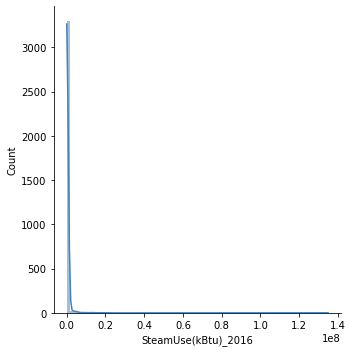

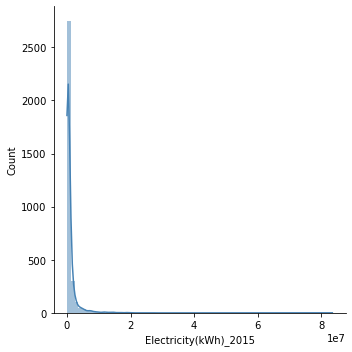

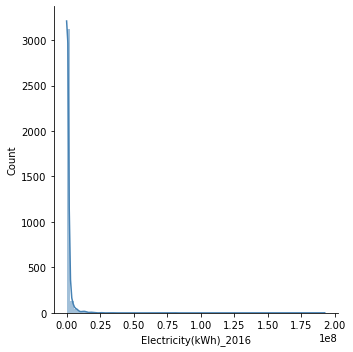

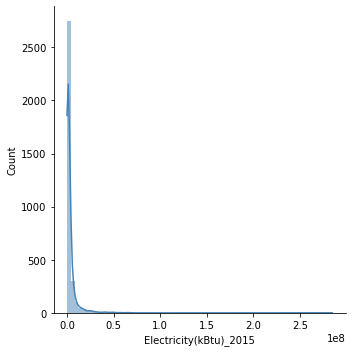

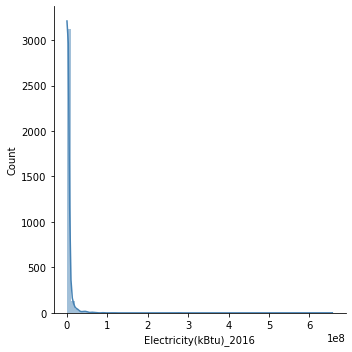

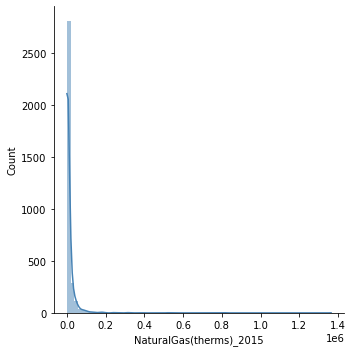

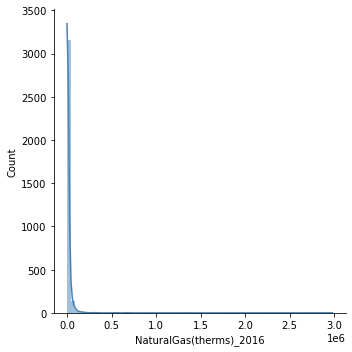

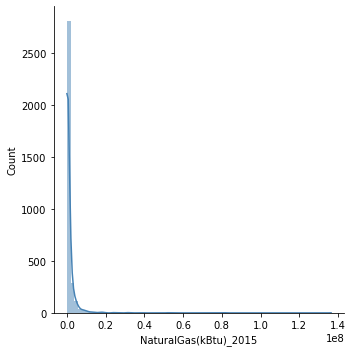

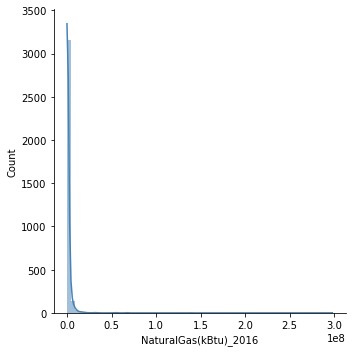

In [398]:
fig = plt.figure(figsize=(36, 52))
for i in range(len(variables_énergies_2015_2016)):
    h = sns.displot(data.loc[:,variables_énergies_2015_2016[i]], color='steelblue', bins=70, kde=True, edgecolor='none', ax=ax)
    ax.set_title(variables_énergies_2015_2016[i], fontsize=15)


C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<Figure size 2592x3744 with 0 Axes>

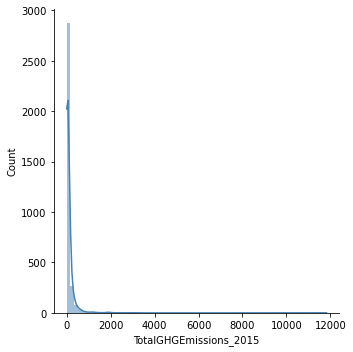

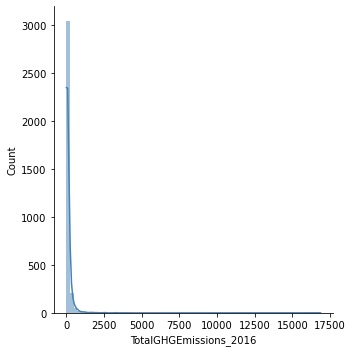

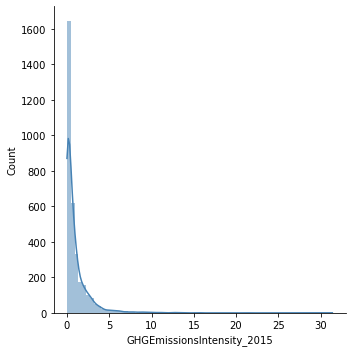

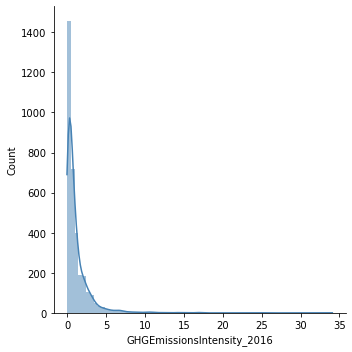

In [399]:
fig = plt.figure(figsize=(36, 52))
for i in range(len(variables_émissions_ges_2015_2016)):
    h = sns.displot(data.loc[:,variables_émissions_ges_2015_2016[i]], color='steelblue', bins=70, kde=True, edgecolor='none', ax=ax)
    ax.set_title(variables_émissions_ges_2015_2016[i], fontsize=15)

## Compraraison des colonnes et traitement des valeurs manquantes

In [400]:
data.columns[:90]

Index(['BuildingType_2015', 'PrimaryPropertyType_2015', 'PropertyName_2015',
       'Neighborhood_2015', 'YearBuilt_2015', 'NumberofBuildings_2015',
       'NumberofFloors_2015', 'PropertyGFATotal_2015',
       'PropertyGFAParking_2015', 'PropertyGFABuilding(s)_2015',
       'ListOfAllPropertyUseTypes_2015', 'LargestPropertyUseType_2015',
       'LargestPropertyUseTypeGFA_2015', 'SecondLargestPropertyUseType_2015',
       'SecondLargestPropertyUseTypeGFA_2015',
       'ThirdLargestPropertyUseType_2015',
       'ThirdLargestPropertyUseTypeGFA_2015', 'ENERGYSTARScore_2015',
       'SiteEUI(kBtu/sf)_2015', 'SiteEUIWN(kBtu/sf)_2015',
       'SourceEUI(kBtu/sf)_2015', 'SourceEUIWN(kBtu/sf)_2015',
       'SiteEnergyUse(kBtu)_2015', 'SiteEnergyUseWN(kBtu)_2015',
       'SteamUse(kBtu)_2015', 'Electricity(kWh)_2015',
       'Electricity(kBtu)_2015', 'NaturalGas(therms)_2015',
       'NaturalGas(kBtu)_2015', 'TotalGHGEmissions_2015',
       'GHGEmissionsIntensity_2015', 'Latitude_2015', 'Longit

In [401]:
# Liste des bâtiments communs aux 2 datasets data_2015 et data_2016:
ident_communs_aux_2_datsets = [elt for elt in data_2016["OSEBuildingID"].values if elt in data_2016["OSEBuildingID"].values]

In [402]:
ident_communs_aux_2_datsets

[1,
 2,
 3,
 5,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 41,
 43,
 46,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 62,
 63,
 65,
 66,
 67,
 68,
 69,
 70,
 73,
 77,
 82,
 84,
 85,
 86,
 87,
 89,
 95,
 96,
 98,
 100,
 102,
 103,
 104,
 106,
 107,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 125,
 127,
 130,
 131,
 132,
 136,
 137,
 138,
 139,
 140,
 144,
 145,
 147,
 148,
 163,
 167,
 168,
 169,
 170,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 185,
 187,
 189,
 338,
 190,
 194,
 195,
 197,
 198,
 200,
 205,
 209,
 211,
 212,
 214,
 215,
 216,
 217,
 220,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 237,
 238,
 239,
 241,
 242,
 243,
 244,
 245,
 247,
 248,
 249,
 250,
 257,
 260,
 261,
 263,
 264,
 265,
 267,
 268,
 273,
 274,
 276,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,

In [403]:
comparaison = np.where( data['PrimaryPropertyType_2015'] == data['PrimaryPropertyType_2016'] , 1, 0)
(comparaison==0).sum()

535

### Comparaison des variables "PrimaryPropertyType_2015" et "PrimaryPropertyType_2016".
#### On a 535 bâtiments pour lesquels, on a des différences au niveau de la première activité du bâtiment.
#### Mais après exploration, on constate que sur les lignes sans données manquantes, l'activité est la même mais c'est juste une différence au niveau de l'intitulé.

In [404]:
data['PrimaryPropertyType_2015'][50222]

nan

In [405]:
for i in (ident_communs_aux_2_datsets):
    if data['PrimaryPropertyType_2015'][i]!=data['PrimaryPropertyType_2016'][i]:
        print(i,(data['PrimaryPropertyType_2015'][i], data['PrimaryPropertyType_2016'][i]))
        

30 ('College/University', 'University')
41 ('Self-Storage Facility\n', 'Self-Storage Facility')
43 (nan, 'Mixed Use Property')
46 ('Distribution Center', 'Warehouse')
55 ('Self-Storage Facility\n', 'Self-Storage Facility')
58 ('Retail Store', 'Other')
170 ('College/University', 'University')
172 ('College/University', 'University')
182 ('College/University', 'University')
183 ('Residence Hall/Dormitory', 'Residence Hall')
209 ('Self-Storage Facility\n', 'Self-Storage Facility')
211 ('College/University', 'University')
215 ('Non-Refrigerated Warehouse', 'Warehouse')
220 ('Non-Refrigerated Warehouse', 'Warehouse')
230 ('Self-Storage Facility\n', 'Self-Storage Facility')
234 ('Non-Refrigerated Warehouse', 'Warehouse')
247 ('Distribution Center\n', 'Distribution Center')
248 ('Non-Refrigerated Warehouse', 'Warehouse')
257 ('Non-Refrigerated Warehouse', 'Warehouse')
260 ('SPS-District K-12', 'K-12 School')
274 ('Non-Refrigerated Warehouse', 'Warehouse')
294 ('Residence Hall/Dormitory', 'Res

In [406]:
# On garde la colonne 2016 qui a moins de valeurs manquantes
for i in ident_communs_aux_2_datsets:
    data.loc[i:,"PrimaryPropertyType"] = data.loc[i:,"PrimaryPropertyType_2016"]


## Comparaison des variables "PropertyName_2015" et "PropertyName_2016".
#### On a 3310 bâtiments pour lesquels, on a des différences au niveau du nom de  l'exploitant du bâtiment.
#### Mais après exploration, on constate que sur les lignes sans données manquantes, l'exploitant est le même mais c'est juste une différence au niveau de l'intitulé.

In [407]:
comparaison = np.where( data['PropertyName_2015'] == data['PropertyName_2016'] , 1, 0)
(comparaison==0).sum()

3310

In [408]:
for i in (ident_communs_aux_2_datsets):
    if data['PropertyName_2015'][i]!=data['PropertyName_2016'][i]:
        print(i,(data['PropertyName_2015'][i], data['PropertyName_2016'][i]))

1 ('MAYFLOWER PARK HOTEL', 'Mayflower park hotel')
2 ('PARAMOUNT HOTEL', 'Paramount Hotel')
3 ('WESTIN HOTEL', '5673-The Westin Seattle')
8 ('WARWICK SEATTLE HOTEL', 'WARWICK SEATTLE HOTEL (ID8)')
9 ('WEST PRECINCT (SEATTLE POLICE)', 'West Precinct')
10 ('CAMLIN WORLDMARK HOTEL', 'Camlin')
11 ('PARAMOUNT THEATER', 'Paramount Theatre')
12 ('COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE', '311wh-Pioneer Square')
13 ('LYON BUILDING', 'Lyon Building')
15 ('HOTEL MONACO', 'Hotel Monaco Seattle')
16 ('W SEATTLE HOTEL', '5679-W Seattle')
17 ('EXECUTIVE PACIFIC PLAZA', 'Executive Pacific Plaza')
18 ('CROWNE PLAZA', 'Crowne Plaza Hotel Seattle')
19 ('HOTEL VINTAGE PARK', 'Hotel Vintage Seattle')
21 ('SEATTLE CENTRAL LIBRARY', 'The Seattle Public Library - Central Library')
22 ('DOWNTOWN SEATTLE YMCA', 'Downtown Seattle YMCA')
23 ('RENAISSANCE MADISON HOTEL', 'Renaissance Seattle Hotel')
24 ('RAINIER CLUB (HISTORICAL LANDMARK)', 'The Rainier Club')
25 ('DOUBLE TREE ARCTIC CLUB HOTEL - SEATTLE', 'A

In [409]:
# On garde la colonne 2016 qui a moins de valeurs manquantes
for i in ident_communs_aux_2_datsets:
    data.loc[i:,"PropertyName"] = data.loc[i:,"PropertyName_2016"]

In [410]:
compa = np.where( data['NumberofBuildings_2015'] == data['NumberofBuildings_2016'] , 1, 0)
(compa==0).sum()

340

In [411]:
for i in (ident_communs_aux_2_datsets):
    if data['NumberofBuildings_2015'][i]!=data['NumberofBuildings_2016'][i]:
        print(i,(data['NumberofBuildings_2015'][i], data['NumberofBuildings_2016'][i]))

43 (nan, 1.0)
46 (7.0, 3.0)
89 (1.0, 0.0)
113 (1.0, 0.0)
117 (1.0, 2.0)
147 (1.0, 4.0)
172 (1.0, 27.0)
187 (1.0, 3.0)
198 (1.0, 6.0)
257 (1.0, 0.0)
261 (16.0, 14.0)
268 (1.0, 6.0)
276 (1.0, 9.0)
322 (1.0, 0.0)
364 (nan, 1.0)
365 (nan, 1.0)
366 (1.0, 0.0)
391 (1.0, 0.0)
408 (1.0, 0.0)
410 (1.0, 0.0)
421 (1.0, 0.0)
432 (1.0, 3.0)
456 (1.0, 2.0)
477 (3.0, 1.0)
496 (1.0, 2.0)
504 (1.0, 0.0)
516 (1.0, 6.0)
517 (1.0, 0.0)
576 (1.0, 0.0)
588 (1.0, 0.0)
594 (1.0, 0.0)
608 (1.0, 5.0)
624 (1.0, 2.0)
640 (1.0, 0.0)
649 (1.0, 0.0)
657 (1.0, 0.0)
673 (1.0, 0.0)
683 (1.0, 3.0)
689 (1.0, 3.0)
731 (1.0, 3.0)
735 (1.0, 0.0)
750 (nan, 1.0)
773 (1.0, nan)
812 (1.0, 0.0)
828 (1.0, 7.0)
829 (1.0, 3.0)
851 (1.0, 2.0)
19456 (nan, 5.0)
19491 (1.0, 3.0)
19533 (1.0, 0.0)
19741 (1.0, 0.0)
19798 (1.0, nan)
19835 (1.0, 0.0)
19900 (1.0, 0.0)
19969 (1.0, 0.0)
20066 (1.0, 2.0)
20095 (1.0, 4.0)
20140 (1.0, 4.0)
20186 (1.0, 0.0)
20323 (1.0, 0.0)
20325 (1.0, 5.0)
20340 (1.0, 4.0)
20350 (1.0, 2.0)
20403 (1.0, 0.0)
20427 

In [412]:
# On garde la colonne 2016 qui a moins de valeurs manquantes
for i in (ident_communs_aux_2_datsets):
    data.loc[i:,"NumberofBuildings"] = data.loc[i:,"NumberofBuildings_2016"]

In [413]:
for i in (ident_communs_aux_2_datsets):
    if data.loc[i:,"NumberofBuildings"].isnull()[i]==True:
        data.loc[i:,"NumberofBuildings"] = data.loc[i:,"NumberofBuildings_2015"]

In [414]:
data.loc[:,["PrimaryPropertyType_2015", "PrimaryPropertyType_2016"]]

PrimaryPropertyType_2015 PrimaryPropertyType_2016
OSEBuildingID                                                  
1                                Hotel                    Hotel
2                                Hotel                    Hotel
3                                Hotel                    Hotel
5                                Hotel                    Hotel
8                                Hotel                    Hotel
...                                ...                      ...
50222                              NaN                   Office
50223                              NaN                    Other
50224                              NaN                    Other
50225                              NaN       Mixed Use Property
50226                              NaN       Mixed Use Property

[3432 rows x 2 columns]

#### Pour les autres variables liées aux caractéristiques des batiments le raisonnement est le même

In [415]:
variables_caractéristiques_batiment_2016 = [ 'BuildingType_2016', 'PrimaryPropertyType_2016',
       'PropertyName_2016', 'Neighborhood_2016', 'YearBuilt_2016',
       'NumberofBuildings_2016','NumberofFloors_2016', 'PropertyGFATotal_2016', 'PropertyGFAParking_2016',
       'PropertyGFABuilding(s)_2016', 'ListOfAllPropertyUseTypes_2016','LargestPropertyUseType_2016',
       'LargestPropertyUseTypeGFA_2016','SecondLargestPropertyUseType_2016','SecondLargestPropertyUseTypeGFA_2016',
       'ThirdLargestPropertyUseType_2016','ThirdLargestPropertyUseTypeGFA_2016','ENERGYSTARScore_2016','Latitude_2016',
       'Longitude_2016', 'Address_2016', 'ZipCode_2016']

In [416]:
variables_caractéristiques_batiment = ['BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors','PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes','LargestPropertyUseType',
       'LargestPropertyUseTypeGFA','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','ENERGYSTARScore', 'Latitude',
       'Longitude', 'Address', 'ZipCode']

#### Pour les bâtiments communs aux 2 datasets, on conserve les données de 2016 sur les caractéristques du batiments hors consommations d'énergies et émmissions de CO2. Il n'y a pas de changements à ce niveau

In [417]:
for i in ident_communs_aux_2_datsets:
    for j in range(len(variables_caractéristiques_batiment)):
        data.loc[i,variables_caractéristiques_batiment[j]] = data.loc[i,variables_caractéristiques_batiment_2016[j]]

In [418]:
# liste des variables de consommations en énérgies pour les 2 années:
variables_énergies_2015_2016  

['SiteEUI(kBtu/sf)_2015',
 'SiteEUI(kBtu/sf)_2016',
 'SiteEUIWN(kBtu/sf)_2015',
 'SiteEUIWN(kBtu/sf)_2016',
 'SourceEUI(kBtu/sf)_2015',
 'SourceEUI(kBtu/sf)_2016',
 'SourceEUIWN(kBtu/sf)_2015',
 'SourceEUIWN(kBtu/sf)_2016',
 'SiteEnergyUse(kBtu)_2015',
 'SiteEnergyUse(kBtu)_2016',
 'SiteEnergyUseWN(kBtu)_2015',
 'SiteEnergyUseWN(kBtu)_2016',
 'SteamUse(kBtu)_2015',
 'SteamUse(kBtu)_2016',
 'Electricity(kWh)_2015',
 'Electricity(kWh)_2016',
 'Electricity(kBtu)_2015',
 'Electricity(kBtu)_2016',
 'NaturalGas(therms)_2015',
 'NaturalGas(therms)_2016',
 'NaturalGas(kBtu)_2015',
 'NaturalGas(kBtu)_2016']

In [419]:
# liste des variables de consommations en énéergies 
variables_énergies = ["SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)",
                                  "SourceEUI(kBtu/sf)", "SourceEUIWN(kBtu/sf)",
                                  "SiteEnergyUse(kBtu)", "SiteEnergyUseWN(kBtu)",
                                  "SteamUse(kBtu)", "Electricity(kWh)",
                                  "Electricity(kBtu)", "NaturalGas(therms)",
                                  "NaturalGas(kBtu)"]

In [420]:
# liste des variables des émissions des gaz à effet de serre pour les 2 années:
variables_émissions_ges_2015_2016

['TotalGHGEmissions_2015',
 'TotalGHGEmissions_2016',
 'GHGEmissionsIntensity_2015',
 'GHGEmissionsIntensity_2016']

In [421]:
# liste des variables des émissions des gaz à effet de serre:
variables_émissions_ges

['OSEBuildingID', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [422]:
variables_émissions_ges[1:]

['TotalGHGEmissions', 'GHGEmissionsIntensity']

In [423]:
data.loc[:,['SiteEUIWN(kBtu/sf)_2015','SiteEUIWN(kBtu/sf)_2016']]

SiteEUIWN(kBtu/sf)_2015  SiteEUIWN(kBtu/sf)_2016
OSEBuildingID                                                  
1                                 80.3                84.300003
2                                 99.0                97.900002
3                                 99.7                97.699997
5                                462.5               113.300003
8                                122.1               118.699997
...                                ...                      ...
50222                              NaN                76.699997
50223                              NaN                65.900002
50224                              NaN               460.100006
50225                              NaN                55.500000
50226                              NaN                70.900002

[3432 rows x 2 columns]

In [424]:
data.loc[:,'SiteEUIWN(kBtu/sf)_2015'] - data.loc[:,'SiteEUIWN(kBtu/sf)_2016']

OSEBuildingID
1         -4.000003
2          1.099998
3          2.000003
5        349.199997
8          3.400003
            ...    
50222           NaN
50223           NaN
50224           NaN
50225           NaN
50226           NaN
Length: 3432, dtype: float64

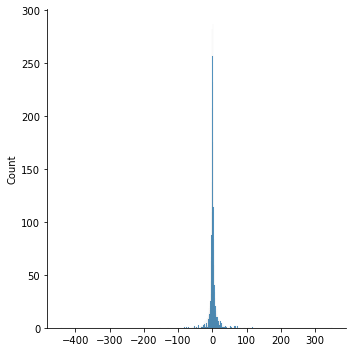

In [425]:
sns.displot(data.loc[:,'SiteEUIWN(kBtu/sf)_2015'].values - data.loc[:,'SiteEUIWN(kBtu/sf)_2016'].values)

<Figure size 432x2304 with 0 Axes>

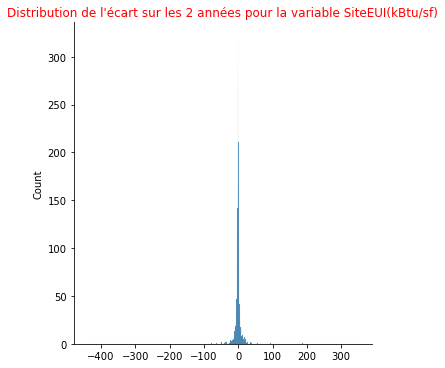

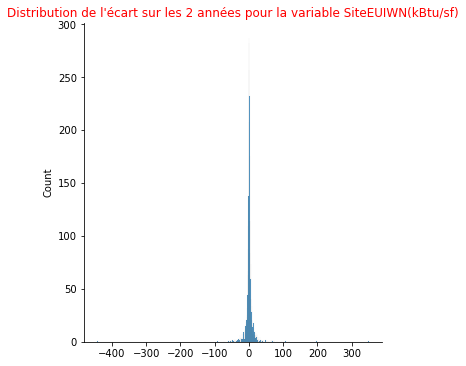

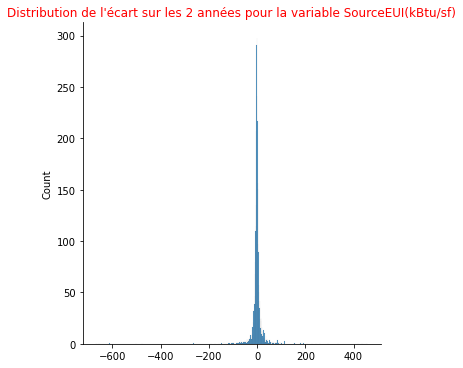

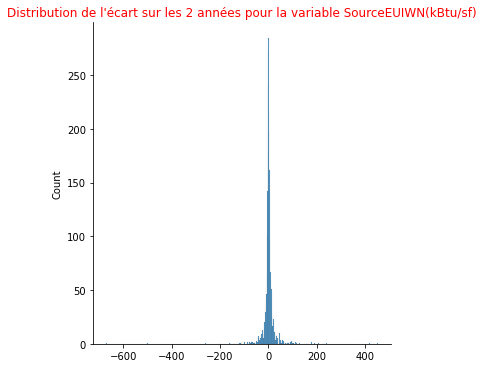

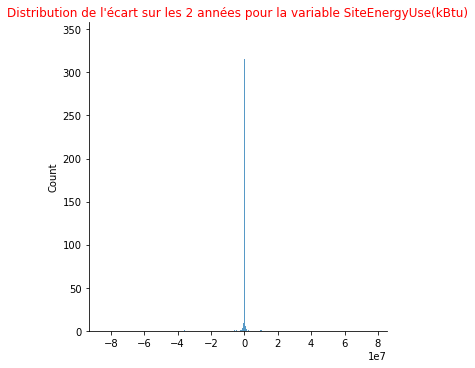

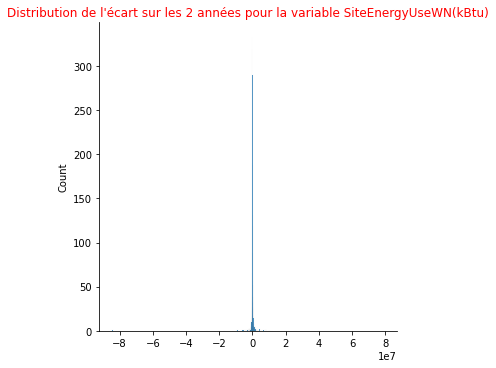

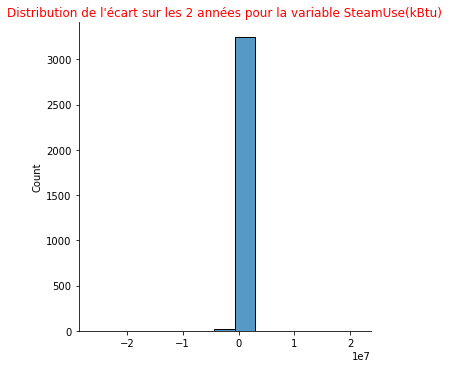

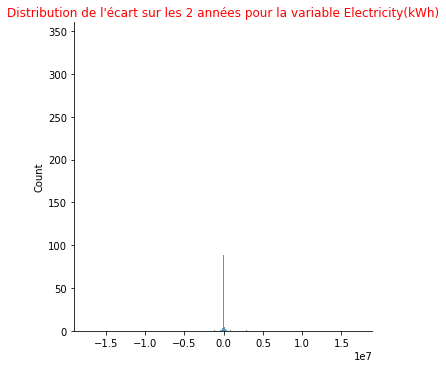

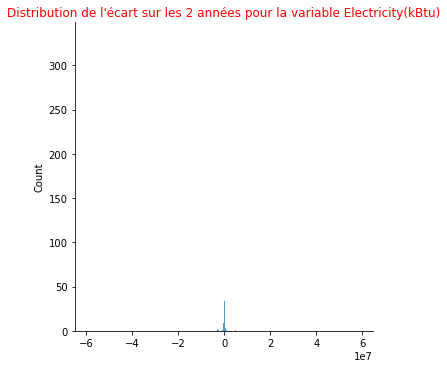

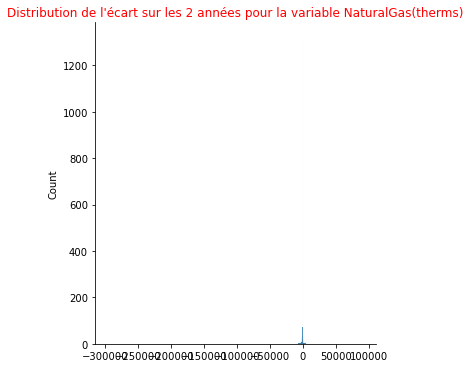

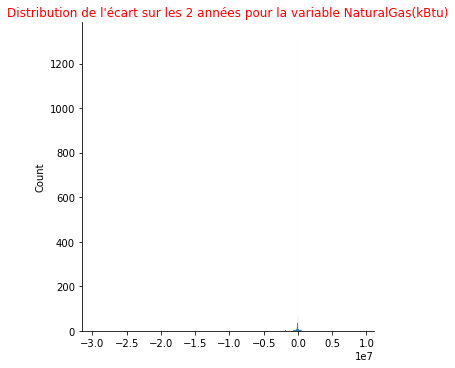

In [426]:
# Distributions de la différence des consommations de chaque énérgie entre les 2 années.
# On a des distributions centrées et regroupées sur 0.
fig = plt.figure(figsize=(6, 32))
for i in range(len(variables_énergies)):
    sns.displot(data.loc[:,variables_énergies_2015_2016[i*2]] - data.loc[:,variables_énergies_2015_2016[i*2+1]])
    plt.title("Distribution de l'écart sur les 2 années pour la variable {}".format(variables_énergies[i]), c="r")
    

<Figure size 432x3744 with 0 Axes>

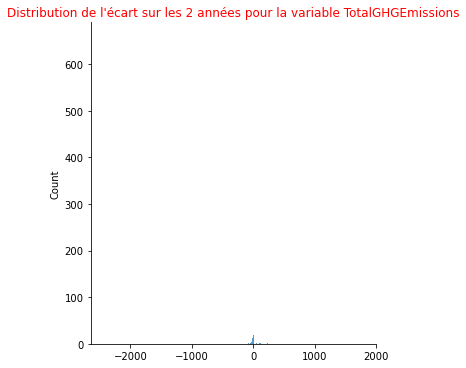

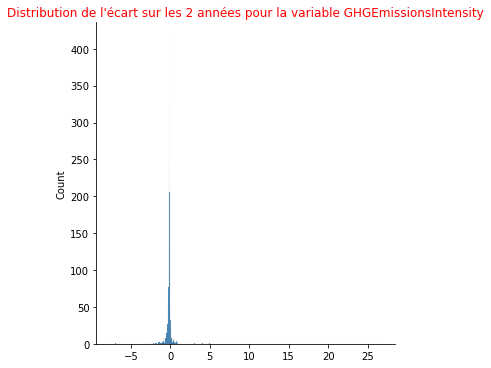

In [432]:
# Distributions de la différence des émissions des gaz à effet de serre entre les 2 années.
# On a des distributions centrées et regroupées sur 0.
fig = plt.figure(figsize=(6, 52))
for i in range(len(variables_émissions_ges[1:])):
    sns.displot(data.loc[:,variables_émissions_ges_2015_2016[i*2]] - data.loc[:,variables_émissions_ges_2015_2016[i*2+1]])
    plt.title("Distribution de l'écart sur les 2 années pour la variable {}".format(variables_émissions_ges[1:][i]), c="r")
    

In [433]:
data.loc[:,['SiteEUIWN(kBtu/sf)_2015','SiteEUIWN(kBtu/sf)_2016']].mean(1)

OSEBuildingID
1         82.300002
2         98.450001
3         98.699998
5        287.900002
8        120.399998
            ...    
50222     76.699997
50223     65.900002
50224    460.100006
50225     55.500000
50226     70.900002
Length: 3432, dtype: float64

In [434]:
variables_énergies_2015_2016[1]

'SiteEUI(kBtu/sf)_2016'

In [435]:
variables_énergies_2015_2016[0]

'SiteEUI(kBtu/sf)_2015'

In [436]:
data.loc[:,[variables_énergies_2015_2016[0],variables_énergies_2015_2016[1]]]

SiteEUI(kBtu/sf)_2015  SiteEUI(kBtu/sf)_2016
OSEBuildingID                                              
1                               78.9              81.699997
2                               94.4              94.800003
3                               96.6              96.000000
5                              460.4             110.800003
8                              120.1             114.800003
...                              ...                    ...
50222                            NaN              69.099998
50223                            NaN              59.400002
50224                            NaN             438.200012
50225                            NaN              51.000000
50226                            NaN              63.099998

[3432 rows x 2 columns]

In [437]:
data.loc[:,[variables_énergies_2015_2016[0],variables_énergies_2015_2016[1]]].mean(1)

OSEBuildingID
1         80.299998
2         94.600002
3         96.300000
5        285.600002
8        117.450002
            ...    
50222     69.099998
50223     59.400002
50224    438.200012
50225     51.000000
50226     63.099998
Length: 3432, dtype: float64

In [438]:
variables_énergies

['SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)']

In [439]:
variables_énergies_2015_2016

['SiteEUI(kBtu/sf)_2015',
 'SiteEUI(kBtu/sf)_2016',
 'SiteEUIWN(kBtu/sf)_2015',
 'SiteEUIWN(kBtu/sf)_2016',
 'SourceEUI(kBtu/sf)_2015',
 'SourceEUI(kBtu/sf)_2016',
 'SourceEUIWN(kBtu/sf)_2015',
 'SourceEUIWN(kBtu/sf)_2016',
 'SiteEnergyUse(kBtu)_2015',
 'SiteEnergyUse(kBtu)_2016',
 'SiteEnergyUseWN(kBtu)_2015',
 'SiteEnergyUseWN(kBtu)_2016',
 'SteamUse(kBtu)_2015',
 'SteamUse(kBtu)_2016',
 'Electricity(kWh)_2015',
 'Electricity(kWh)_2016',
 'Electricity(kBtu)_2015',
 'Electricity(kBtu)_2016',
 'NaturalGas(therms)_2015',
 'NaturalGas(therms)_2016',
 'NaturalGas(kBtu)_2015',
 'NaturalGas(kBtu)_2016']

### Pour les variables de consommation des énergies, on garde la moyenne des variables pour chaque bâtiment

In [440]:
for i in range (len(variables_énergies)):
    for j in ident_communs_aux_2_datsets:
         data.loc[j:,variables_énergies[i]]=data.loc[j:,[variables_énergies_2015_2016[i*2],variables_énergies_2015_2016[i*2+1]]].mean(1)
        

In [441]:
variables_émissions_ges[1:]

['TotalGHGEmissions', 'GHGEmissionsIntensity']

In [442]:
variables_émissions_ges_2015_2016

['TotalGHGEmissions_2015',
 'TotalGHGEmissions_2016',
 'GHGEmissionsIntensity_2015',
 'GHGEmissionsIntensity_2016']

### Pour les variables de l'émission des gaz à effet de serre, on garde la moyenne des variables pour chaque bâtiment

In [443]:
for i in range (len(variables_émissions_ges[1:])):
    for j in ident_communs_aux_2_datsets:
        data.loc[j:,variables_émissions_ges[1:][i]]=data.loc[j:,[variables_émissions_ges_2015_2016[i*2],variables_émissions_ges_2015_2016[i*2+1]]].mean(1)

### Pour la variable ENERGYSTARScore_2015 , on garde la moyenne des variables pour chaque bâtiment

In [444]:
for j in ident_communs_aux_2_datsets:
        data.loc[j:,"ENERGYSTARScore"]=data.loc[j:,["ENERGYSTARScore_2015","ENERGYSTARScore_2016"]].mean(1)

In [445]:
data

BuildingType_2015 PrimaryPropertyType_2015  \
OSEBuildingID                                              
1                NonResidential                    Hotel   
2                NonResidential                    Hotel   
3                NonResidential                    Hotel   
5                NonResidential                    Hotel   
8                NonResidential                    Hotel   
...                         ...                      ...   
50222                       NaN                      NaN   
50223                       NaN                      NaN   
50224                       NaN                      NaN   
50225                       NaN                      NaN   
50226                       NaN                      NaN   

                   PropertyName_2015 Neighborhood_2015  YearBuilt_2015  \
OSEBuildingID                                                            
1               MAYFLOWER PARK HOTEL          DOWNTOWN          1927.0   
2                    PARAMOUNT HOTEL          DOWNTOWN          1996.0   
3                       WESTIN HOTEL          DOWNTOWN          1969.0   
5                          HOTEL MAX          DOWNTOWN          1926.0   
8              WARWICK SEATTLE HOTEL          DOWNTOWN          1980.0   
...                              ...               ...             ...   
50222                            NaN               NaN             NaN   
50223                            NaN               NaN             NaN   
50224                            NaN               NaN             NaN   
50225                            NaN               NaN             NaN   
50226                            NaN               NaN             NaN   

               NumberofBuildings_2015  NumberofFloors_2015  \
OSEBuildingID                                                
1                                 1.0                 12.0   
2                                 1.0                 11.0   
3                                 1.0                 41.0   
5                                 1.0                 10.0   
8                                 1.0                 18.0   
...                               ...                  ...   
50222                             NaN                  NaN   
50223                             NaN                  NaN   
50224                             NaN                  NaN   
50225                             NaN                  NaN   
50226                             NaN                  NaN   

               PropertyGFATotal_2015  PropertyGFAParking_2015  \
OSEBuildingID                                                   
1                            88434.0                      0.0   
2                           103566.0                  15064.0   
3                           961990.0                      0.0   
5                            61320.0                      0.0   
8                           119890.0                  12460.0   
...                              ...                      ...   
50222                            NaN                      NaN   
50223                            NaN                      NaN   
50224                            NaN                      NaN   
50225                            NaN                      NaN   
50226                            NaN                      NaN   

               PropertyGFABuilding(s)_2015  ... Electricity(kWh)  \
OSEBuildingID                               ...                    
1                                  88434.0  ...     1.118411e+06   
2                                  88502.0  ...     1.047494e+06   
3                                 961990.0  ...     1.454968e+07   
5                                  61320.0  ...     8.115232e+05   
8                                 107430.0  ...     1.675645e+06   
...                                    ...  ...              ...   
50222                                  NaN  ...     1.536550e+05   
50223

In [446]:
data.columns[:100]

Index(['BuildingType_2015', 'PrimaryPropertyType_2015', 'PropertyName_2015',
       'Neighborhood_2015', 'YearBuilt_2015', 'NumberofBuildings_2015',
       'NumberofFloors_2015', 'PropertyGFATotal_2015',
       'PropertyGFAParking_2015', 'PropertyGFABuilding(s)_2015',
       'ListOfAllPropertyUseTypes_2015', 'LargestPropertyUseType_2015',
       'LargestPropertyUseTypeGFA_2015', 'SecondLargestPropertyUseType_2015',
       'SecondLargestPropertyUseTypeGFA_2015',
       'ThirdLargestPropertyUseType_2015',
       'ThirdLargestPropertyUseTypeGFA_2015', 'ENERGYSTARScore_2015',
       'SiteEUI(kBtu/sf)_2015', 'SiteEUIWN(kBtu/sf)_2015',
       'SourceEUI(kBtu/sf)_2015', 'SourceEUIWN(kBtu/sf)_2015',
       'SiteEnergyUse(kBtu)_2015', 'SiteEnergyUseWN(kBtu)_2015',
       'SteamUse(kBtu)_2015', 'Electricity(kWh)_2015',
       'Electricity(kBtu)_2015', 'NaturalGas(therms)_2015',
       'NaturalGas(kBtu)_2015', 'TotalGHGEmissions_2015',
       'GHGEmissionsIntensity_2015', 'Latitude_2015', 'Longit

#### Maintenant que nous avons fait des variables qui synthétisent les variables pour les 2 années, nous pouvons supprimer les variables des 2 années

In [447]:
variables_des_2années = data.columns[:70]

In [448]:
variables_des_2années

Index(['BuildingType_2015', 'PrimaryPropertyType_2015', 'PropertyName_2015',
       'Neighborhood_2015', 'YearBuilt_2015', 'NumberofBuildings_2015',
       'NumberofFloors_2015', 'PropertyGFATotal_2015',
       'PropertyGFAParking_2015', 'PropertyGFABuilding(s)_2015',
       'ListOfAllPropertyUseTypes_2015', 'LargestPropertyUseType_2015',
       'LargestPropertyUseTypeGFA_2015', 'SecondLargestPropertyUseType_2015',
       'SecondLargestPropertyUseTypeGFA_2015',
       'ThirdLargestPropertyUseType_2015',
       'ThirdLargestPropertyUseTypeGFA_2015', 'ENERGYSTARScore_2015',
       'SiteEUI(kBtu/sf)_2015', 'SiteEUIWN(kBtu/sf)_2015',
       'SourceEUI(kBtu/sf)_2015', 'SourceEUIWN(kBtu/sf)_2015',
       'SiteEnergyUse(kBtu)_2015', 'SiteEnergyUseWN(kBtu)_2015',
       'SteamUse(kBtu)_2015', 'Electricity(kWh)_2015',
       'Electricity(kBtu)_2015', 'NaturalGas(therms)_2015',
       'NaturalGas(kBtu)_2015', 'TotalGHGEmissions_2015',
       'GHGEmissionsIntensity_2015', 'Latitude_2015', 'Longit

In [449]:
len(variables_des_2années)

70

In [450]:
data = data.drop(variables_des_2années, axis=1)

In [451]:
data.loc[:,'SiteEUIWN(kBtu/sf)']

OSEBuildingID
1         82.300002
2         98.450001
3         98.699998
5        287.900002
8        120.399998
            ...    
50222     76.699997
50223     65.900002
50224    460.100006
50225     55.500000
50226     70.900002
Name: SiteEUIWN(kBtu/sf), Length: 3432, dtype: float64

In [452]:
data.shape

(3432, 35)

<AxesSubplot:>

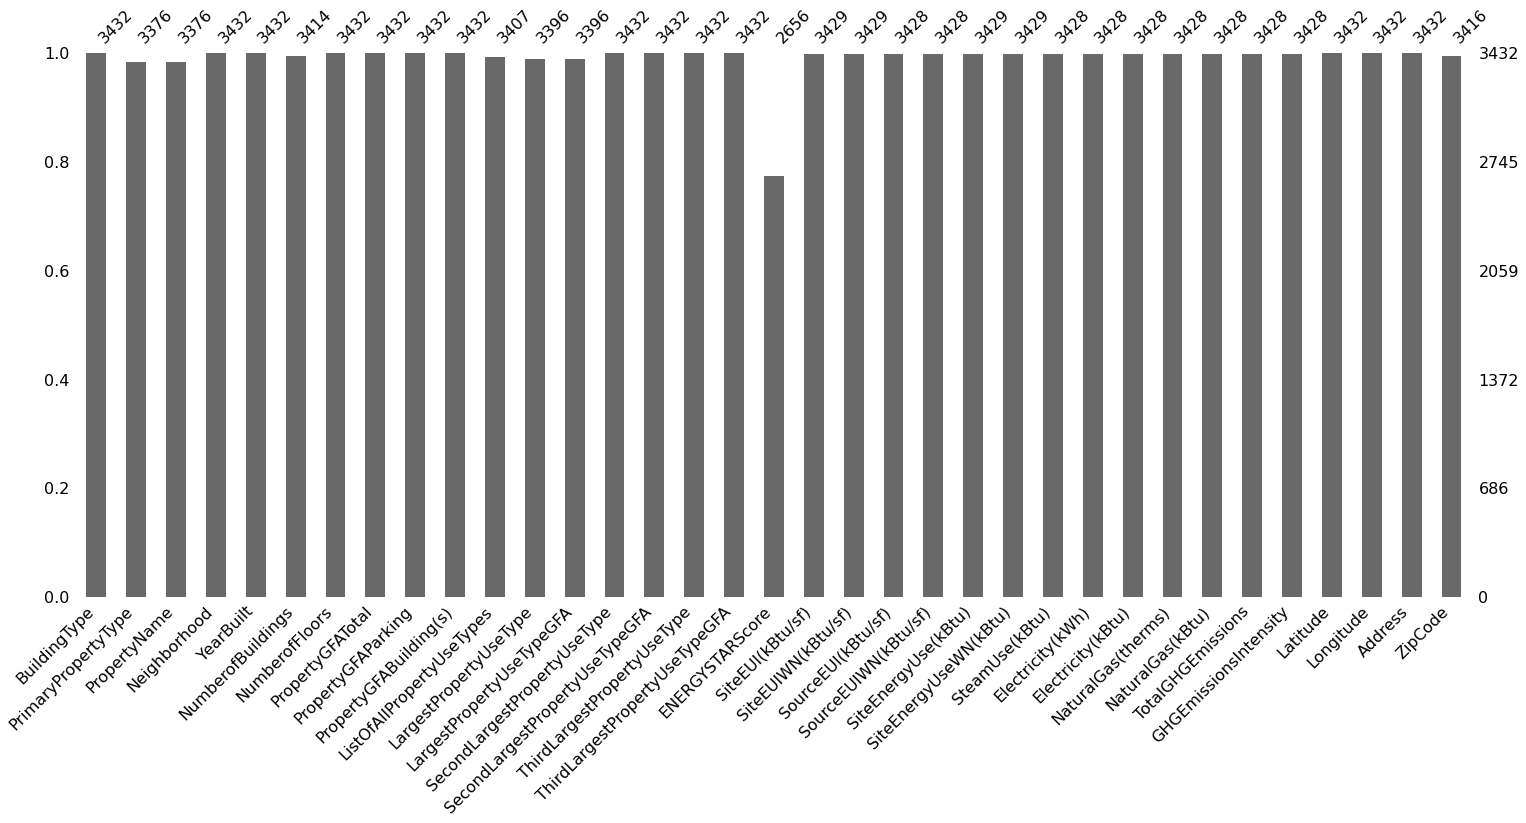

In [453]:
msno.bar(data)

In [454]:
data.shape

(3432, 35)

In [455]:
variables = ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'BuildingType', 'PrimaryPropertyType', 'PropertyName', "Neighborhood"
      ,'ZipCode', 'Latitude', 'Longitude',"Address",
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore']

In [456]:
len(variables)

35

In [457]:
data["GHGEmissionsIntensity"]

OSEBuildingID
1         2.735
2         2.620
3         2.055
5        18.025
8         3.450
          ...  
50222     1.700
50223     2.010
50224    16.990
50225     1.570
50226     2.260
Name: GHGEmissionsIntensity, Length: 3432, dtype: float64

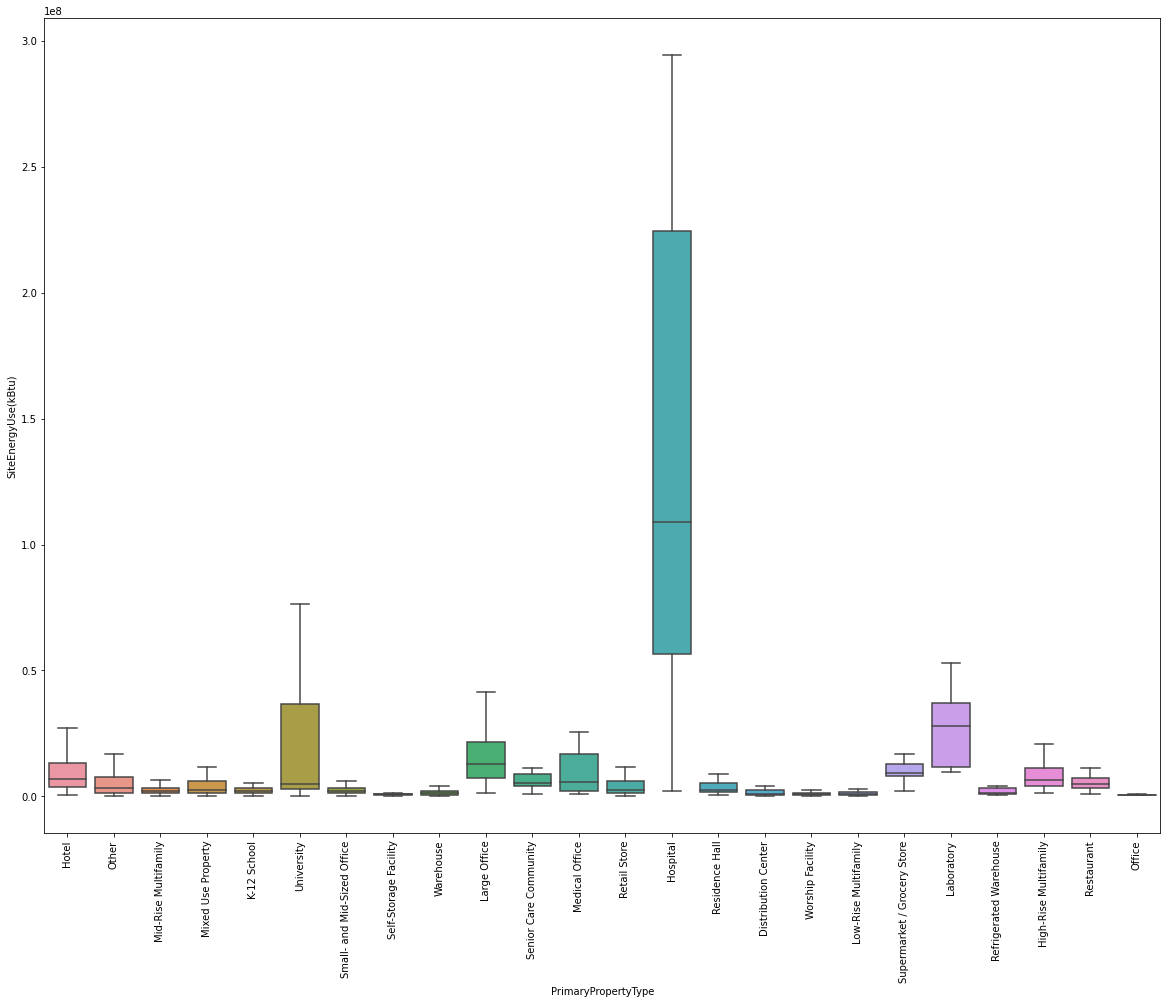

In [458]:
fig = plt.figure(1, figsize=(20,15))
sns.boxplot(data=data, x="PrimaryPropertyType" , y="SiteEnergyUse(kBtu)", showfliers=False)
plt.xticks(rotation=90)
plt.show()

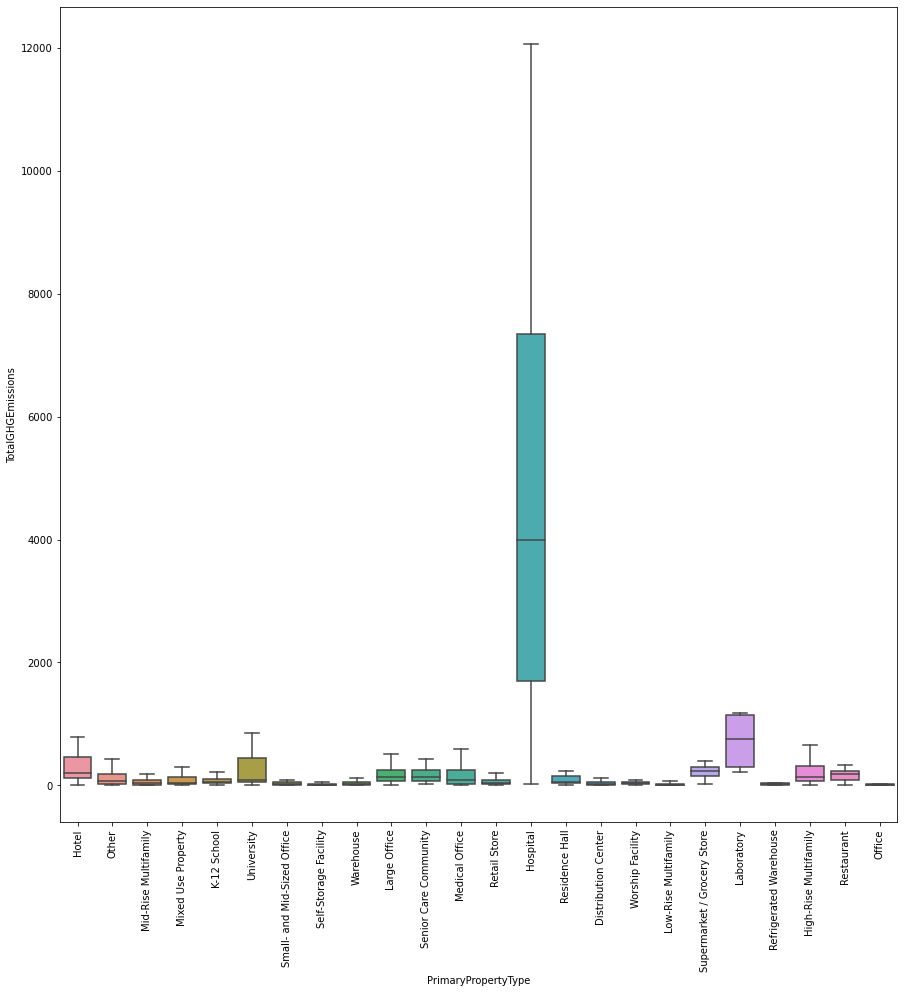

In [459]:
fig = plt.figure(1, figsize=(15,15))
sns.boxplot(data=data, x="PrimaryPropertyType" , y="TotalGHGEmissions",showfliers=False)
plt.xticks(rotation=90)
plt.show()

## Etude des corrélations entre les variables

In [460]:
# calcul des paramètres de corrélations
data.loc[:,variables].corr()

SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
SiteEUI(kBtu/sf)                         1.000000            0.993446   
SiteEUIWN(kBtu/sf)                       0.993446            1.000000   
SourceEUI(kBtu/sf)                       0.948614            0.931687   
SourceEUIWN(kBtu/sf)                     0.946480            0.940348   
SiteEnergyUse(kBtu)                      0.302715            0.272529   
SiteEnergyUseWN(kBtu)                    0.400138            0.393607   
SteamUse(kBtu)                           0.114243            0.100096   
Electricity(kWh)                         0.288677            0.253267   
Electricity(kBtu)                        0.288680            0.253270   
NaturalGas(therms)                       0.259761            0.263391   
NaturalGas(kBtu)                         0.259761            0.263391   
TotalGHGEmissions                        0.292089            0.279929   
GHGEmissionsIntensity                    0.720759            0.740850   
Latitude                                -0.006366           -0.009876   
Longitude                                0.027661            0.027567   
YearBuilt                               -0.015766           -0.030053   
NumberofBuildings                        0.033940            0.008146   
NumberofFloors                           0.008782           -0.003700   
PropertyGFATotal                         0.075198            0.042373   
PropertyGFAParking                       0.106770            0.097416   
PropertyGFABuilding(s)                   0.062193            0.029084   
LargestPropertyUseTypeGFA                0.061940            0.029855   
SecondLargestPropertyUseTypeGFA          0.105045            0.089003   
ThirdLargestPropertyUseTypeGFA           0.091407            0.084957   
ENERGYSTARScore                         -0.352445           -0.361137   

                                 SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
SiteEUI(kBtu/sf)                           0.948614              0.946480   
SiteEUIWN(kBtu/sf)                         0.931687              0.940348   
SourceEUI(kBtu/sf)                         1.000000              0.994888   
SourceEUIWN(kBtu/sf)                       0.994888              1.000000   
SiteEnergyUse(kBtu)                        0.300771              0.272239   
SiteEnergyUseWN(kBtu)                      0.392915              0.389947   
SteamUse(kBtu)                             0.095397              0.081336   
Electricity(kWh)                           0.327815              0.296424   
Electricity(kBtu)                          0.327819              0.296427   
NaturalGas(therms)                         0.179662              0.179891   
NaturalGas(kBtu)                           0.179662              0.179891   
TotalGHGEmissions                          0.235725              0.222113   
GHGEmissionsIntensity                      0.506583              0.515135   
Latitude                                   0.003104              0.002778   
Longitude                                  0.018837              0.017486   
YearBuilt                                  0.047201              0.041704   
NumberofBuildings                          0.032862              0.005335   
NumberofFloors                             0.036094              0.028066   
PropertyGFATotal                           0.088538              0.056964   
PropertyGFAParking                         0.141694              0.135378   
PropertyGFABuilding(s)                     0.070668              0.038393   
LargestPropertyUseTypeGFA                  0.066827              0.034968   
SecondLargestPropertyUseTypeGFA            0.124768              0.114433   
ThirdLargestPropertyUseTypeGFA             0.098560              0.093010   
ENERGYSTARScore                           -0.317652             -0.325912   

                                 SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
SiteEUI(kBtu/sf)                            0.302715

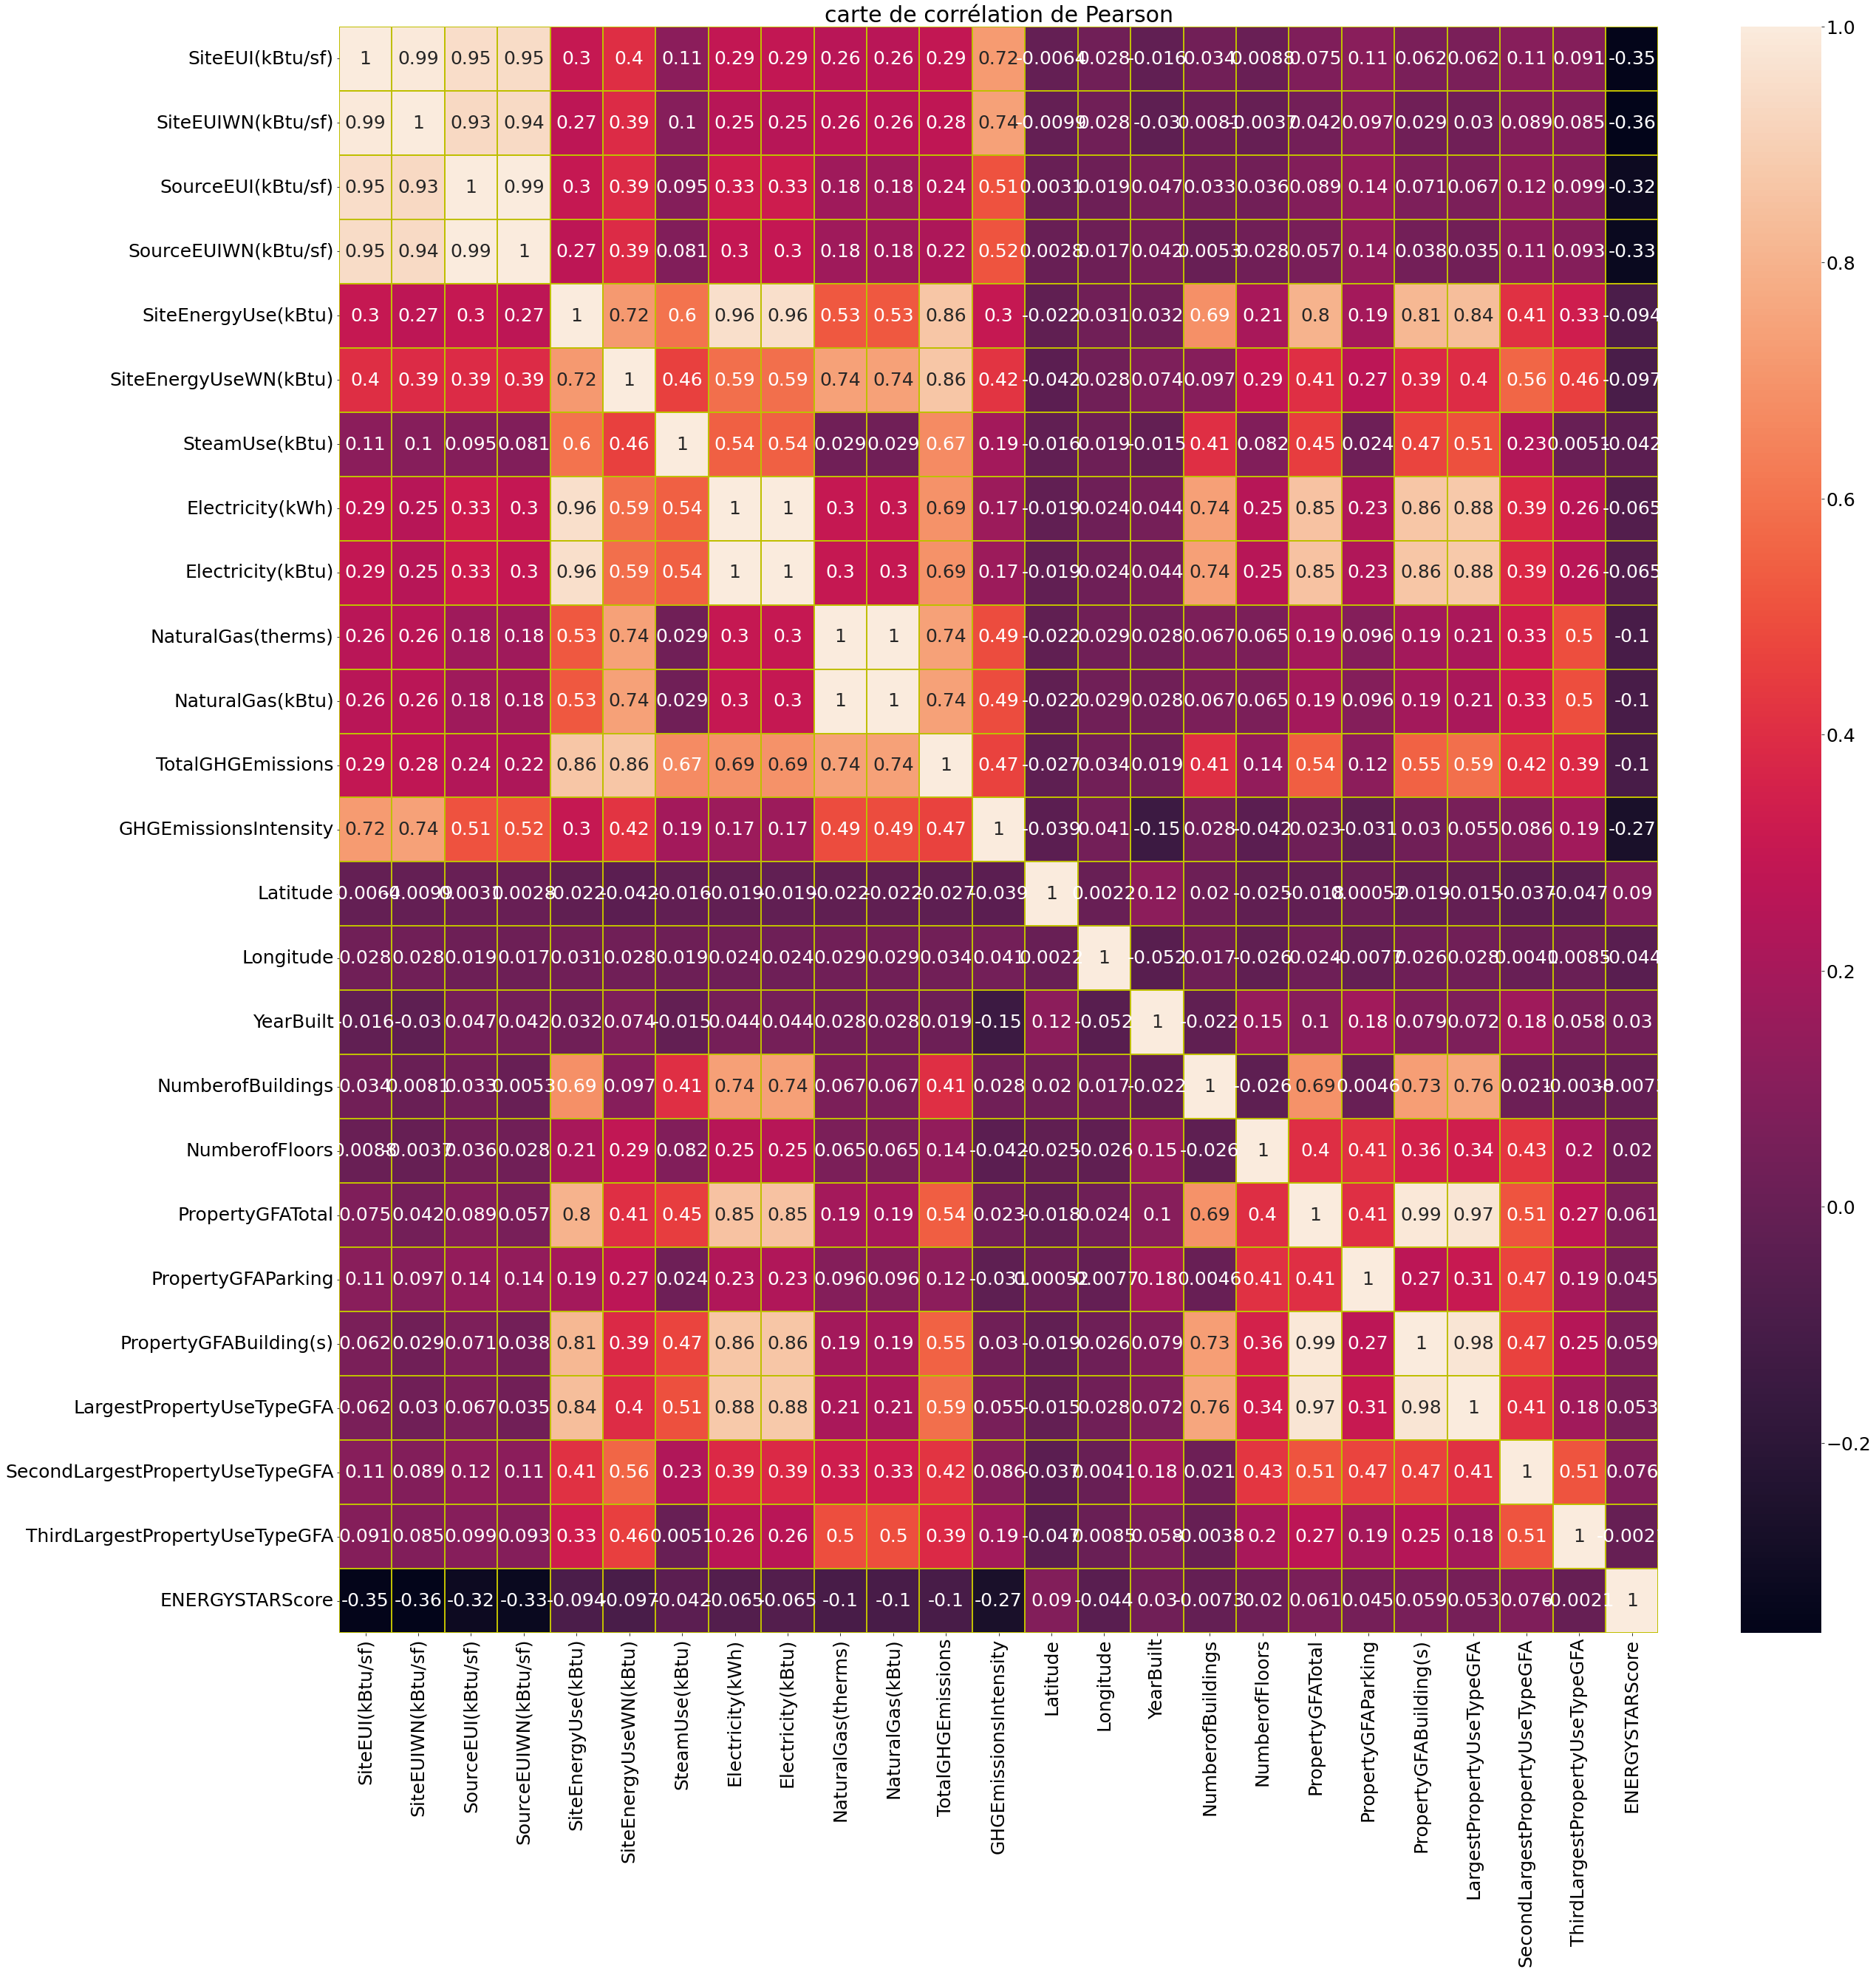

In [462]:
fig = plt.figure(figsize=(40, 40))
sns.heatmap(data.loc[:,variables].corr(), annot=True, linewidths=2, linecolor='y').set_title("carte de corrélation de Pearson")
plt.rcParams.update({'font.size': 25}) 

In [463]:
mask = np.triu(np.ones_like(data.loc[:,variables].corr(), dtype = bool))

<AxesSubplot:>

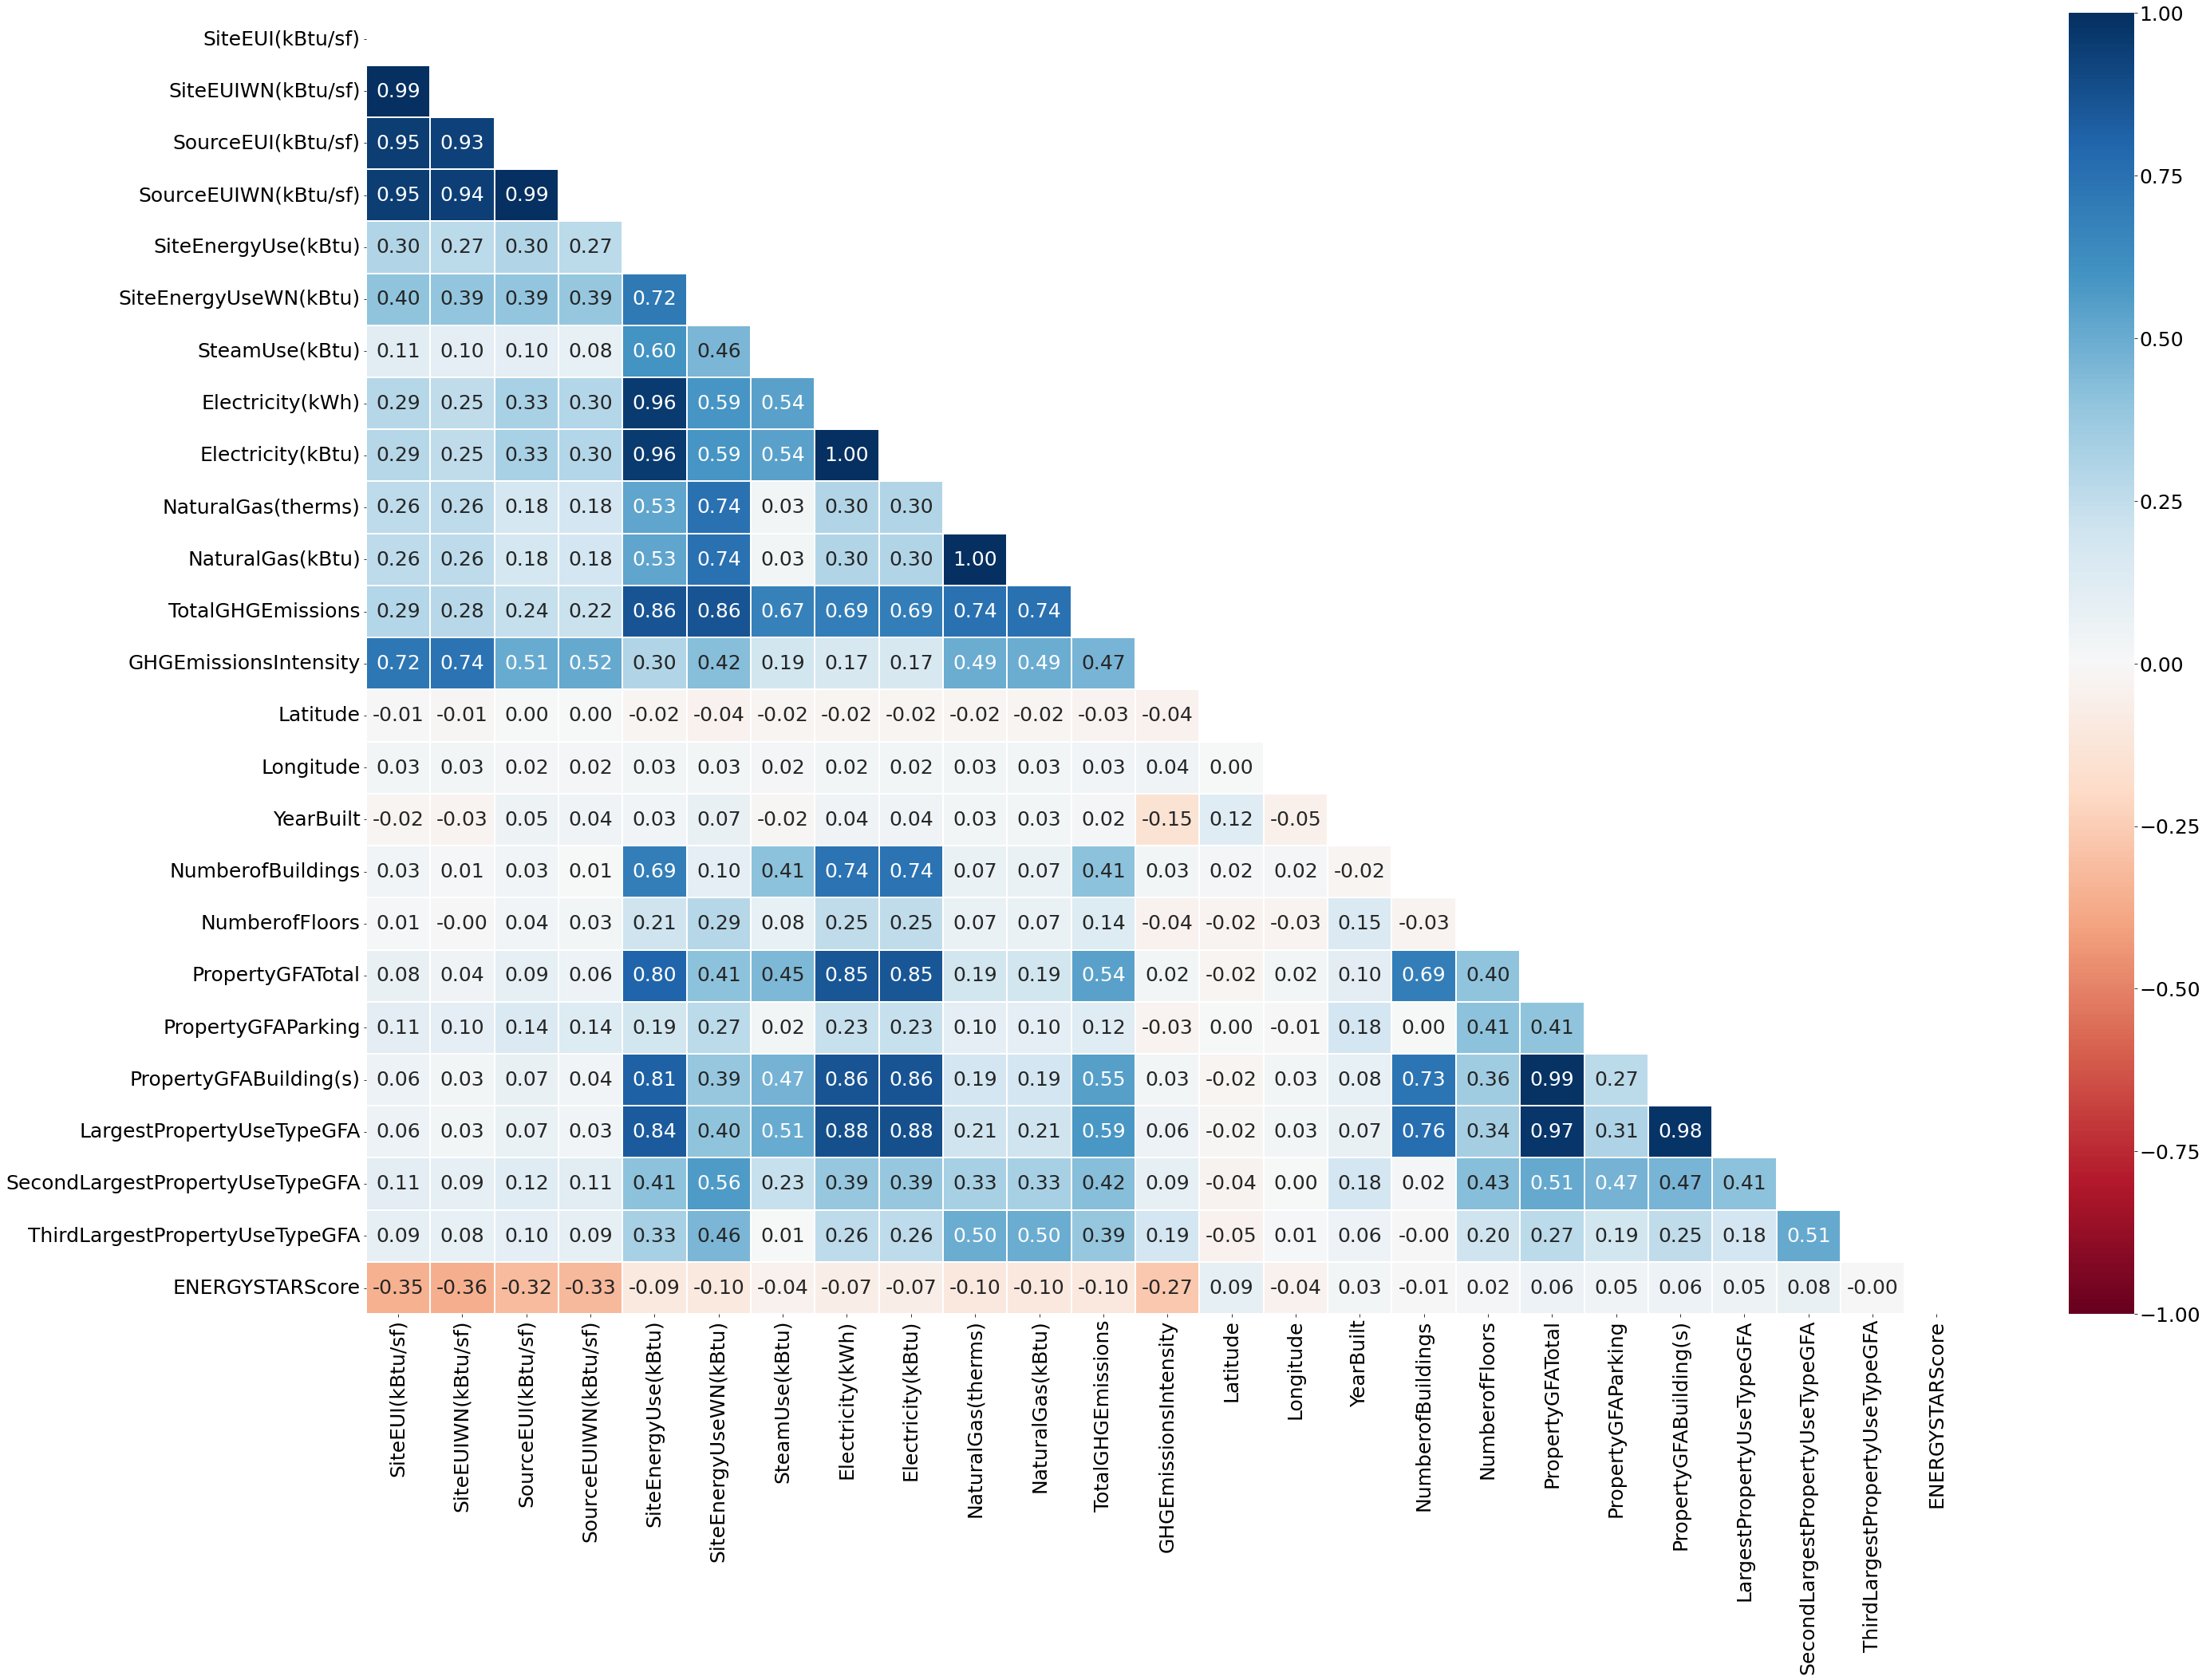

In [465]:
fig = plt.figure(figsize=(45, 30))
sns.heatmap(data.loc[:,variables].corr(), mask=mask, center=0, cmap="RdBu", linewidths=2, annot=True, fmt=".2f", vmin=-1, vmax=1)
# Changer la taille de police par défautlinecolor='y',


## Variables caractéristiques du batiment (surface, type d'exploitation etc  ) en vue de faire des prédictions de consommation d'énergeie et d'émission de CO2

In [466]:
variables_pertinentes = ['Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA','PrimaryPropertyType','LargestPropertyUseType', 'SecondLargestPropertyUseType','ThirdLargestPropertyUseType', "SiteEnergyUse(kBtu)", "TotalGHGEmissions"]

<AxesSubplot:>

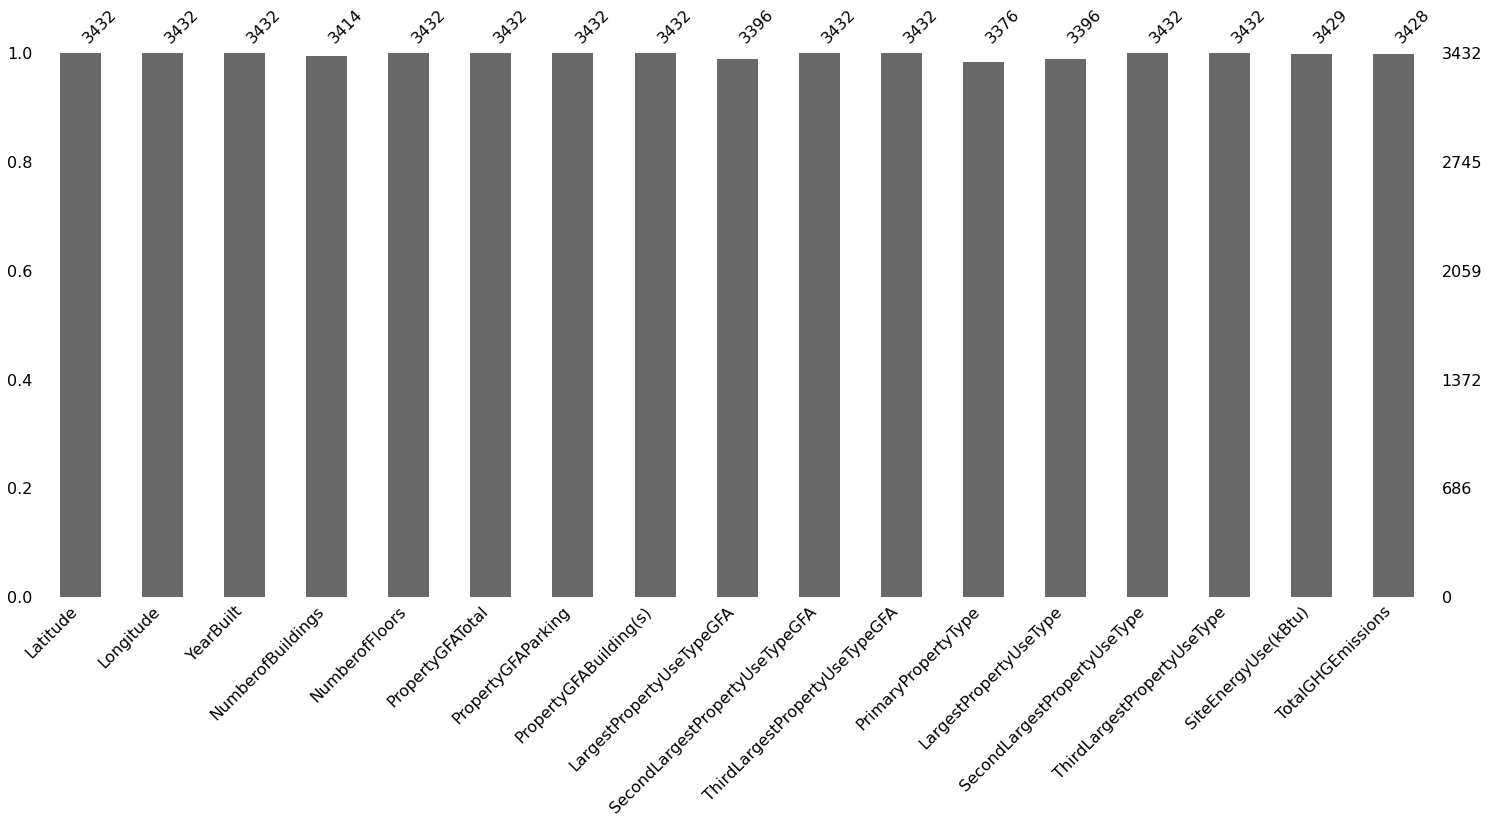

In [467]:
msno.bar(data.loc[:,variables_pertinentes])

In [468]:
databis=data.loc[:,variables_pertinentes].dropna() 
databis

Latitude  Longitude  YearBuilt  NumberofBuildings  \
OSEBuildingID                                                      
1              47.61220 -122.33799     1927.0                1.0   
2              47.61317 -122.33393     1996.0                1.0   
3              47.61393 -122.33810     1969.0                1.0   
5              47.61412 -122.33664     1926.0                1.0   
8              47.61375 -122.34047     1980.0                1.0   
...                 ...        ...        ...                ...   
50222          47.56722 -122.31154     1990.0                1.0   
50223          47.59625 -122.32283     2004.0                1.0   
50224          47.63644 -122.35784     1974.0                1.0   
50225          47.52832 -122.32431     1989.0                1.0   
50226          47.53939 -122.29536     1938.0                1.0   

               NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
OSEBuildingID                                                         
1                        12.0           88434.0                 0.0   
2                        11.0          103566.0             15064.0   
3                        41.0          956110.0            196718.0   
5                        10.0           61320.0                 0.0   
8                        18.0          175580.0             62000.0   
...                       ...               ...                 ...   
50222                     1.0           12294.0                 0.0   
50223                     1.0           16000.0                 0.0   
50224                     1.0           13157.0                 0.0   
50225                     1.0           14101.0                 0.0   
50226                     1.0           18258.0                 0.0   

               PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
OSEBuildingID                                                      
1                             88434.0                    88434.0   
2                             88502.0                    83880.0   
3                            759392.0                   756493.0   
5                             61320.0                    61320.0   
8                            113580.0                   123445.0   
...                               ...                        ...   
50222                         12294.0                    12294.0   
50223                         16000.0                    16000.0   
50224                         13157.0                     7583.0   
50225                         14101.0                     6601.0   
50226                         18258.0                     8271.0   

               SecondLargestPropertyUseTypeGFA  \
OSEBuildingID                                    
1                                          0.0   
2                                      15064.0   
3                                          0.0   
5                                          0.0   
8                                      68009.0   
...                                        ...   
50222                                      0.0   
50223                                      0.0   
50224                                   5574.0   
50225                                   6501.0   
50226                                   8000.0   

               ThirdLargestPropertyUseTypeGFA PrimaryPropertyType  \
OSEBuildingID                                                       
1                                         0.0               Hotel   
2                                      4622.0               Hotel   
3                                         0.0               Hotel   
5                                         0.0               Hotel   
8                                         0.0               Hotel   
...                                       ...                 ...   
50222                                     0.0              Office   
50223                                     0.0    

In [469]:
len(variables_pertinentes)

17

In [470]:
variables_numériques = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', "SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
# Variables qualitatives 
variables_qualitatives = ['PrimaryPropertyType', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']

In [471]:
variables_pertinentes[3:-6]

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA']

In [472]:
# Datataframe sur la taille des bâtiments( surfaces, nombres d'étages, de bâtiments)
data_taille_batiment = databis.loc[:,variables_pertinentes[3:-6]]
data_taille_batiment

NumberofBuildings  NumberofFloors  PropertyGFATotal  \
OSEBuildingID                                                        
1                            1.0            12.0           88434.0   
2                            1.0            11.0          103566.0   
3                            1.0            41.0          956110.0   
5                            1.0            10.0           61320.0   
8                            1.0            18.0          175580.0   
...                          ...             ...               ...   
50222                        1.0             1.0           12294.0   
50223                        1.0             1.0           16000.0   
50224                        1.0             1.0           13157.0   
50225                        1.0             1.0           14101.0   
50226                        1.0             1.0           18258.0   

               PropertyGFAParking  PropertyGFABuilding(s)  \
OSEBuildingID                                               
1                             0.0                 88434.0   
2                         15064.0                 88502.0   
3                        196718.0                759392.0   
5                             0.0                 61320.0   
8                         62000.0                113580.0   
...                           ...                     ...   
50222                         0.0                 12294.0   
50223                         0.0                 16000.0   
50224                         0.0                 13157.0   
50225                         0.0                 14101.0   
50226                         0.0                 18258.0   

               LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
OSEBuildingID                                                               
1                                88434.0                              0.0   
2                                83880.0                          15064.0   
3                               756493.0                              0.0   
5                                61320.0                              0.0   
8                               123445.0                          68009.0   
...                                  ...                              ...   
50222                            12294.0                              0.0   
50223                            16000.0                              0.0   
50224                             7583.0                           5574.0   
50225                             6601.0                           6501.0   
50226                             8271.0                           8000.0   

               ThirdLargestPropertyUseTypeGFA  
OSEBuildingID                                  
1                                         0.0  
2                                      4622.0  
3                                         0.0  
5                                         0.0  
8                                         0.0  
...                                       ...  
50222                                     0.0  
50223                                     0.0  
50224                                     0.0  
50225                                   484.0  
50226                                  1108.0  

[3356 rows x 8 columns]

In [473]:
data_taille_batiment.isnull().sum()

NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseTypeGFA     0
dtype: int64

In [474]:
data_taille_batiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 1 to 50226
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NumberofBuildings                3356 non-null   float64
 1   NumberofFloors                   3356 non-null   float64
 2   PropertyGFATotal                 3356 non-null   float64
 3   PropertyGFAParking               3356 non-null   float64
 4   PropertyGFABuilding(s)           3356 non-null   float64
 5   LargestPropertyUseTypeGFA        3356 non-null   float64
 6   SecondLargestPropertyUseTypeGFA  3356 non-null   float64
 7   ThirdLargestPropertyUseTypeGFA   3356 non-null   float64
dtypes: float64(8)
memory usage: 236.0 KB


### Distribution de PropertyGFATotal

C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<Figure size 2592x3744 with 0 Axes>

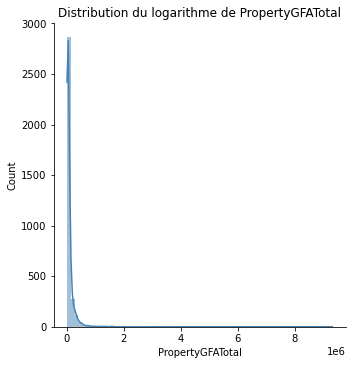

In [476]:
fig = plt.figure(figsize=(36, 52))
h = sns.displot(databis["PropertyGFATotal"], color='steelblue', bins=70, kde=True, edgecolor='none', ax=ax)
plt.title("Distribution du logarithme de PropertyGFATotal")
plt.rcParams.update({'font.size': 10}) 

C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distribution du logarithme de PropertyGFATotal')

<Figure size 2592x3744 with 0 Axes>

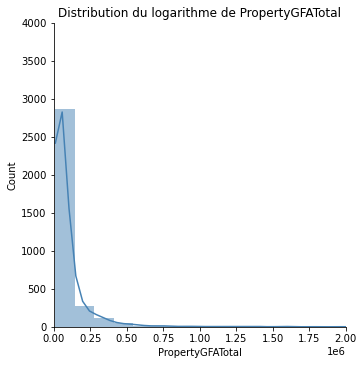

In [477]:
fig = plt.figure(figsize=(36, 52))
h = sns.displot(databis["PropertyGFATotal"], color='steelblue', bins=70, kde=True, edgecolor='none', ax=ax)
plt.axis([0, 2e6, 0, 4000])
plt.title("Distribution du logarithme de PropertyGFATotal")

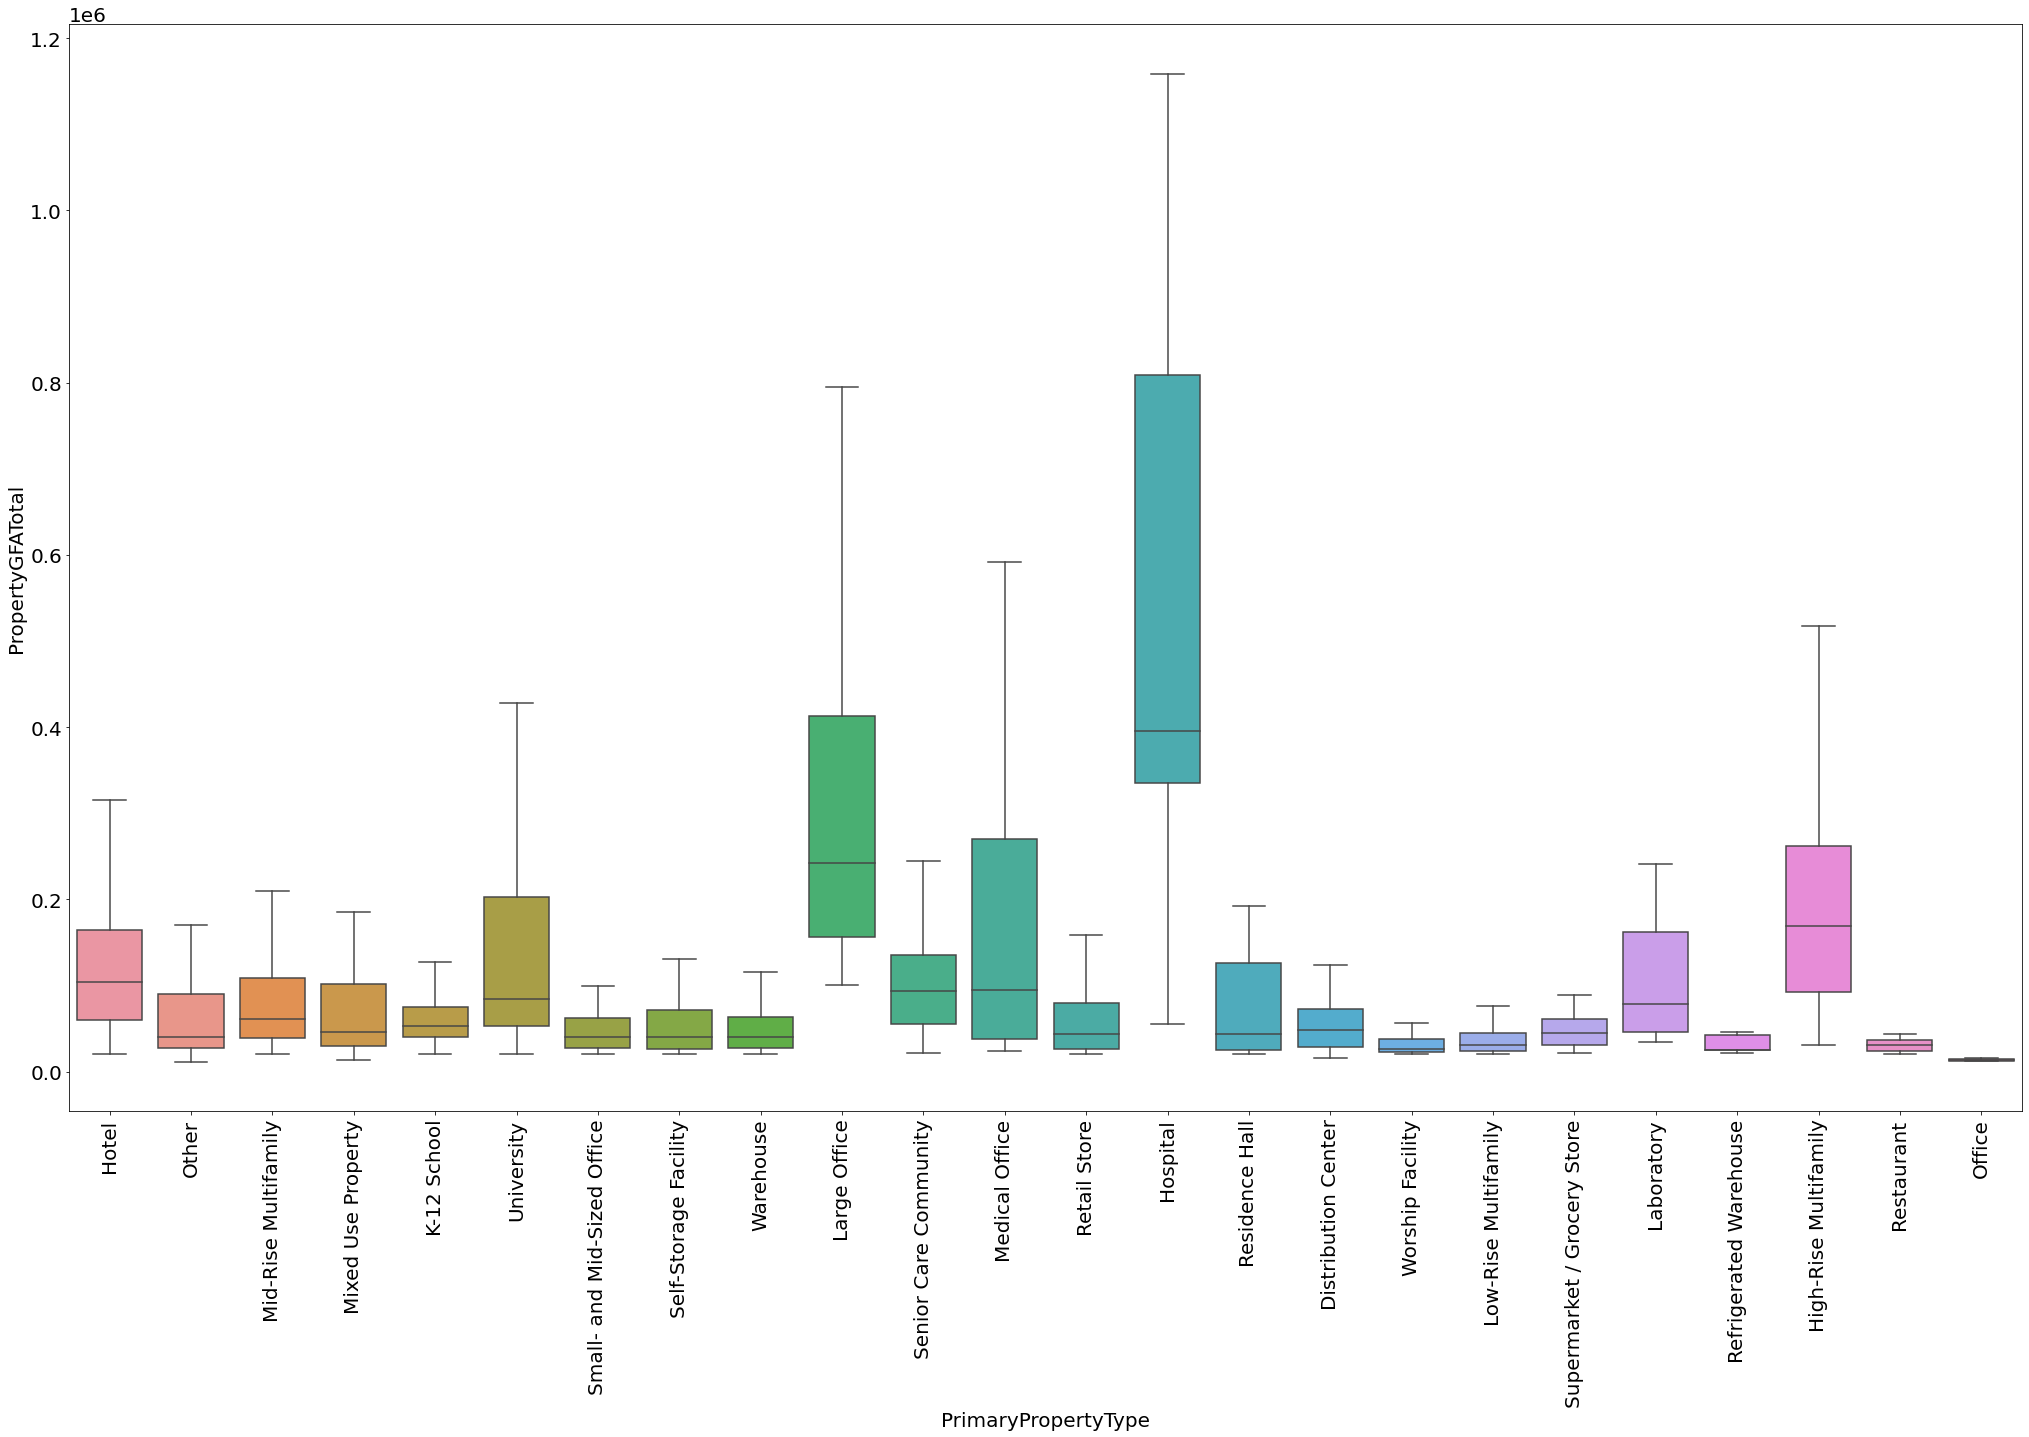

In [479]:
# Distribution de la variables "PropertyGFABuilding(s)"

fig = plt.figure(1, figsize=(35,20))
sns.boxplot(data=databis, x="PrimaryPropertyType" , y="PropertyGFATotal", showfliers=False)
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 20})
plt.show()

## Détermination des variables à prédire y1 et y2 ( les targets)

### La consommation totale d'énergie par les bâtiments y1

In [480]:
y1 = databis["SiteEnergyUse(kBtu)"]
y1

OSEBuildingID
1        7.103895e+06
2        8.371084e+06
3        7.285884e+07
5        1.751195e+07
8        1.450085e+07
             ...     
50222    8.497457e+05
50223    9.502762e+05
50224    5.765898e+06
50225    7.194712e+05
50226    1.152896e+06
Name: SiteEnergyUse(kBtu), Length: 3356, dtype: float64

Text(0.5, 1.0, "Distribution de la consommation d'énergie")

<Figure size 2880x4320 with 0 Axes>

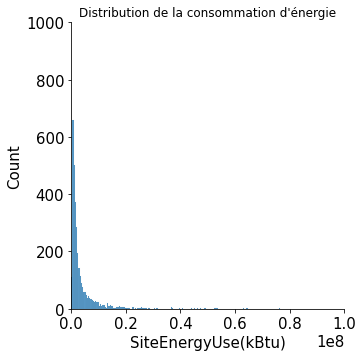

In [484]:
# Ditrsibution de la  variable des consommations des énérgies
fig = plt.figure(figsize=(40, 60))
h = sns.displot(databis["SiteEnergyUse(kBtu)"])
ax.set_title("SiteEnergyUse(kBtu)", fontsize=5)
plt.rcParams.update({'font.size': 10})
plt.axis([0, 1e8, 0, 1000])
plt.title("Distribution de la consommation d'énergie")


Text(0.5, 1.0, "Distribution des consommations d'énergie inférieures à 2e7 kBtu")

<Figure size 2880x2880 with 0 Axes>

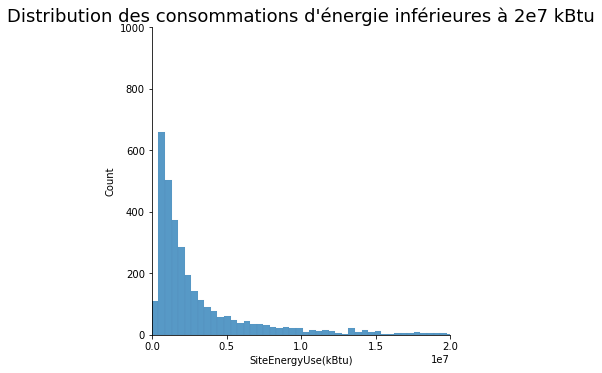

In [485]:
# Ditrsibution de la  variable des consommations des énérgies
fig = plt.figure(figsize=(40, 40))
h = sns.displot(databis["SiteEnergyUse(kBtu)"])
ax.set_title("SiteEnergyUse(kBtu)", fontsize=5)
plt.rcParams.update({'font.size': 15})
plt.axis([0, 0.2e8, 0, 1000])
plt.title("Distribution des consommations d'énergie inférieures à 2e7 kBtu")

In [486]:
databis["SiteEnergyUse(kBtu)"].describe()

count    3.356000e+03
mean     5.399295e+06
std      2.157614e+07
min      0.000000e+00
25%      9.332523e+05
50%      1.807230e+06
75%      4.221283e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

Text(0.5, 1.0, "Distribution de la consommation d'énergie")

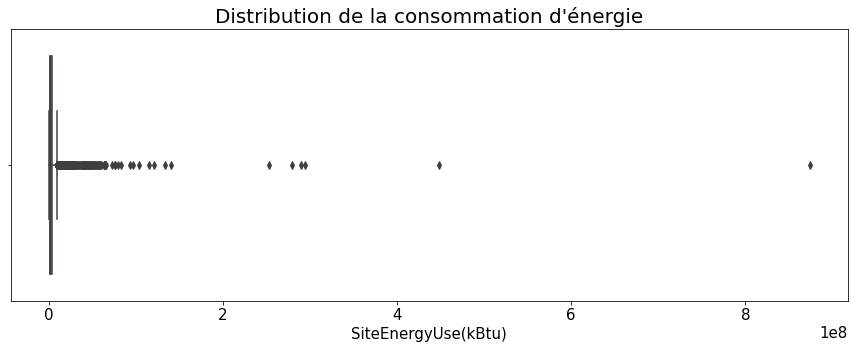

In [487]:
fig = plt.figure(figsize=(15, 5))
h = sns.boxplot(x=databis["SiteEnergyUse(kBtu)"], data=databis)
h.set_title("Distribution de la consommation d'énergie", fontsize=20)

Text(0.5, 1.0, "Distribution des consommations d'énergie inférieures à 2e7 kBtu")

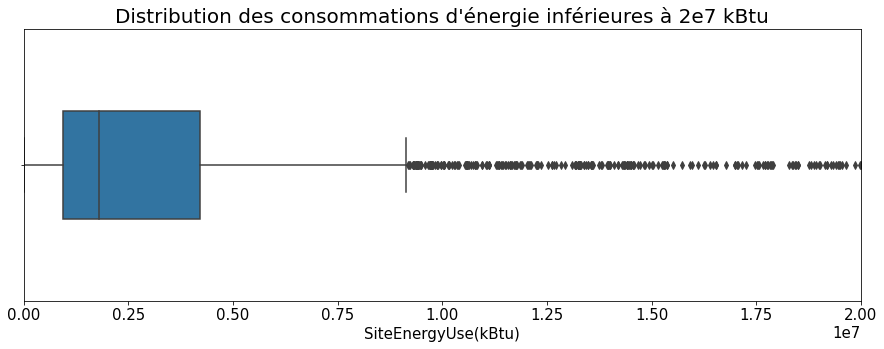

In [488]:
fig = plt.figure(figsize=(15, 5))
h = sns.boxplot(x=databis["SiteEnergyUse(kBtu)"], data=databis)
plt.axis([ 0, 0.2e8, -1, 1])
h.set_title("Distribution des consommations d'énergie inférieures à 2e7 kBtu", fontsize=20)

####   Du fait de la grande étendue des valeurs de consommations d'énergie et des émissions de CO2, nous allons travailler en échelle logarithmique qui espace les valeurs faibles et rapproche les très grandes valeurs.  Sur une petite échelle, on va donc pouvoir voir  une large gamme de valeurs à condition qu'elles soient non nulles et de même signes. On pourra aprés prédiction de ces variables revenir à leurs valeurs réelles en applicant la fonction inverse qui est l'exponentielle.

In [489]:
y1_log = np.log(1+databis["SiteEnergyUse(kBtu)"])
y1_log

OSEBuildingID
1        15.776154
2        15.940294
3        18.104034
5        16.678394
8        16.489718
           ...    
50222    13.652694
50223    13.764509
50224    15.567472
50225    13.486273
50226    13.957789
Name: SiteEnergyUse(kBtu), Length: 3356, dtype: float64

C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, "Distribution du logarithme de la consommation d'énergie")

<Figure size 2592x3744 with 0 Axes>

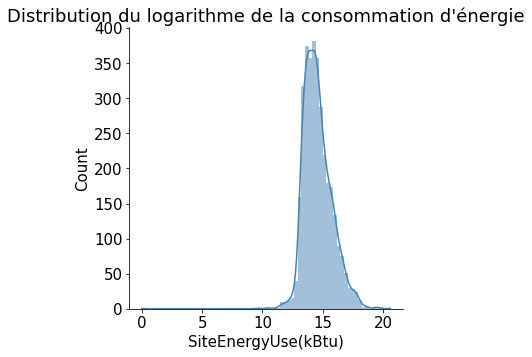

In [490]:
fig = plt.figure(figsize=(36, 52))
h = sns.displot(y1_log, color='steelblue', bins=70, kde=True, edgecolor='none', ax=ax)
plt.title("Distribution du logarithme de la consommation d'énergie")

### Les émissions de CO2 des bâtiments y2

In [491]:
y2 = databis["TotalGHGEmissions"]
y2

OSEBuildingID
1         249.705
2         279.685
3        2075.380
5        1111.385
8         506.355
           ...   
50222      20.940
50223      32.170
50224     223.540
50225      22.110
50226      41.270
Name: TotalGHGEmissions, Length: 3356, dtype: float64

(0.0, 5000.0, 0.0, 500.0)

<Figure size 2880x4320 with 0 Axes>

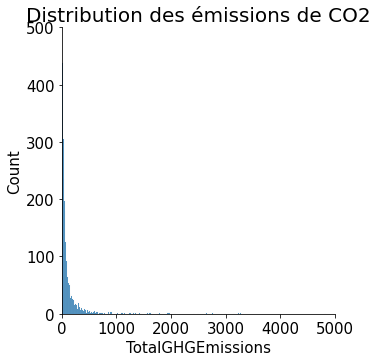

In [492]:
# Ditrsibution de la  variable des consommations des énérgies
fig = plt.figure(figsize=(40, 60))
h = sns.displot(databis["TotalGHGEmissions"])
plt.title("Distribution des émissions de CO2", fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.axis([0, 5000, 0, 500])

(0.0, 1000.0, 0.0, 500.0)

<Figure size 2880x4320 with 0 Axes>

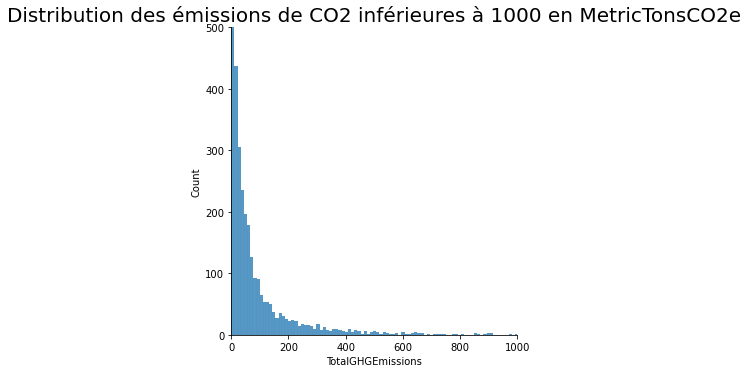

In [493]:
fig = plt.figure(figsize=(40, 60))
h = sns.displot(databis["TotalGHGEmissions"])
plt.title("Distribution des émissions de CO2 inférieures à 1000 en MetricTonsCO2e", fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.axis([0, 1000, 0, 500])

In [494]:
databis["TotalGHGEmissions"].describe()

count     3356.000000
mean       118.850724
std        532.747736
min          0.090000
25%          9.702500
50%         34.135000
75%         92.237500
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

Text(0.5, 1.0, "Distribution de la consommation d'énergie")

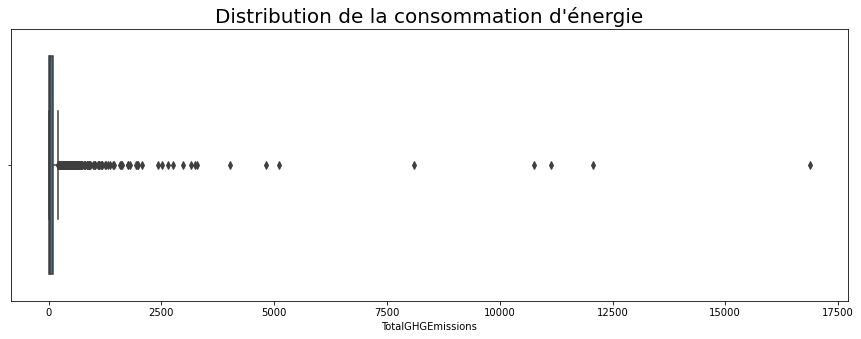

In [495]:
fig = plt.figure(figsize=(15, 5))
h = sns.boxplot(x=databis["TotalGHGEmissions"], data=databis)
h.set_title("Distribution de la consommation d'énergie", fontsize=20)

(0.0, 500.0, -1.0, 1.0)

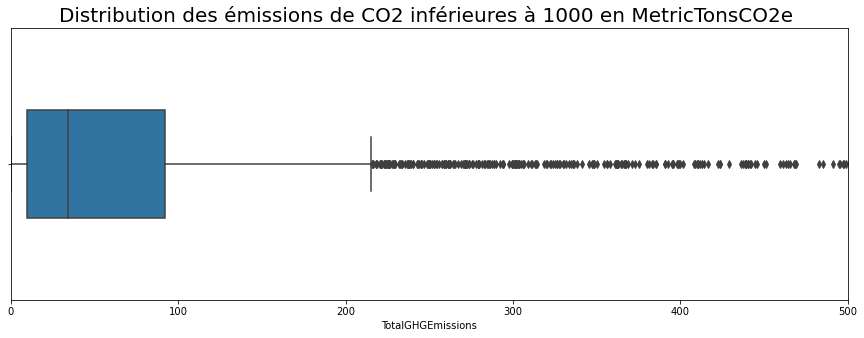

In [496]:
fig = plt.figure(figsize=(15, 5))
h = sns.boxplot(x=databis["TotalGHGEmissions"], data=databis)
h.set_title("Distribution des émissions de CO2 inférieures à 1000 en MetricTonsCO2e ", fontsize=20)
plt.axis([0, 500, -1, 1])

In [497]:
y2_log = np.log(1+databis["TotalGHGEmissions"])
y2_log

OSEBuildingID
1        5.524277
2        5.637233
3        7.638381
5        7.014262
8        6.229211
           ...   
50222    3.088311
50223    3.501646
50224    5.414054
50225    3.140265
50226    3.744078
Name: TotalGHGEmissions, Length: 3356, dtype: float64

C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distribution du logarithme des émissions de CO2')

<Figure size 2592x3744 with 0 Axes>

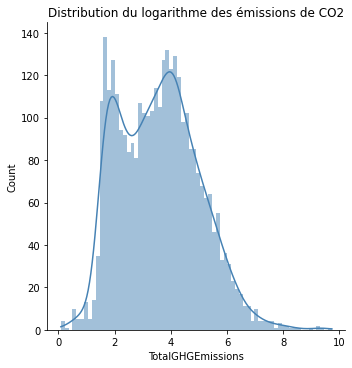

In [498]:
fig = plt.figure(figsize=(36, 52))
h = sns.displot(y2_log, color='steelblue', bins=70, kde=True, edgecolor='none', ax=ax)
plt.title("Distribution du logarithme des émissions de CO2")

C:\Users\Brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<Figure size 2880x4320 with 0 Axes>

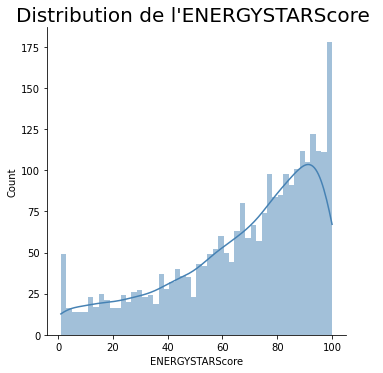

In [499]:
fig = plt.figure(figsize=(40, 60))
h = sns.displot(data["ENERGYSTARScore"],color='steelblue', bins=50, kde=True, edgecolor='none', ax=ax)
plt.title("Distribution de l'ENERGYSTARScore ", fontsize=20)
plt.rcParams.update({'font.size': 10})
